<a href="https://colab.research.google.com/github/RubenCarty/Big-Data-Analytics/blob/main/Big_Data_Analytic_Monitores_Ciudadanos_Control_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Big Data Analitics
# **Análisis de los Resultados de las intervenciones realizadas por los Monitores Ciudadanos de Control en el año 2022 con Python**

# [MSc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

# 1. Importación de las librerías:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 2. Carga del dataset:

# 1º metodo

In [68]:
df = pd.read_csv('/content/DATOS ABIERTOS - RESULTADOS DE INTERVENCIONES 2022.csv',  encoding='latin1')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/DATOS ABIERTOS - RESULTADOS DE INTERVENCIONES 2022.csv'

# 2º metodo Descargar y leer datos desde el drive

In [4]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# ruta del archivo
path = '/content/drive/MyDrive/Big Data Analytics/Trabajo Individual/DATOS ABIERTOS - RESULTADOS DE INTERVENCIONES 2022.csv'

In [6]:
# leer la data
df= pd.read_csv(path,  encoding='latin1')
df

CÓDIGO ORDEN DE SERVICIO  \
0            02-L531-2022-001   
1            02-L531-2022-002   
2            02-L531-2022-003   
3            02-L531-2022-004   
4            02-L531-2022-010   
...                       ...   
6193         02-L531-2022-995   
6194         02-L531-2022-996   
6195         02-L531-2022-997   
6196         02-L531-2022-998   
6197         02-L531-2022-999   

                              DENOMINACIÓN DEL SERVICIO TIPO DE INTERVENCIÓN  \
0     IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...      APRENDO EN CASA   
1     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...            QALIWARMA   
2     ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...            QALIWARMA   
3     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...            QALIWARMA   
4     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...              CODISEC   
...                                                 ...                  ...   
6193  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6194  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6195  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6196  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6197  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   

      CÓDIGO ENTIDAD                                  ENTIDAD  \
0                190                  MINISTERIO DE EDUCACION   
1               1889      MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2                398         MUNICIPALIDAD PROVINCIAL DE AMBO   
3               2508      MUNICIPALIDAD DISTRITAL DE USICAYOS   
4               2167    MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   
...              ...                                      ...   
6193            1847       MUNICIPALIDAD DISTRITAL DE CHUQUIS   
6194             399  MUNICIPALIDAD PROVINCIAL DE DOS DE MAYO   
6195            1853        MUNICIPALIDAD DISTRITAL DE MARIAS   
6196            1842      MUNICIPALIDAD DISTRITAL DE QUIVILLA   
6197            1850         MUNICIPALIDAD DISTRITAL DE RIPAN   

                  REGIÓN    PROVINCIA    DISTRITO  \
0     LIMA METROPOLITANA         LIMA   SAN BORJA   
1                    ICA          ICA    SANTIAGO   
2                HUANUCO         AMBO        AMBO   
3                   PUNO     CARABAYA    USICAYOS   
4     LIMA METROPOLITANA         LIMA  SAN MIGUEL   
...                  ...          ...         ...   
6193             HUANUCO  DOS DE MAYO     CHUQUIS   
6194             HUANUCO  DOS DE MAYO    LA UNION   
6195             HUANUCO  DOS DE MAYO      MARIAS   
6196             HUANUCO  DOS DE MAYO    QUIVILLA   
6197             HUANUCO  DOS DE MAYO       RIPAN   

     ¿TIENE SITUACIONES DE INCUMPLIMIENTO? NÚMERO DE INFORME DE CONTROL  
0                                       SI           002-2022-CG/PC-SOO  
1                                       SI           017-2022-CG/PC-SOO  
2                                       Si           020-2022-CG/PC-SOO  
3                                       Si           033-2022-CG/PC-SOO  
4                                       Si           161-2022-CG/PC-SOO  
...                                    ...                          ...  
6193                                    Si          2688-2022-CG/PC-SOO  
6194                                    Si          2689-2022-CG/PC-SOO  
6195                                    Si          2690-2022-CG/PC-SOO  
6196                                    Si          2691-2022-CG/PC-SOO  
6197                                    Si          2692-2022-CG/PC-SOO  

[6198 rows x 10 columns]

# Descripción de las Columnas del Dataset:
1. CÓDIGO ORDEN DE SERVICIO: Un código único que identifica cada orden de servicio dentro del dataset.

2. DENOMINACIÓN DEL SERVICIO: Descripción del servicio o intervención realizada por los Monitores Ciudadanos.

3. TIPO DE INTERVENCIÓN: Categoriza la intervención en una tipología específica (por ejemplo, "supervisión", "verificación", "seguimiento").

4. CÓDIGO ENTIDAD: Código que identifica la entidad pública a la que se dirige la intervención.

5. ENTIDAD: Nombre de la entidad pública a la que se dirige la intervención.

6. REGIÓN: Región donde se realiza la intervención.

7. PROVINCIA: Provincia donde se realiza la intervención.

8. DISTRITO: Distrito donde se realiza la intervención.

9. ¿TIENE SITUACIONES DE INCUMPLIMIENTO?: Indica si la intervención encontró situaciones de incumplimiento a la normativa. Se presenta como un valor binario ("Sí" o "No").

10. NÚMERO DE INFORME DE CONTROL: Número único que identifica el informe de control generado a partir de la intervención.

Ejemplo de Interpretación:

Fila: 002-L531-2022-001

Descripción:

Se realizó una intervención para verificar la implementación de la estrategia "APRENDO EN CASA".
La intervención se realizó en el distrito de San Borja, Lima Metropolitana.
Se encontró una situación de incumplimiento.
El número del informe de control generado es 002-L531-2022-001.

Análisis:

La columna ¿TIENE SITUACIONES DE INCUMPLIMIENTO? puede ser utilizada para identificar las intervenciones que requieren mayor atención o seguimiento.
Las columnas REGIÓN, PROVINCIA y DISTRITO permiten realizar análisis geográfico de las intervenciones.
La columna DENOMINACIÓN DEL SERVICIO puede ser utilizada para analizar los tipos de intervenciones que se realizan con mayor frecuencia.
El NÚMERO DE INFORME DE CONTROL permite acceder al informe completo con los detalles de la intervención.

Recomendaciones:

Es importante tener en cuenta el contexto y la normativa específica para interpretar correctamente los datos del dataset.
Se pueden utilizar herramientas de análisis de datos para realizar análisis más profundos y obtener información más valiosa del dataset.
Espero que esta descripción te sea útil para comprender mejor el dataset!

Aquí hay algunos recursos adicionales que te pueden ser útiles:


Documentación de Pandas: https://pandas.pydata.org/docs/


# Análisis de Variables y Modelos Predictivos con Python:

Variable Dependiente:

¿TIENE SITUACIONES DE INCUMPLIMIENTO?: Indica si la intervención encontró situaciones de incumplimiento a la normativa. Se presenta como un valor binario ("Sí" o "No").

Variables Independientes:

* DENOMINACIÓN DEL SERVICIO: Descripción del servicio o intervención realizada por los Monitores Ciudadanos.
* TIPO DE INTERVENCIÓN: Categoriza la intervención en una tipología específica (por ejemplo, "supervisión", "verificación", "seguimiento").
* REGIÓN: Región donde se realiza la intervención.
* PROVINCIA: Provincia donde se realiza la intervención.
* DISTRITO: Distrito donde se realiza la intervención.

# 3. Limpieza de datos:

In [7]:
# para revisar el tamaño de la matriz es una tupla de 2 valores

df.shape

(6198, 10)


El código df.shape devuelve una tupla que contiene dos valores:
El primer valor es el número de filas en el DataFrame.
El segundo valor es el número de columnas en el DataFrame.

In [8]:
df.size

61980


El código df.size devuelve el número total de elementos en un DataFrame. Este valor se calcula multiplicando el número de filas por el número de columnas.

In [9]:
df.head()

CÓDIGO ORDEN DE SERVICIO                          DENOMINACIÓN DEL SERVICIO  \
0         02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1         02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2         02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3         02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4         02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

  TIPO DE INTERVENCIÓN  CÓDIGO ENTIDAD                                ENTIDAD  \
0      APRENDO EN CASA             190                MINISTERIO DE EDUCACION   
1            QALIWARMA            1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2            QALIWARMA             398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3            QALIWARMA            2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4              CODISEC            2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

               REGIÓN PROVINCIA    DISTRITO  \
0  LIMA METROPOLITANA      LIMA   SAN BORJA   
1                 ICA       ICA    SANTIAGO   
2             HUANUCO      AMBO        AMBO   
3                PUNO  CARABAYA    USICAYOS   
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL   

  ¿TIENE SITUACIONES DE INCUMPLIMIENTO? NÚMERO DE INFORME DE CONTROL  
0                                    SI           002-2022-CG/PC-SOO  
1                                    SI           017-2022-CG/PC-SOO  
2                                    Si           020-2022-CG/PC-SOO  
3                                    Si           033-2022-CG/PC-SOO  
4                                    Si           161-2022-CG/PC-SOO

In [10]:
df.tail()

CÓDIGO ORDEN DE SERVICIO  \
6193         02-L531-2022-995   
6194         02-L531-2022-996   
6195         02-L531-2022-997   
6196         02-L531-2022-998   
6197         02-L531-2022-999   

                              DENOMINACIÓN DEL SERVICIO TIPO DE INTERVENCIÓN  \
6193  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6194  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6195  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6196  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6197  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   

      CÓDIGO ENTIDAD                                  ENTIDAD   REGIÓN  \
6193            1847       MUNICIPALIDAD DISTRITAL DE CHUQUIS  HUANUCO   
6194             399  MUNICIPALIDAD PROVINCIAL DE DOS DE MAYO  HUANUCO   
6195            1853        MUNICIPALIDAD DISTRITAL DE MARIAS  HUANUCO   
6196            1842      MUNICIPALIDAD DISTRITAL DE QUIVILLA  HUANUCO   
6197            1850         MUNICIPALIDAD DISTRITAL DE RIPAN  HUANUCO   

        PROVINCIA  DISTRITO ¿TIENE SITUACIONES DE INCUMPLIMIENTO?  \
6193  DOS DE MAYO   CHUQUIS                                    Si   
6194  DOS DE MAYO  LA UNION                                    Si   
6195  DOS DE MAYO    MARIAS                                    Si   
6196  DOS DE MAYO  QUIVILLA                                    Si   
6197  DOS DE MAYO     RIPAN                                    Si   

     NÚMERO DE INFORME DE CONTROL  
6193          2688-2022-CG/PC-SOO  
6194          2689-2022-CG/PC-SOO  
6195          2690-2022-CG/PC-SOO  
6196          2691-2022-CG/PC-SOO  
6197          2692-2022-CG/PC-SOO

# 4. Exploración de datos


# Identificar el nombre de las columnas

In [16]:
columnas = df.columns
columnas


Index(['CODIGO', 'SERVICIO', 'INTERVENCION', 'COD_ENTIDAD', 'ENTIDAD',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'INCUMPLIMIENTO',
       'NUM_INFORME'],
      dtype='object')

Como los nombres de las variables tienen espacios, tildes, signos de interrogación no es una buena practica por lo cual se debe cambiar las columnas

In [14]:
import pandas as pd

df.rename(columns= {'CÓDIGO ORDEN DE SERVICIO': 'CODIGO',
                  'DENOMINACIÓN DEL SERVICIO': 'SERVICIO',
                   'TIPO DE INTERVENCIÓN': 'INTERVENCION',
                    'CÓDIGO ENTIDAD': 'COD_ENTIDAD',
                    'REGIÓN': 'DEPARTAMENTO',
                    '¿TIENE SITUACIONES DE INCUMPLIMIENTO?': 'INCUMPLIMIENTO',
                    'NÚMERO DE INFORME DE CONTROL': 'NUM_INFORME'}, inplace=True)


In [15]:
df.head()

CODIGO                                           SERVICIO  \
0  02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1  02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2  02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3  02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4  02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

      INTERVENCION  COD_ENTIDAD                                ENTIDAD  \
0  APRENDO EN CASA          190                MINISTERIO DE EDUCACION   
1        QALIWARMA         1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2        QALIWARMA          398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3        QALIWARMA         2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4          CODISEC         2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

         DEPARTAMENTO PROVINCIA    DISTRITO INCUMPLIMIENTO         NUM_INFORME  
0  LIMA METROPOLITANA      LIMA   SAN BORJA             SI  002-2022-CG/PC-SOO  
1                 ICA       ICA    SANTIAGO             SI  017-2022-CG/PC-SOO  
2             HUANUCO      AMBO        AMBO             Si  020-2022-CG/PC-SOO  
3                PUNO  CARABAYA    USICAYOS             Si  033-2022-CG/PC-SOO  
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL             Si  161-2022-CG/PC-SOO

In [17]:
df.columns

Index(['CODIGO', 'SERVICIO', 'INTERVENCION', 'COD_ENTIDAD', 'ENTIDAD',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'INCUMPLIMIENTO',
       'NUM_INFORME'],
      dtype='object')

# analizando la frecuencia de cada variable

In [18]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame

# Iterar sobre todas las columnas del DataFrame
for columna in df.columns:
    # Calcular la frecuencia de los valores en la columna
    frecuencia = df[columna].value_counts()
    # Imprimir los resultados
    print(f"Frecuencia de valores para la columna '{columna}':\n{frecuencia}\n")


Frecuencia de valores para la columna 'CODIGO':
02-L531-2022-001     1
02-L531-2022-4715    1
02-L531-2022-4691    1
02-L531-2022-4690    1
02-L531-2022-469     1
                    ..
02-L531-2022-2805    1
02-L531-2022-2804    1
02-L531-2022-2803    1
02-L531-2022-2802    1
02-L531-2022-999     1
Name: CODIGO, Length: 6198, dtype: int64

Frecuencia de valores para la columna 'SERVICIO':
REGISTRO DEL FORMATO 12-B: SEGUIMIENTO A LA EJECUCIÓN DE INVERSIONES                                                                                                                                             10
EJECUCIÓN DE LA OBRA: "CREACIÓN DE LOS SERVICIOS DEL CENTRO INTEGRAL DE ATENCIÓN AL ADULTO MAYOR SECTOR SAN GABRIEL ALTO EN EL DISTRITO DE VILLA MARÍA DEL TRIUNFO, PROVINCIA DE LIMA - LIMA"                     2
ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA INSTALACIÓN DE SERVICIOS EDUCATIVOS EN 05 INSTITUCIONES EDUCATIVAS DEL NIVEL INICIAL EN EL ÁMBITO DE LOS DISTRITOS DE CHALCOS Y CHILCAYOCC 

# IMPUTACION DE DATOS

In [19]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame

# Reemplazar los valores 'SI' y 'Si' por 'SI' y 'NO' por 'NO'
df['INCUMPLIMIENTO'] = df['INCUMPLIMIENTO'].replace({'SI': 'SI', 'Si': 'SI', 'NO': 'NO'})

# Verificar la corrección
print("Frecuencia de valores actualizada para la columna 'INCUMPLIMIENTO':")
print(df['INCUMPLIMIENTO'].value_counts())


Frecuencia de valores actualizada para la columna 'INCUMPLIMIENTO':
SI    6196
NO       2
Name: INCUMPLIMIENTO, dtype: int64


In [20]:
df.isnull().sum()

CODIGO            0
SERVICIO          0
INTERVENCION      0
COD_ENTIDAD       0
ENTIDAD           0
DEPARTAMENTO      0
PROVINCIA         0
DISTRITO          0
INCUMPLIMIENTO    0
NUM_INFORME       0
dtype: int64

# Realizamos EDA Analisis de datos Exploratorios

In [21]:
df

CODIGO                                           SERVICIO  \
0     02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1     02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2     02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3     02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4     02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   
...                ...                                                ...   
6193  02-L531-2022-995  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
6194  02-L531-2022-996  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
6195  02-L531-2022-997  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
6196  02-L531-2022-998  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
6197  02-L531-2022-999  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   

         INTERVENCION  COD_ENTIDAD                                  ENTIDAD  \
0     APRENDO EN CASA          190                  MINISTERIO DE EDUCACION   
1           QALIWARMA         1889      MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2           QALIWARMA          398         MUNICIPALIDAD PROVINCIAL DE AMBO   
3           QALIWARMA         2508      MUNICIPALIDAD DISTRITAL DE USICAYOS   
4             CODISEC         2167    MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   
...               ...          ...                                      ...   
6193   MESA DE PARTES         1847       MUNICIPALIDAD DISTRITAL DE CHUQUIS   
6194   MESA DE PARTES          399  MUNICIPALIDAD PROVINCIAL DE DOS DE MAYO   
6195   MESA DE PARTES         1853        MUNICIPALIDAD DISTRITAL DE MARIAS   
6196   MESA DE PARTES         1842      MUNICIPALIDAD DISTRITAL DE QUIVILLA   
6197   MESA DE PARTES         1850         MUNICIPALIDAD DISTRITAL DE RIPAN   

            DEPARTAMENTO    PROVINCIA    DISTRITO INCUMPLIMIENTO  \
0     LIMA METROPOLITANA         LIMA   SAN BORJA             SI   
1                    ICA          ICA    SANTIAGO             SI   
2                HUANUCO         AMBO        AMBO             SI   
3                   PUNO     CARABAYA    USICAYOS             SI   
4     LIMA METROPOLITANA         LIMA  SAN MIGUEL             SI   
...                  ...          ...         ...            ...   
6193             HUANUCO  DOS DE MAYO     CHUQUIS             SI   
6194             HUANUCO  DOS DE MAYO    LA UNION             SI   
6195             HUANUCO  DOS DE MAYO      MARIAS             SI   
6196             HUANUCO  DOS DE MAYO    QUIVILLA             SI   
6197             HUANUCO  DOS DE MAYO       RIPAN             SI   

              NUM_INFORME  
0      002-2022-CG/PC-SOO  
1      017-2022-CG/PC-SOO  
2      020-2022-CG/PC-SOO  
3      033-2022-CG/PC-SOO  
4      161-2022-CG/PC-SOO  
...                   ...  
6193  2688-2022-CG/PC-SOO  
6194  2689-2022-CG/PC-SOO  
6195  2690-2022-CG/PC-SOO  
6196  2691-2022-CG/PC-SOO  
6197  2692-2022-CG/PC-SOO  

[6198 rows x 10 columns]

In [22]:
print("Frecuencia de valores actualizada para la columna 'SERVICIO':")
print(df['SERVICIO'].value_counts())

Frecuencia de valores actualizada para la columna 'SERVICIO':
REGISTRO DEL FORMATO 12-B: SEGUIMIENTO A LA EJECUCIÓN DE INVERSIONES                                                                                                                                             10
EJECUCIÓN DE LA OBRA: "CREACIÓN DE LOS SERVICIOS DEL CENTRO INTEGRAL DE ATENCIÓN AL ADULTO MAYOR SECTOR SAN GABRIEL ALTO EN EL DISTRITO DE VILLA MARÍA DEL TRIUNFO, PROVINCIA DE LIMA - LIMA"                     2
ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA INSTALACIÓN DE SERVICIOS EDUCATIVOS EN 05 INSTITUCIONES EDUCATIVAS DEL NIVEL INICIAL EN EL ÁMBITO DE LOS DISTRITOS DE CHALCOS Y CHILCAYOCC DE LA PROVINCIA D          2
IMPLEMENTACIÓN Y FUNCIONAMIENTO DEL LIBRO DE RECLAMACIONES EN LA POLICÍA NACIONAL DEL PERÚ                                                                                                                        2
ESTADO DE AVANCE DE LA OBRA: AMPLIACIÓN DE LA ELECTRIFICACIÓN DE LAS COMUNIDADES RURALES D

In [23]:
import pandas as pd

# Establecer la opción para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Suponiendo que 'df' es tu DataFrame
# Imprimir la variable 'SERVICIO'
print("Todos los registros de la variable 'SERVICIO':")
print(df['SERVICIO'].head(100))


Todos los registros de la variable 'SERVICIO':
0     IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...
1     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...
2     ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...
3     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...
4     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
5     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
6     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
7     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
8     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
9     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
10    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
11    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
12    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
13    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
14    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
15    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
16    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
1

In [24]:
import pandas as pd

# Ordenar alfabéticamente los valores de la variable 'SERVICIO'
df_sorted = df.sort_values(by='SERVICIO')

# Establecer la opción para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Imprimir la variable 'SERVICIO' ordenada
print("Todos los registros de la variable 'SERVICIO' ordenados alfabéticamente:")
print(df_sorted['SERVICIO'])


Todos los registros de la variable 'SERVICIO' ordenados alfabéticamente:
5693    "ESTADO DE AVANCE DE LA OBRA: CREACION , AMPLI...
5729    "ESTADO DE AVANCE DE LA OBRA: EJECUCION DE SAL...
5522    "ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE ...
5301                                             28527049
25      APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
929     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
1079    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
27      APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
918     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
58      APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
1101    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
313     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
42      APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
1431    APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
30      APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...
489     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...

# RECATEGORIZACION DE VALORES DADO QUE ES ES CUALITATIVA

In [25]:
import numpy as np

# Función para recategorizar la variable 'SERVICIO'
def recategorize_servicio(value):
    if 'APROBACIÓN DEL PLAN DE ACCIÓN DISTRITAL' in value:
        return 'APROBACION DEL PLAN DISTRITAL'
    elif 'OBRA' in value:
        return 'ESTADO DE LA OBRA'
    elif 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA' in value:
        return 'PUBLICACIÓN DE LA RESOLUCIÓN'
    elif 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA' in value:
        return 'PUBLICACIÓN DE LA ORDENANZA'
    elif 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA' in value:
        return 'MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA'
    elif 'LIBRO DE RECLAMACIONES' in value:
        return 'LIBRO DE RECLAMACIONES'
    elif 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA' in value:
        return 'SEGURIDAD CIUDADANA'
    elif 'QALI WARMA' in value:
        return 'DISTRIBUCION Y RECEPCION QALI WARMA'


    else:
        return 'OTROS'  # Mantener el valor original si no coincide con ninguna categoría

# Crear la nueva variable 'r_SERVICIO' aplicando la función a 'SERVICIO'
df['r_SERVICIO'] = df['SERVICIO'].apply(recategorize_servicio)

# Ordenar alfabéticamente los registros de la nueva variable y mostrarlos
print(df['r_SERVICIO'].sort_values())


1                     DISTRIBUCION Y RECEPCION QALI WARMA
2                     DISTRIBUCION Y RECEPCION QALI WARMA
3                     DISTRIBUCION Y RECEPCION QALI WARMA
5410                                    ESTADO DE LA OBRA
5642                                    ESTADO DE LA OBRA
5359                                    ESTADO DE LA OBRA
5360                                    ESTADO DE LA OBRA
5361                                    ESTADO DE LA OBRA
5362                                    ESTADO DE LA OBRA
5363                                    ESTADO DE LA OBRA
5364                                    ESTADO DE LA OBRA
5365                                    ESTADO DE LA OBRA
5366                                    ESTADO DE LA OBRA
5368                                    ESTADO DE LA OBRA
5357                                    ESTADO DE LA OBRA
5641                                    ESTADO DE LA OBRA
5370                                    ESTADO DE LA OBRA
5371          

In [26]:
print("Frecuencia de valores actualizada para la columna 'SERVICIO':")
print(df['r_SERVICIO'].value_counts())

Frecuencia de valores actualizada para la columna 'SERVICIO':
PUBLICACIÓN DE LA RESOLUCIÓN                         1980
PUBLICACIÓN DE LA ORDENANZA                          1786
MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA    1530
ESTADO DE LA OBRA                                     619
SEGURIDAD CIUDADANA                                   243
LIBRO DE RECLAMACIONES                                 19
OTROS                                                  18
DISTRIBUCION Y RECEPCION QALI WARMA                     3
Name: r_SERVICIO, dtype: int64


In [27]:
df.head()

CODIGO                                           SERVICIO  \
0  02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1  02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2  02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3  02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4  02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

      INTERVENCION  COD_ENTIDAD                                ENTIDAD  \
0  APRENDO EN CASA          190                MINISTERIO DE EDUCACION   
1        QALIWARMA         1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2        QALIWARMA          398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3        QALIWARMA         2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4          CODISEC         2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

         DEPARTAMENTO PROVINCIA    DISTRITO INCUMPLIMIENTO  \
0  LIMA METROPOLITANA      LIMA   SAN BORJA             SI   
1                 ICA       ICA    SANTIAGO             SI   
2             HUANUCO      AMBO        AMBO             SI   
3                PUNO  CARABAYA    USICAYOS             SI   
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL             SI   

          NUM_INFORME                           r_SERVICIO  
0  002-2022-CG/PC-SOO                                OTROS  
1  017-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA  
2  020-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA  
3  033-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA  
4  161-2022-CG/PC-SOO                  SEGURIDAD CIUDADANA

# VALORES DE INTERVENCION

In [28]:
print("Frecuencia de valores actualizada para la columna 'INTERVENCION':")
print(df['INTERVENCION'].value_counts())

Frecuencia de valores actualizada para la columna 'INTERVENCION':
RAEE                     1980
Camaras de Vigilancia    1786
MESA DE PARTES           1531
INFOBRAS                  590
CODISEC                   242
EJECUCIÓN DE OBRA          36
LIBRO RECLAMACIÓN          19
FORMATO 12B                10
QALIWARMA                   3
APRENDO EN CASA             1
Name: INTERVENCION, dtype: int64


# ANALISIS DE DATOS

In [30]:
# Crear la tabla de doble entrada entre 'REGION' y 'r_SERVICIO'
tabla_doble_entrada = pd.crosstab(df['DEPARTAMENTO'], df['r_SERVICIO'])

# Imprimir la tabla
print(tabla_doble_entrada)


r_SERVICIO          DISTRIBUCION Y RECEPCION QALI WARMA  ESTADO DE LA OBRA  \
DEPARTAMENTO                                                                 
AMAZONAS                                              0                  7   
ANCASH                                                0                 19   
APURIMAC                                              0                 37   
AREQUIPA                                              0                 83   
AYACUCHO                                              0                 27   
CAJAMARCA                                             0                 28   
CUSCO                                                 0                174   
HUANCAVELICA                                          0                  5   
HUANUCO                                               1                  5   
ICA                                                   1                  7   
JUNIN                                                 0         

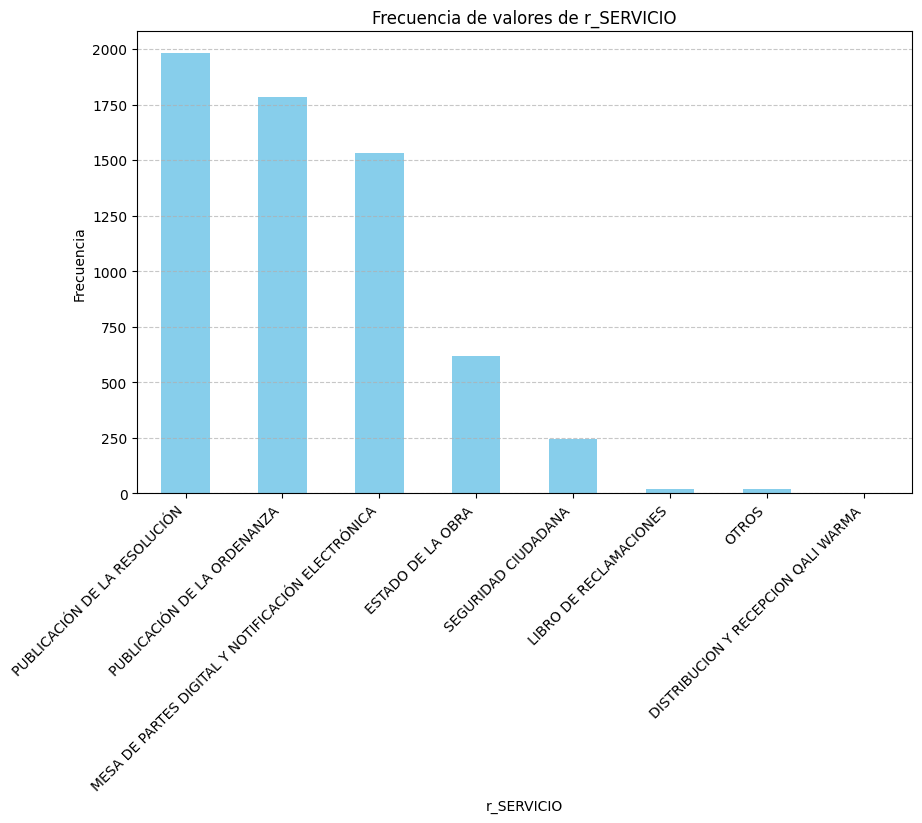

In [31]:
# Podemos realizar graficos como se comportan estos datos
# Graficar la variable cualitativa 'r_SERVICIO' en un gráfico de barras
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
df['r_SERVICIO'].value_counts().plot(kind='bar', color='skyblue')  # Crear el gráfico de barras
plt.title('Frecuencia de valores de r_SERVICIO')  # Título del gráfico
plt.xlabel('r_SERVICIO')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()  # Mostrar el gráfico


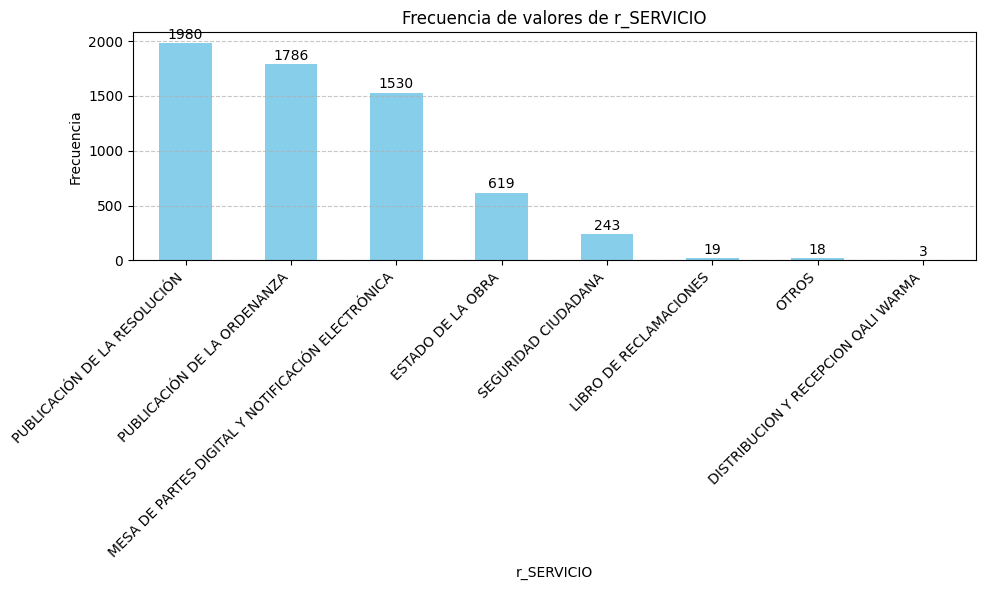

In [32]:
# Graficar la variable cualitativa 'r_SERVICIO' en un gráfico de barras con etiquetas de valor
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
counts = df['r_SERVICIO'].value_counts()  # Obtener la frecuencia de cada categoría
counts.plot(kind='bar', color='skyblue')  # Crear el gráfico de barras

# Agregar etiquetas de valor en cada barra
for i, value in enumerate(counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Frecuencia de valores de r_SERVICIO')  # Título del gráfico
plt.xlabel('r_SERVICIO')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()  # Ajustar el diseño para evitar recorte de etiquetas
plt.show()  # Mostrar el gráfico


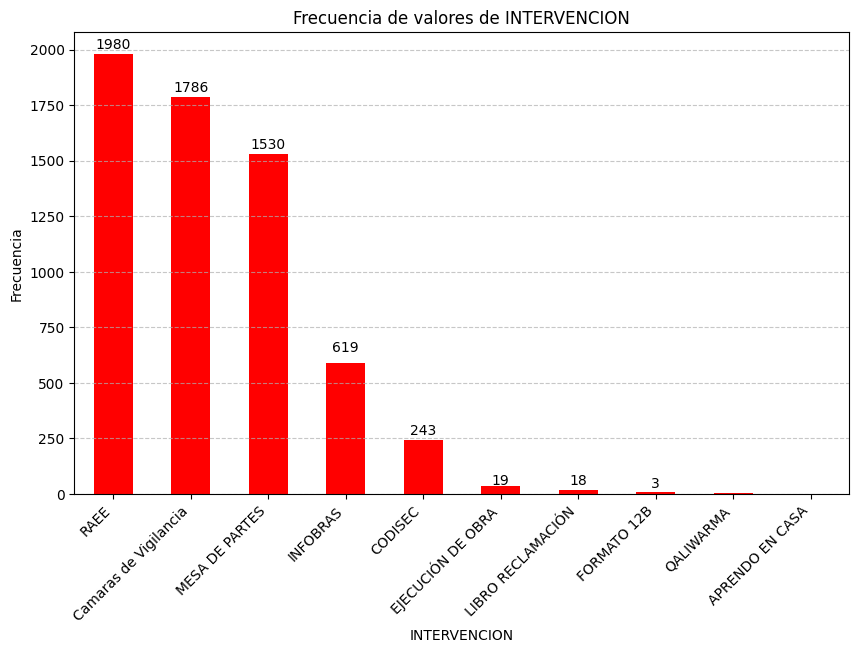

In [33]:
# Podemos realizar graficos como se comportan estos datos
# Graficar la variable cualitativa 'r_SERVICIO' en un gráfico de barras
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
df['INTERVENCION'].value_counts().plot(kind='bar', color='red')  # Crear el gráfico de barras


# Agregar etiquetas de valor en cada barra
for i, value in enumerate(counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Frecuencia de valores de INTERVENCION')  # Título del gráfico
plt.xlabel('INTERVENCION')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()  # Mostrar el gráfico

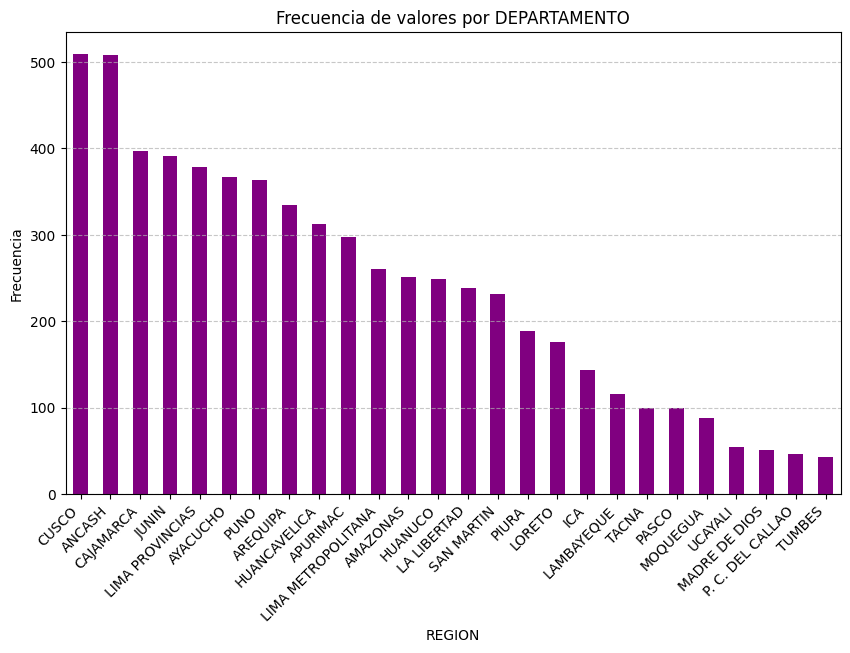

In [36]:
# Graficar la variable cualitativa 'r_SERVICIO' en un gráfico de barras
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
df['DEPARTAMENTO'].value_counts().plot(kind='bar', color='purple')  # Crear el gráfico de barras
plt.title('Frecuencia de valores por DEPARTAMENTO')  # Título del gráfico
plt.xlabel('REGION')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()  # Mostrar el gráfico

In [37]:
print("Frecuencia de valores actualizada para la columna 'ENTIDAD':")
print(df['ENTIDAD'].value_counts())

Frecuencia de valores actualizada para la columna 'ENTIDAD':
MUNICIPALIDAD DISTRITAL DE SANTA ROSA                                                                                       29
MUNICIPALIDAD DISTRITAL DE ECHARATI                                                                                         25
MUNICIPALIDAD DISTRITAL DE MEGANTONI                                                                                        23
MUNICIPALIDAD DISTRITAL DE SAN ANTONIO                                                                                      19
MUNICIPALIDAD DISTRITAL DE PUEBLO NUEVO                                                                                     13
MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL                                                                                    13
MUNICIPALIDAD DISTRITAL DE YAULI                                                                                            13
MUNICIPALIDAD DISTRITAL DE VILCABAMBA             

In [39]:
import pandas as pd

# Ordenar alfabéticamente los valores de la variable 'SERVICIO'
df_sorted = df.sort_values(by='ENTIDAD')

# Establecer la opción para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Imprimir la variable 'SERVICIO' ordenada
print("Todos los registros de la variable 'ENTIDAD' ordenados alfabéticamente:")
print(df_sorted['ENTIDAD'])


Todos los registros de la variable 'ENTIDAD' ordenados alfabéticamente:
5388                      SERVICIOS DE SANEAMIENTO TUMBES
1105        AGENCIA PERUANA DE COOPERACION INTERNACIONAL 
1098                         ARCHIVO GENERAL DE LA NACION
198                  AUTORIDAD NACIONAL DE SERVICIO CIVIL
5497         AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS
5498         AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS
200          AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS
1102                                  BANCO AGROPECUARIO 
188                    BANCO CENTRAL DE RESERVA DEL PERU 
220                                    BANCO DE LA NACION
1108                   CAJA DE PENSIONES MILITAR POLICIAL
230                    CAJA DE PENSIONES MILITAR POLICIAL
2252       CAJA MUNICIPAL DE AHORRO Y CREDITO CUSCO S.A. 
2226    CAJA MUNICIPAL DE AHORRO Y CREDITO DE AREQUIPA...
2283      CAJA MUNICIPAL DE AHORRO Y CREDITO DE HUANCAYO 
2272         CAJA MUNICIPAL DE AHORRO Y CREDITO DE ICA SA


In [40]:
import numpy as np

# Función para recategorizar la variable 'SERVICIO'
def recategorize_entidad(value):
    if 'AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS' in value:
        return 'AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS'

    elif 'GOBIERNO REGIONAL' in value or "GOB.REG" in value or 'GOB. REG' in value:
        return 'GOBIERNO REGIONAL'
    elif 'GERENCIA SUB REGIONAL' in value or "GER.SUBREGIONAL" in value or 'GERENCIA REGIONAL' in value:
        return 'GERENCIA REGIONAL O SUB REGIONAL'
    elif 'FONDO METROPOLITANO DE INVERSIONES' in value or "INVERSIONES" in value:
        return 'FONDO METROPOLITANO DE INVERSIONES'
    elif 'ENTIDAD PRESTADORA DE SERVICIOS' in value or "EPS" in value or "ENT.PREST.SERVICIOS" in value or "E.P.S." in value or 'EMPRESA PRESTADORA DE SERVICIOS' in value or "ENTIDAD PREST.DE SS.DE" in value:
        return 'ENTIDAD PRESTADORA DE SERVICIOS'


    elif 'EMPRESA' in value or "EMP REG DE SERV" in value or 'EMP.' in value:
        return 'EMPRESA MUNICIPAL, REGIONAL O NACIONAL'

    elif 'DIRECCION REGIONAL' in value or 'DIRECCION SUB REGIONAL' in value or 'DIRECCION GENERAL' in value:
        return 'DIRECCION REGIONAL O GENERAL'

    elif 'CORTE SUPERIOR' in value:
        return 'CORTE SUPERIOR DE JUSTICIA'
    elif 'CORPORACION' in value:
        return 'CORPORACION'
    elif 'COMITE DE ADMINISTRACION DEL FONDO EDUCATIVO' in value:
        return 'COMITE DE ADMINISTRACION DEL FONDO EDUCATIVO'

    elif 'CAJA MUNICIPAL' in value or 'CAJA DE PENSIONES' in value or "FONDO DE CAJAS MUNIC." in value:
        return 'CAJA MUNICIPAL O PENSIONES'
    elif 'MUNICIPALIDAD' in value:
        return 'MUNICIPALIDAD'


    elif 'UNIVERSIDAD' in value:
        return 'UNIVERSIDAD'
    elif 'PROGRAMA NACIONAL' in value or "PROGRAMA" in value or "PROYECTO ESPECIAL" in value:
        return 'PROGRAMAS O PROYECTOS'


    elif 'TRIBUTARIA' in value:
        return 'SAT'
    elif 'BENEFICENCIA' in value:
        return 'BENEFICENCIA'
    elif 'EJECUTORA' in value:
        return 'UNIDAD EJECUTORA'
    elif 'INSTITUTO' in value:
        return 'INSTITUTO NACIONAL'
    elif 'MINISTERIO' in value:
        return 'MINISTERIO'
    elif 'RED DE SALUD' in value or "DIRECCION DE SALUD" in value or "OFICINA DE GESTION DE SERVICIOS DE SALUD" in value or "DIRECCION DE REDES INTEGRADAS DE SALUD" in value or "HOSPITAL" in value:
        return 'HOSPITAL, DIRECCIONES O RED DE SALUD'



    else:
        return value  # Mantener el valor original si no coincide con ninguna categoría

# Crear la nueva variable 'r_SERVICIO' aplicando la función a 'SERVICIO'
df['r_ENTIDAD'] = df['ENTIDAD'].apply(recategorize_entidad)

# Ordenar alfabéticamente los registros de la nueva variable y mostrarlos
print(df['r_ENTIDAD'].sort_values())


5388                      SERVICIOS DE SANEAMIENTO TUMBES
1105        AGENCIA PERUANA DE COOPERACION INTERNACIONAL 
1098                         ARCHIVO GENERAL DE LA NACION
198                  AUTORIDAD NACIONAL DE SERVICIO CIVIL
200          AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS
5497         AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS
5498         AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS
1102                                  BANCO AGROPECUARIO 
188                    BANCO CENTRAL DE RESERVA DEL PERU 
220                                    BANCO DE LA NACION
560                                          BENEFICENCIA
3828                                         BENEFICENCIA
190                                          BENEFICENCIA
629                                          BENEFICENCIA
467                                          BENEFICENCIA
460                                          BENEFICENCIA
255                                          BENEFICENCIA
319           

In [41]:
print("Frecuencia de valores actualizada para la columna 'r_ENTIDAD':")
print(df['r_ENTIDAD'].value_counts())

Frecuencia de valores actualizada para la columna 'r_ENTIDAD':
MUNICIPALIDAD                                                            5658
GOBIERNO REGIONAL                                                         102
UNIVERSIDAD                                                                81
EMPRESA MUNICIPAL, REGIONAL O NACIONAL                                     57
PROGRAMAS O PROYECTOS                                                      52
DIRECCION REGIONAL O GENERAL                                               38
ENTIDAD PRESTADORA DE SERVICIOS                                            27
HOSPITAL, DIRECCIONES O RED DE SALUD                                       15
CAJA MUNICIPAL O PENSIONES                                                 15
INSTITUTO NACIONAL                                                         12
GERENCIA REGIONAL O SUB REGIONAL                                           12
SAT                                                                        11
U

In [42]:
import numpy as np

# Función para recategorizar la variable 'SERVICIO'
def recategorize_entidad(value):
    if 'AUTORIDAD PARA LA RECONSTRUCCION CON CAMBIOS' in value:
        return 'RECONSTRUCCION'

    elif 'GOBIERNO REGIONAL' in value or "GOB.REG" in value or 'GOB. REG' in value or 'GERENCIA SUB REGIONAL' in value or "GER.SUBREGIONAL" in value or 'GERENCIA REGIONAL' in value or 'DIRECCION REGIONAL' in value or 'DIRECCION SUB REGIONAL' in value or 'DIRECCION GENERAL' in value or "PRO DESARROLLO APURIMAC" in value or "MANCOMUNIDAD REGIONAL DE LOS ANDES APURIMAC" in value:
        return 'GOBIERNO REGIONAL'

    elif 'CAJA MUNICIPAL' in value or 'CAJA DE PENSIONES' in value or "FONDO DE CAJAS MUNIC." in value or "FONDO" in value:
        return 'FINANZAS'

    elif 'UNIVERSIDAD' in value or "ESCUELA" in value or "INSTITUTO" in value or 'COMITE DE ADMINISTRACION DEL FONDO EDUCATIVO' in value:
        return 'EDUCACION'

    elif 'PROGRAMA NACIONAL' in value or "PROGRAMA" in value or "PROYECTO ESPECIAL" in value:
        return 'PROGRAMAS O PROYECTOS'

    elif 'SERVICIOS' in value or "EPS" in value or "ENT.PREST.SERVICIOS" in value or "E.P.S." in value or 'TRIBUTARIA' in value or "ENTIDAD PREST.DE SS.DE" in value  or "INDUSTRIALES" in value or "ELECTRICA" in value or "SANEAMIENTO" in value or "AGUA"  in value or "SEDAPAR" in value or"SEDALIB" in value:
        return 'SERVICIOS'

    elif 'BENEFICENCIA' in value:
        return 'SERVIVIOS SOCIALES'

    elif 'EMPRESA' in value or "EMP REG DE SERV" in value or 'EMP.' in value or "CORPORACION" in value or "EMPSSAPAL" in value or "S.A." in value:
        return 'EMPRESA PUBLICA'

    elif 'MUNICIPALIDAD' in value:
        return 'GOBIERNO LOCAL'

    elif 'MINISTERIO' in value or "EJECUTORA" in value or "PLAN COPESCO NACIONAL" in value:
        return 'GBIERNO CENTRAL'


    elif 'FONDO METROPOLITANO DE INVERSIONES' in value or "INVERSIONES" in value:
        return 'INVERSIONES'


    elif 'CORTE SUPERIOR' in value or "PROCURADURIA GENERAL DEL ESTADO" in value:
        return 'JUSTICIA'

    elif 'PROVIAS' in value or "TRANSPORTES METROPOLITANOS DE TRUJILLO" in value:
        return 'TRANSPORTE'


    elif "POLICIA NACIONAL DEL PERU" in value or "COMANDO CONJUNTO DE LAS FUERZAS ARMADAS" in value or "MARINA DE GUERRA DEL PERU" in value or "FUERO MILITAR POLICIAL" in value:
        return 'SEGURIDAD'


    elif 'RED DE SALUD' in value or "DIRECCION DE SALUD" in value or "OFICINA DE GESTION DE SERVICIOS DE SALUD" in value or "DIRECCION DE REDES INTEGRADAS DE SALUD" in value or "HOSPITAL" in value:
        return 'SALUD'


    else:
        return "OTROS"  # Mantener el valor original si no coincide con ninguna categoría

# Crear la nueva variable 'r_SERVICIO' aplicando la función a 'SERVICIO'
df['r_ENTIDAD'] = df['ENTIDAD'].apply(recategorize_entidad)

# Ordenar alfabéticamente los registros de la nueva variable y mostrarlos
print(df['r_ENTIDAD'].sort_values())


1087                EDUCACION
111                 EDUCACION
1106                EDUCACION
4305                EDUCACION
4303                EDUCACION
5391                EDUCACION
4302                EDUCACION
733                 EDUCACION
5389                EDUCACION
388                 EDUCACION
4296                EDUCACION
5696                EDUCACION
4289                EDUCACION
3861                EDUCACION
5985                EDUCACION
4287                EDUCACION
910                 EDUCACION
4286                EDUCACION
495                 EDUCACION
1125                EDUCACION
490                 EDUCACION
5179                EDUCACION
4103                EDUCACION
2239                EDUCACION
244                 EDUCACION
245                 EDUCACION
2245                EDUCACION
218                 EDUCACION
2247                EDUCACION
1065                EDUCACION
4310                EDUCACION
5616                EDUCACION
1071                EDUCACION
4348      

In [43]:
print("Frecuencia de valores actualizada para la columna 'r_ENTIDAD':")
print(df['r_ENTIDAD'].value_counts())

Frecuencia de valores actualizada para la columna 'r_ENTIDAD':
GOBIERNO LOCAL           5635
GOBIERNO REGIONAL         155
SERVICIOS                 110
EDUCACION                  95
PROGRAMAS O PROYECTOS      55
FINANZAS                   33
EMPRESA PUBLICA            33
OTROS                      22
GBIERNO CENTRAL            16
SALUD                      14
JUSTICIA                   10
SERVIVIOS SOCIALES          8
SEGURIDAD                   6
RECONSTRUCCION              3
TRANSPORTE                  3
Name: r_ENTIDAD, dtype: int64


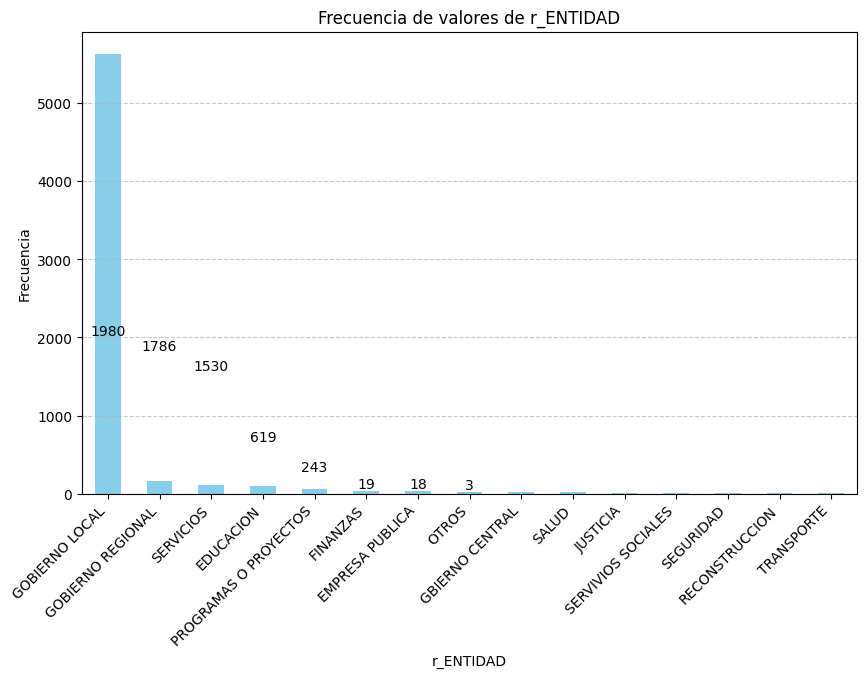

In [44]:
# Podemos realizar graficos como se comportan estos datos
# Graficar la variable cualitativa 'r_SERVICIO' en un gráfico de barras
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
df['r_ENTIDAD'].value_counts().plot(kind='bar', color='skyblue')  # Crear el gráfico de barras

# Agregar etiquetas de valor en cada barra
for i, value in enumerate(counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Frecuencia de valores de r_ENTIDAD')  # Título del gráfico
plt.xlabel('r_ENTIDAD')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()  # Mostrar el gráfico


In [45]:
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df['r_SERVICIO'], df['r_ENTIDAD'])

# Mostrar la tabla de contingencia
print(tabla_contingencia)


r_ENTIDAD                                          EDUCACION  EMPRESA PUBLICA  \
r_SERVICIO                                                                      
DISTRIBUCION Y RECEPCION QALI WARMA                        0                0   
ESTADO DE LA OBRA                                         14                6   
LIBRO DE RECLAMACIONES                                     0                0   
MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA         41                7   
OTROS                                                      0                0   
PUBLICACIÓN DE LA ORDENANZA                                2                3   
PUBLICACIÓN DE LA RESOLUCIÓN                              35               16   
SEGURIDAD CIUDADANA                                        3                1   

r_ENTIDAD                                          FINANZAS  GBIERNO CENTRAL  \
r_SERVICIO                                                                     
DISTRIBUCION Y RECEPCION QALI

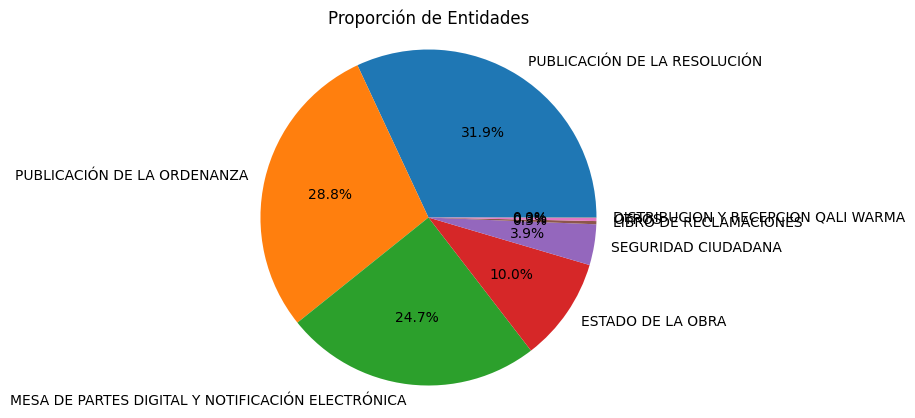

In [46]:
# Calcular la proporción de cada categoría
proporcion_entidad = df['r_SERVICIO'].value_counts()

# Graficar
proporcion_entidad.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.title('Proporción de Entidades')
plt.ylabel('')
plt.show()


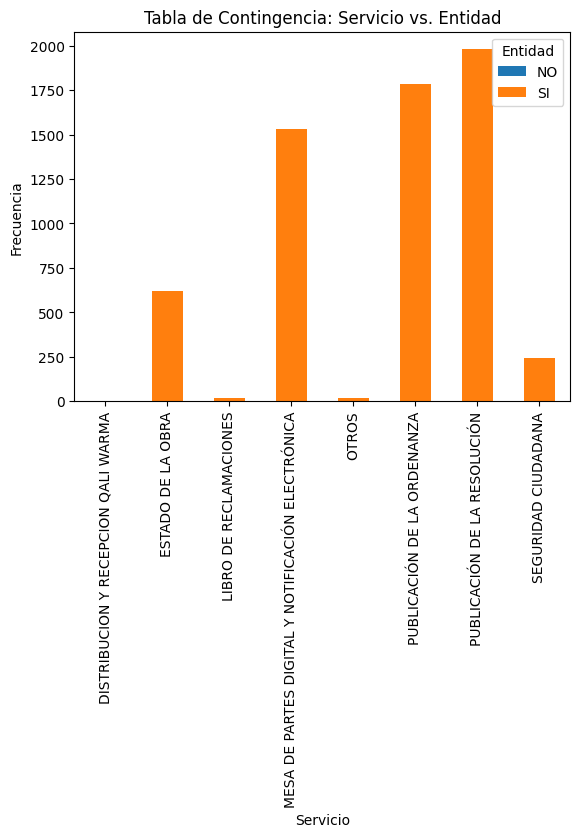

In [47]:
# Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(df['r_SERVICIO'], df['INCUMPLIMIENTO'])

# Graficar
tabla_contingencia.plot(kind='bar', stacked=True)
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.title('Tabla de Contingencia: Servicio vs. Entidad')
plt.legend(title='Entidad', loc='upper right')
plt.show()


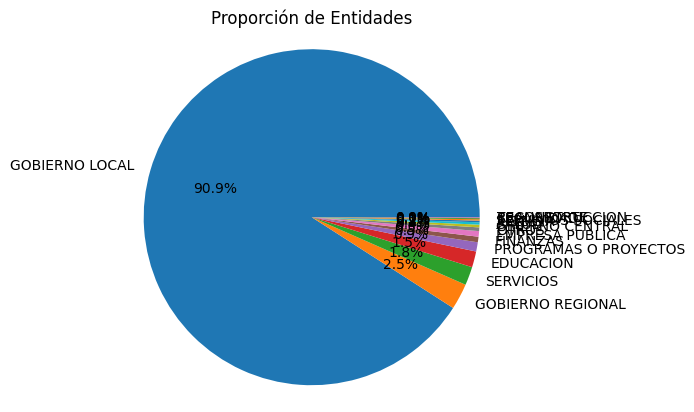

In [48]:
# Calcular la proporción de cada categoría
proporcion_entidad = df['r_ENTIDAD'].value_counts()

# Graficar
proporcion_entidad.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.title('Proporción de Entidades')
plt.ylabel('')
plt.show()


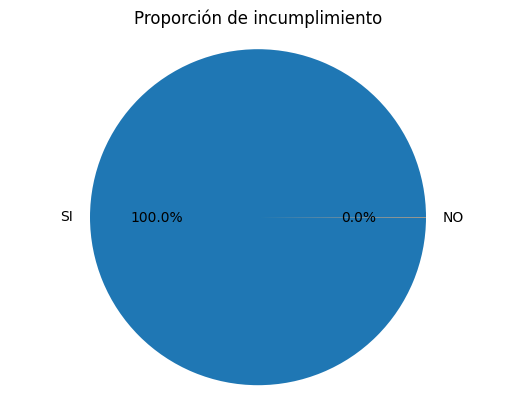

In [49]:
# Calcular la proporción de cada categoría
proporcion_entidad = df['INCUMPLIMIENTO'].value_counts()

# Graficar
proporcion_entidad.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.title('Proporción de incumplimiento')
plt.ylabel('')
plt.show()

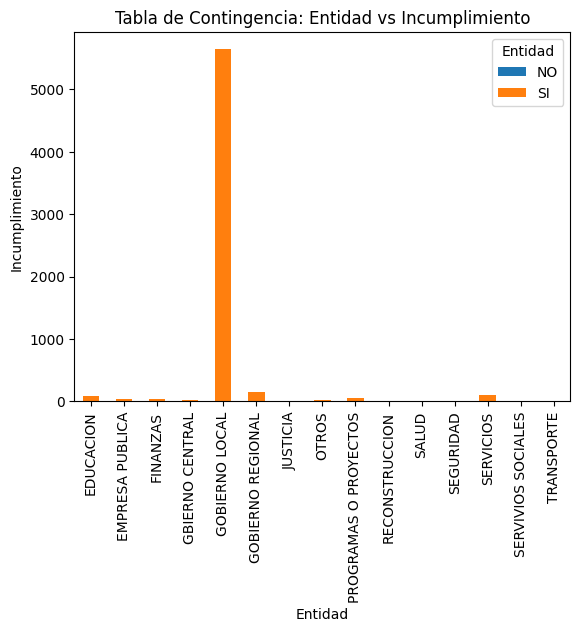

In [50]:
# Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(df['r_ENTIDAD'], df['INCUMPLIMIENTO'])

# Graficar
tabla_contingencia.plot(kind='bar', stacked=True)
plt.xlabel('Entidad')
plt.ylabel('Incumplimiento')
plt.title('Tabla de Contingencia: Entidad vs Incumplimiento')
plt.legend(title='Entidad', loc='upper right')
plt.show()

In [51]:
type(df)

pandas.core.frame.DataFrame

In [52]:
df.head()

CODIGO                                           SERVICIO  \
0  02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1  02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2  02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3  02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4  02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

      INTERVENCION  COD_ENTIDAD                                ENTIDAD  \
0  APRENDO EN CASA          190                MINISTERIO DE EDUCACION   
1        QALIWARMA         1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2        QALIWARMA          398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3        QALIWARMA         2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4          CODISEC         2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

         DEPARTAMENTO PROVINCIA    DISTRITO INCUMPLIMIENTO  \
0  LIMA METROPOLITANA      LIMA   SAN BORJA             SI   
1                 ICA       ICA    SANTIAGO             SI   
2             HUANUCO      AMBO        AMBO             SI   
3                PUNO  CARABAYA    USICAYOS             SI   
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL             SI   

          NUM_INFORME                           r_SERVICIO        r_ENTIDAD  
0  002-2022-CG/PC-SOO                                OTROS  GBIERNO CENTRAL  
1  017-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
2  020-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
3  033-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
4  161-2022-CG/PC-SOO                  SEGURIDAD CIUDADANA   GOBIERNO LOCAL

In [298]:
df.drop(columns=['r_entidad'], inplace=True)

In [313]:
df.head()

CODIGO                                           SERVICIO  \
0  02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1  02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2  02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3  02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4  02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

      INTERVENCION  COD_ENTIDAD                                ENTIDAD  \
0  APRENDO EN CASA          190                MINISTERIO DE EDUCACION   
1        QALIWARMA         1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2        QALIWARMA          398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3        QALIWARMA         2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4          CODISEC         2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

               REGION PROVINCIA    DISTRITO INCUMPLIMIENTO  \
0  LIMA METROPOLITANA      LIMA   SAN BORJA             SI   
1                 ICA       ICA    SANTIAGO             SI   
2             HUANUCO      AMBO        AMBO             SI   
3                PUNO  CARABAYA    USICAYOS             SI   
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL             SI   

          NUM_INFORME                           r_SERVICIO        r_ENTIDAD  
0  002-2022-CG/PC-SOO                                OTROS  GBIERNO CENTRAL  
1  017-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
2  020-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
3  033-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
4  161-2022-CG/PC-SOO                  SEGURIDAD CIUDADANA   GOBIERNO LOCAL


Para hacer mapas geográficos con Python utilizando las columnas de ubicación geográfica como REGION, PROVINCIA y DISTRITO, puedes utilizar la biblioteca geopandas junto con otras como matplotlib para visualización. Aquí tienes una sintaxis básica para crear un mapa geográfico:

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar un shapefile de las fronteras de las regiones/provincias/distritos
regiones = gpd.read_file('/content/gadm41_PER_0.shp')  # Reemplaza 'shapefile_region.shp' con la ruta de tu archivo shapefile

# Filtrar el DataFrame df para seleccionar solo las columnas relevantes
df_geografico = df[['REGION', 'PROVINCIA', 'DISTRITO']]

# Agrupar por ubicación geográfica y contar el número de registros en cada grupo
conteo_por_ubicacion = df_geografico.groupby(['REGION', 'PROVINCIA', 'DISTRITO']).size().reset_index(name='conteo')

# Unir los datos geográficos con los datos del conteo
regiones_con_conteo = regiones.merge(conteo_por_ubicacion, on=['REGION', 'PROVINCIA', 'DISTRITO'], how='left')

# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
regiones_con_conteo.plot(column='conteo', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Mapa de incidencias por ubicación geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


KeyError: "['REGION'] not in index"

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Leer datos espaciales
geo_data = gpd.read_file("/content/gadm41_PER_3.shp")

# Seleccionar las columnas de ubicación
region = geo_data["REGION"]
provincia = geo_data["PROVINCIA"]
distrito = geo_data["DISTRITO"]

# Crear el mapa
fig, ax = plt.subplots(figsize=(10, 10))
geo_data.plot(ax=ax, color="lightgray")

# Agregar información a los puntos
for i in range(len(geo_data)):
  plt.annotate(f"{region[i]}\n{provincia[i]}\n{distrito[i]}", (geo_data.geometry.centroid.x[i], geo_data.geometry.centroid.y[i]))

plt.show()


ERROR:fiona._env:Error in fread() reading object of size 18712 at offset 11522640 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 12744 at offset 11541352 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 20664 at offset 11554096 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 26248 at offset 11574760 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 18776 at offset 11601008 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 7960 at offset 11619784 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 6552 at offset 11627744 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 6584 at offset 11634296 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 6232 at offset 11640880 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 26412 at offset 11647112 from .shp file
ERROR:fiona._env:Error in fread() 

KeyError: 'REGION'

In [56]:
# Instalar las bibliotecas necesarias si aún no lo has hecho:
!pip install geopandas matplotlib


In [58]:
import geopandas as gpd

# Ruta del archivo shapefile
# ruta_shapefile = "ruta/del/archivo/shapefile_region.shp"

# Cargar el shapefile
mapa_peru = gpd.read_file("/content/gadm41_PER_0.shp")


<Figure size 1000x1000 with 0 Axes>

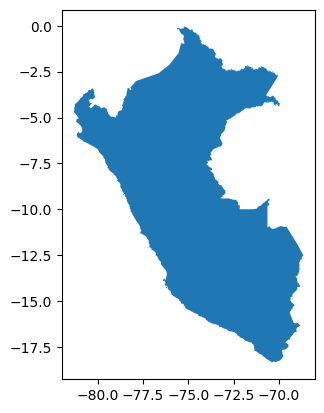

In [59]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Graficar el mapa
mapa_peru.plot()

# Mostrar el mapa
plt.show()


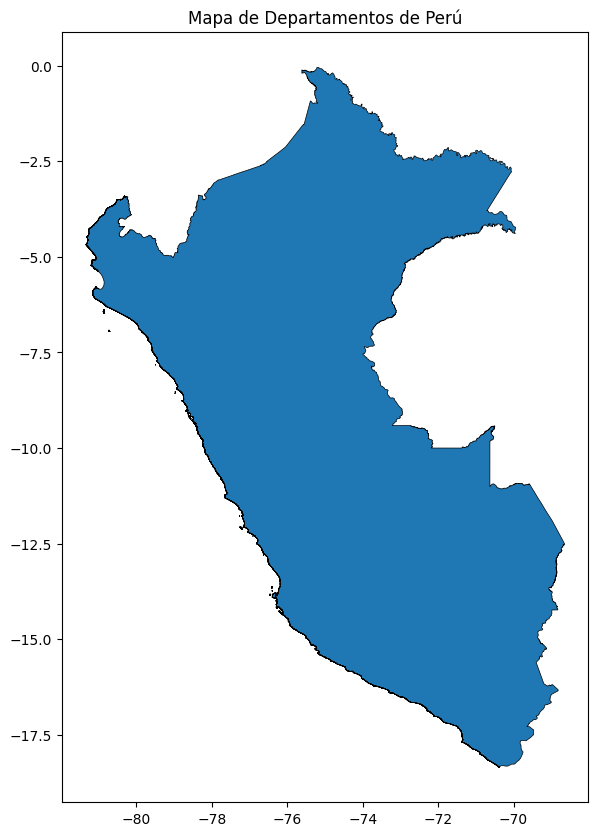

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_0.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mapa_departamentos.plot(ax=ax, edgecolor='k', linewidth=0.5)
plt.title('Mapa de Departamentos de Perú')
plt.show()


In [76]:
df.head()

CODIGO                                           SERVICIO  \
0  02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1  02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2  02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3  02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4  02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

      INTERVENCION  COD_ENTIDAD                                ENTIDAD  \
0  APRENDO EN CASA          190                MINISTERIO DE EDUCACION   
1        QALIWARMA         1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2        QALIWARMA          398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3        QALIWARMA         2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4          CODISEC         2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

         DEPARTAMENTO PROVINCIA    DISTRITO INCUMPLIMIENTO  \
0  LIMA METROPOLITANA      LIMA   SAN BORJA             SI   
1                 ICA       ICA    SANTIAGO             SI   
2             HUANUCO      AMBO        AMBO             SI   
3                PUNO  CARABAYA    USICAYOS             SI   
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL             SI   

          NUM_INFORME                           r_SERVICIO        r_ENTIDAD  
0  002-2022-CG/PC-SOO                                OTROS  GBIERNO CENTRAL  
1  017-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
2  020-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
3  033-2022-CG/PC-SOO  DISTRIBUCION Y RECEPCION QALI WARMA   GOBIERNO LOCAL  
4  161-2022-CG/PC-SOO                  SEGURIDAD CIUDADANA   GOBIERNO LOCAL

KeyError: 'LIMA'

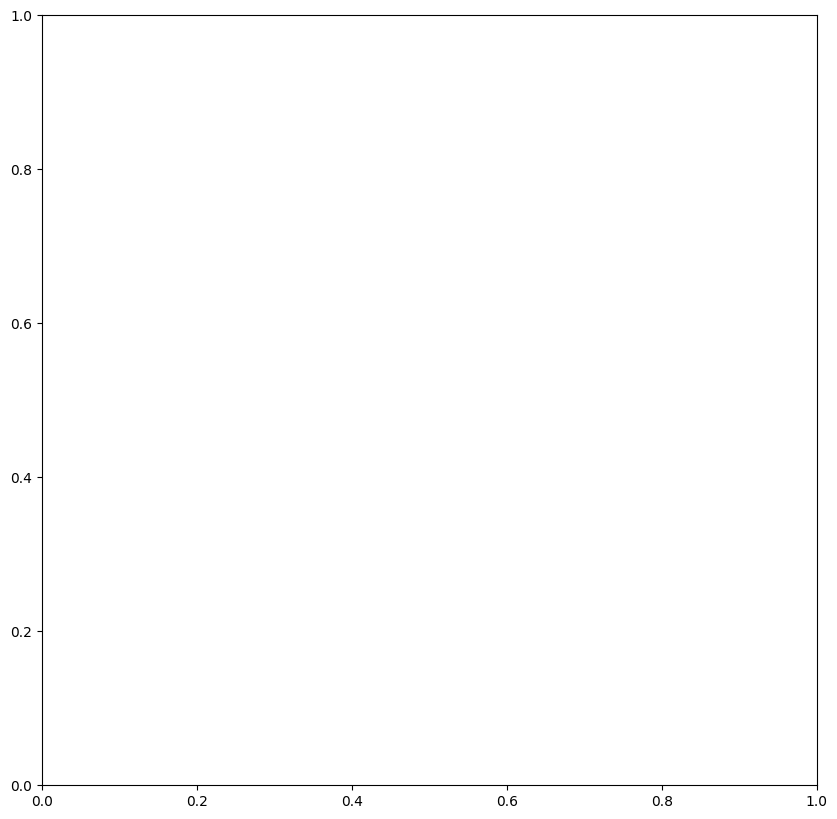

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_2.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Crear una lista de colores únicos para cada departamento
colores = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan']  # Agrega más colores si son necesarios

# Graficar el mapa con colores distintos para cada departamento
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i, departamento in enumerate(mapa_departamentos['LIMA']):
    mapa_departamentos[mapa_departamentos['LIMA'] == departamento].plot(ax=ax, color=colores[i], edgecolor='k', linewidth=0.5)

# Configuración adicional del mapa
plt.title('Mapa de Departamentos de Perú')
plt.show()


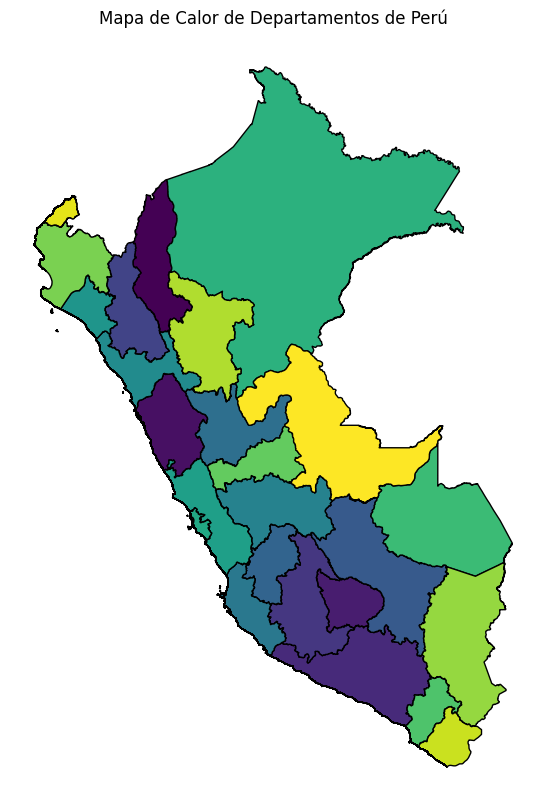

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, cmap='viridis', edgecolor='k')

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()


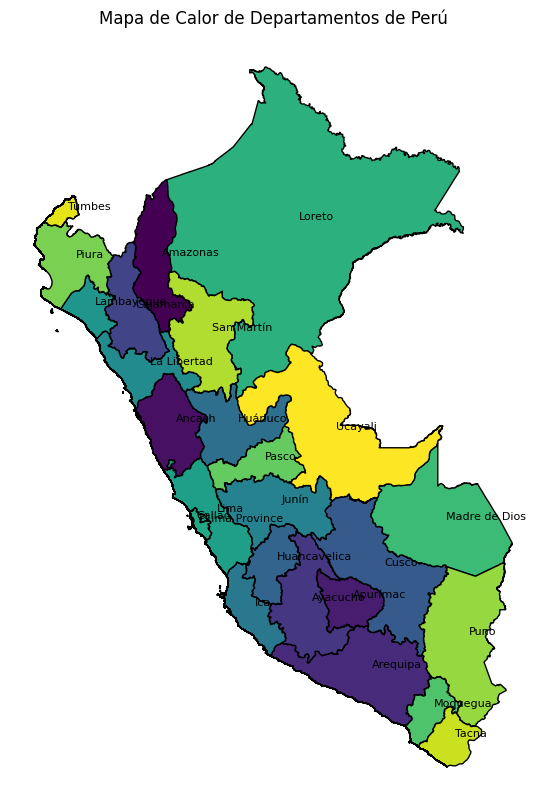

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, cmap='viridis', edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento
for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()


In [63]:
print("Frecuencia de valores actualizada para la columna 'DEPARTAMENTO':")
print(df['DEPARTAMENTO'].value_counts())

Frecuencia de valores actualizada para la columna 'DEPARTAMENTO':
CUSCO                 509
ANCASH                508
CAJAMARCA             397
JUNIN                 391
LIMA PROVINCIAS       379
AYACUCHO              367
PUNO                  363
AREQUIPA              335
HUANCAVELICA          312
APURIMAC              298
LIMA METROPOLITANA    260
AMAZONAS              251
HUANUCO               249
LA LIBERTAD           239
SAN MARTIN            232
PIURA                 189
LORETO                176
ICA                   144
LAMBAYEQUE            116
TACNA                 100
PASCO                 100
MOQUEGUA               88
UCAYALI                55
MADRE DE DIOS          51
P. C. DEL CALLAO       46
TUMBES                 43
Name: DEPARTAMENTO, dtype: int64


KeyError: 'Amazonas'

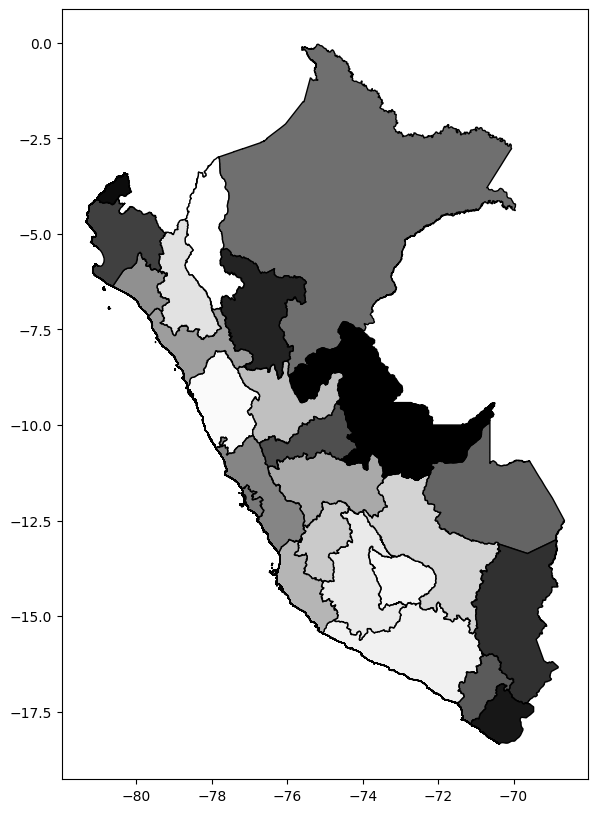

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "CUSCO": 509, "ANCASH": 508, "CAJAMARCA": 397, "JUNIN": 391, "LIMA PROVINCIAS": 379,
    "AYACUCHO": 367, "PUNO": 363, "AREQUIPA": 335, "HUANCAVELICA": 312, "APURIMAC": 298,
    "LIMA METROPOLITANA": 260, "AMAZONAS": 251, "HUANUCO": 249, "LA LIBERTAD": 239, "SAN MARTIN": 232,
    "PIURA": 189, "LORETO": 176, "ICA": 144, "LAMBAYEQUE": 116, "TACNA": 100,
    "PASCO": 100, "MOQUEGUA": 88, "UCAYALI": 55, "MADRE DE DIOS": 51, "P. C. DEL CALLAO": 46, "TUMBES": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())
norm = plt.Normalize(min_val, max_val)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, cmap='Greys', edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):
    ax.annotate(label + f'\n{intervenciones[label]}', xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()


<ipython-input-65-17d9401c0232>:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):


KeyError: 'Amazonas'

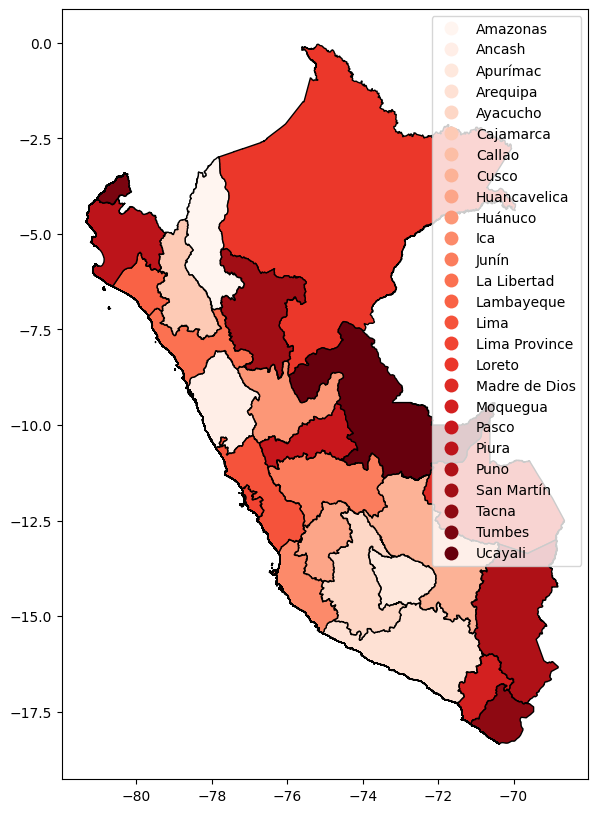

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "CUSCO": 509, "ANCASH": 508, "CAJAMARCA": 397, "JUNIN": 391, "LIMA PROVINCIAS": 379,
    "AYACUCHO": 367, "PUNO": 363, "AREQUIPA": 335, "HUANCAVELICA": 312, "APURIMAC": 298,
    "LIMA METROPOLITANA": 260, "AMAZONAS": 251, "HUANUCO": 249, "LA LIBERTAD": 239, "SAN MARTIN": 232,
    "PIURA": 189, "LORETO": 176, "ICA": 144, "LAMBAYEQUE": 116, "TACNA": 100,
    "PASCO": 100, "MOQUEGUA": 88, "UCAYALI": 55, "MADRE DE DIOS": 51, "P. C. DEL CALLAO": 46, "TUMBES": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())
norm = plt.Normalize(min_val, max_val)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, cmap='Reds', edgecolor='k', column='NAME_1', legend=True)

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):
    ax.annotate(label + f'\n{intervenciones[label]}', xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()


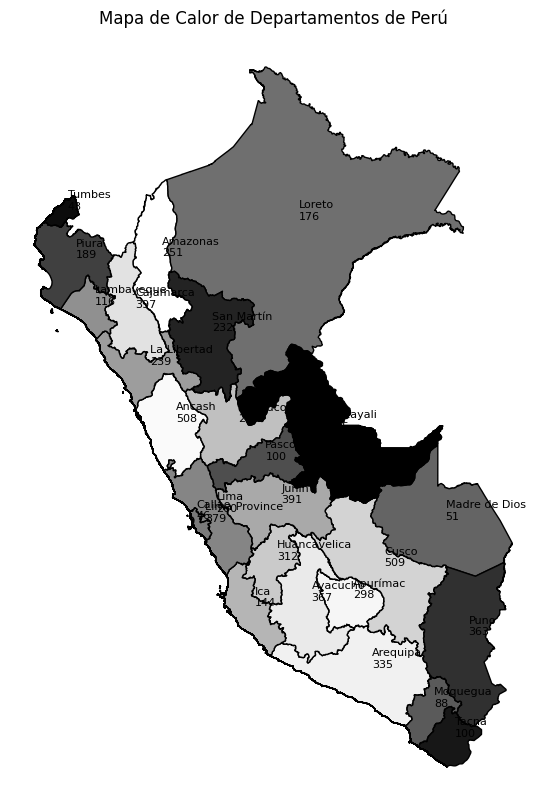

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())
norm = plt.Normalize(min_val, max_val)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, cmap='Greys', edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):
    ax.annotate(label + f'\n{intervenciones[label]}', xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()


<ipython-input-67-a28f54838502>:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):


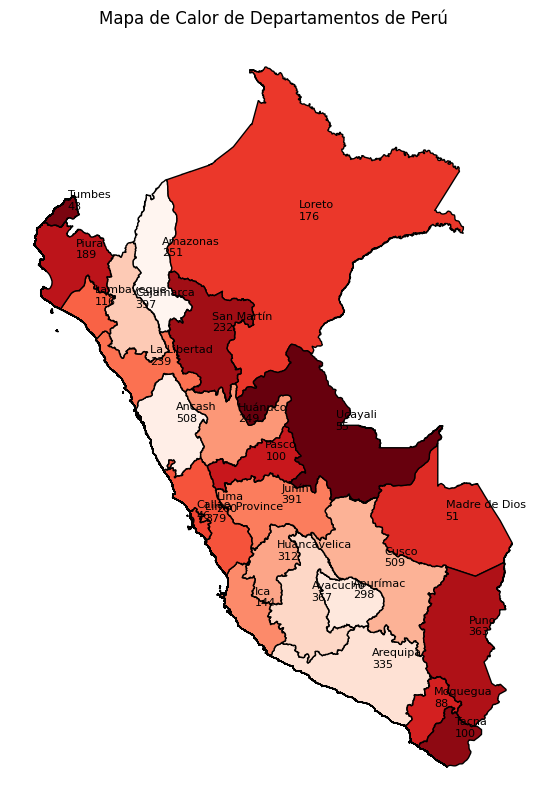

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())
norm = plt.Normalize(min_val, max_val)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, cmap='Reds', edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for x, y, label in zip(mapa_departamentos.geometry.centroid.x, mapa_departamentos.geometry.centroid.y, mapa_departamentos['NAME_1']):
    ax.annotate(label + f'\n{intervenciones[label]}', xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()

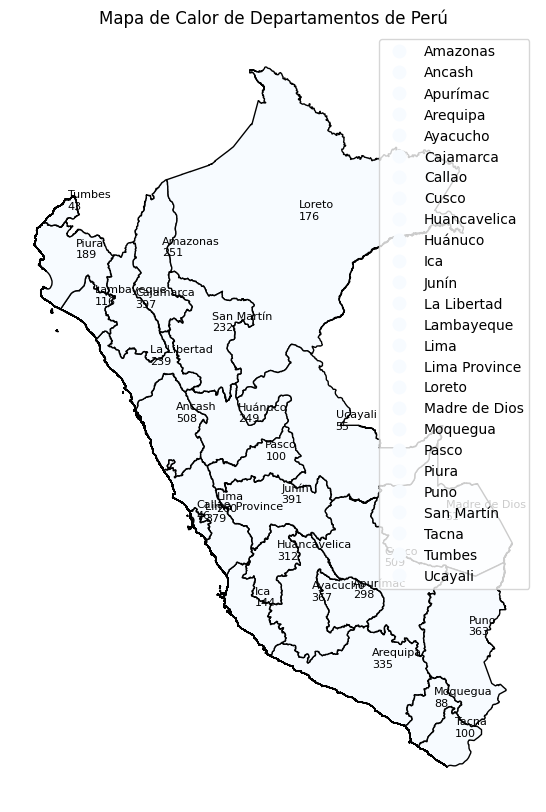

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())
norm = Normalize(vmin=min_val, vmax=max_val)

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de calor de los departamentos
mapa_departamentos.plot(ax=ax, column='NAME_1', cmap='Blues', edgecolor='k', legend=True, norm=norm)

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()



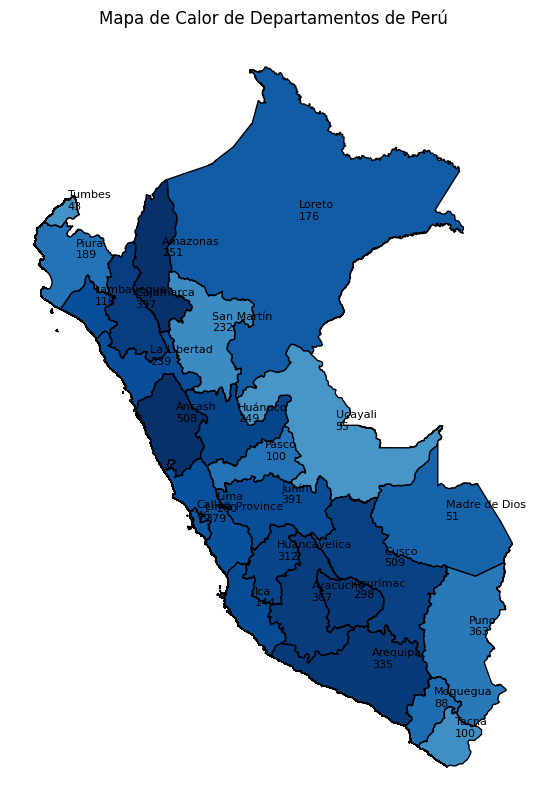

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())

# Asignar colores en función de la cantidad de intervenciones
colores = [plt.cm.Blues(np.log(1 + intervenciones[dept]) / np.log(1 + max_val)) if intervenciones[dept] > 0 else 'white' for dept in intervenciones.keys()]

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de color de los departamentos
mapa_departamentos.plot(ax=ax, color=colores, edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Mapa de Calor de Departamentos de Perú')
plt.axis('off')  # Desactivar los ejes
plt.show()


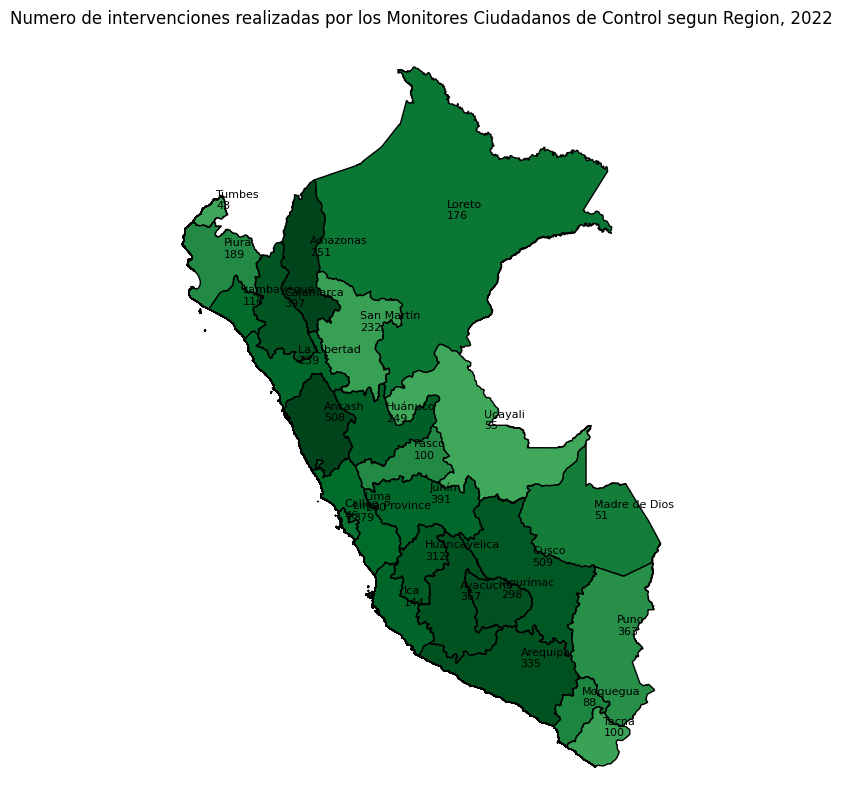

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())

# Asignar colores en función de la cantidad de intervenciones
colores = [plt.cm.Greens(np.log(10 + intervenciones[dept]) / np.log(10 + max_val)) if intervenciones[dept] > 0 else 'white' for dept in intervenciones.keys()]

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de color de los departamentos
mapa_departamentos.plot(ax=ax, color=colores, edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Configuración adicional del mapa
plt.title('Numero de intervenciones realizadas por los Monitores Ciudadanos de Control según Region, 2022')
plt.axis('off')  # Desactivar los ejes
plt.show()


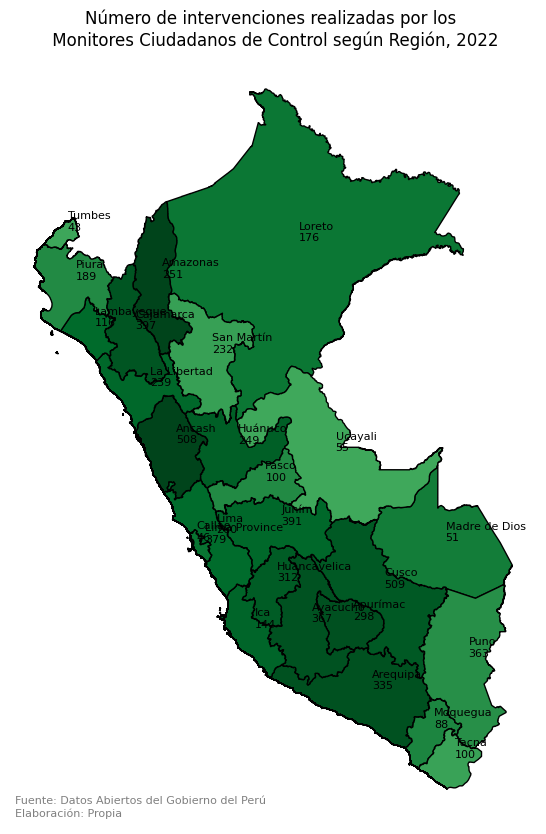

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())

# Asignar colores en función de la cantidad de intervenciones
colores = [plt.cm.Greens(np.log(10 + intervenciones[dept]) / np.log(10 + max_val)) if intervenciones[dept] > 0 else 'white' for dept in intervenciones.keys()]

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de color de los departamentos
mapa_departamentos.plot(ax=ax, color=colores, edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Agregar fuente y referencia a la elaboración propia
ax.text(0.01, 0.01, 'Fuente: Datos Abiertos del Gobierno del Perú\nElaboración: Propia', transform=ax.transAxes, fontsize=8, color='gray')

# Configuración adicional del mapa
plt.title('Número de intervenciones realizadas por los \n Monitores Ciudadanos de Control según Región, 2022')
plt.axis('off')  # Desactivar los ejes
plt.show()


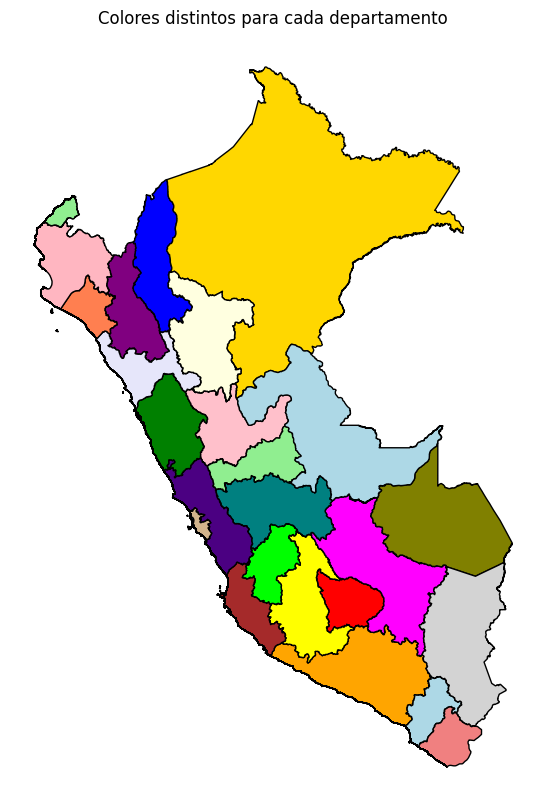

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Crear una lista de colores personalizada para cada departamento
# Puedes ajustar los colores según tus preferencias
colores = [
    'blue', 'green', 'red', 'orange', 'yellow', 'purple', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal',
    'lavender', 'coral', 'indigo', 'tan', 'gold', 'olive', 'lightblue', 'lightgreen', 'lightpink', 'lightgray',
    'lightyellow', 'lightcoral', 'lightgreen', 'lightblue', 'lightpink'
]

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de color de los departamentos
mapa_departamentos.plot(ax=ax, color=colores, edgecolor='k')

# Configuración adicional del mapa
plt.title('Colores distintos para cada departamento')
plt.axis('off')  # Desactivar los ejes
plt.show()


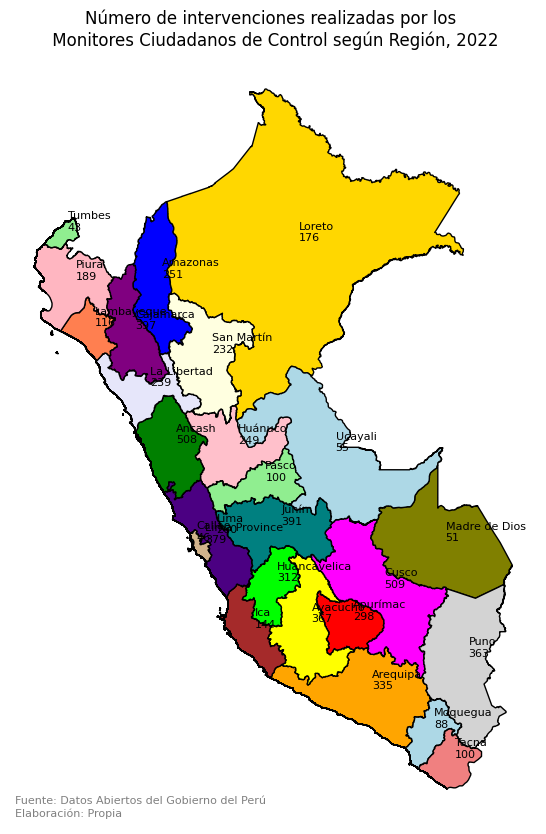

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Crear una lista de colores personalizada para cada departamento
# Puedes ajustar los colores según tus preferencias
colores = [
    'blue', 'green', 'red', 'orange', 'yellow', 'purple', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal',
    'lavender', 'coral', 'indigo', 'tan', 'gold', 'olive', 'lightblue', 'lightgreen', 'lightpink', 'lightgray',
    'lightyellow', 'lightcoral', 'lightgreen', 'lightblue', 'lightpink'
]

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar el mapa de color de los departamentos
mapa_departamentos.plot(ax=ax, color=colores, edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Agregar fuente y referencia a la elaboración propia
ax.text(0.01, 0.01, 'Fuente: Datos Abiertos del Gobierno del Perú\nElaboración: Propia', transform=ax.transAxes, fontsize=8, color='gray')

# Configuración adicional del mapa
plt.title('Número de intervenciones realizadas por los \n Monitores Ciudadanos de Control según Región, 2022')
plt.axis('off')  # Desactivar los ejes
plt.show()


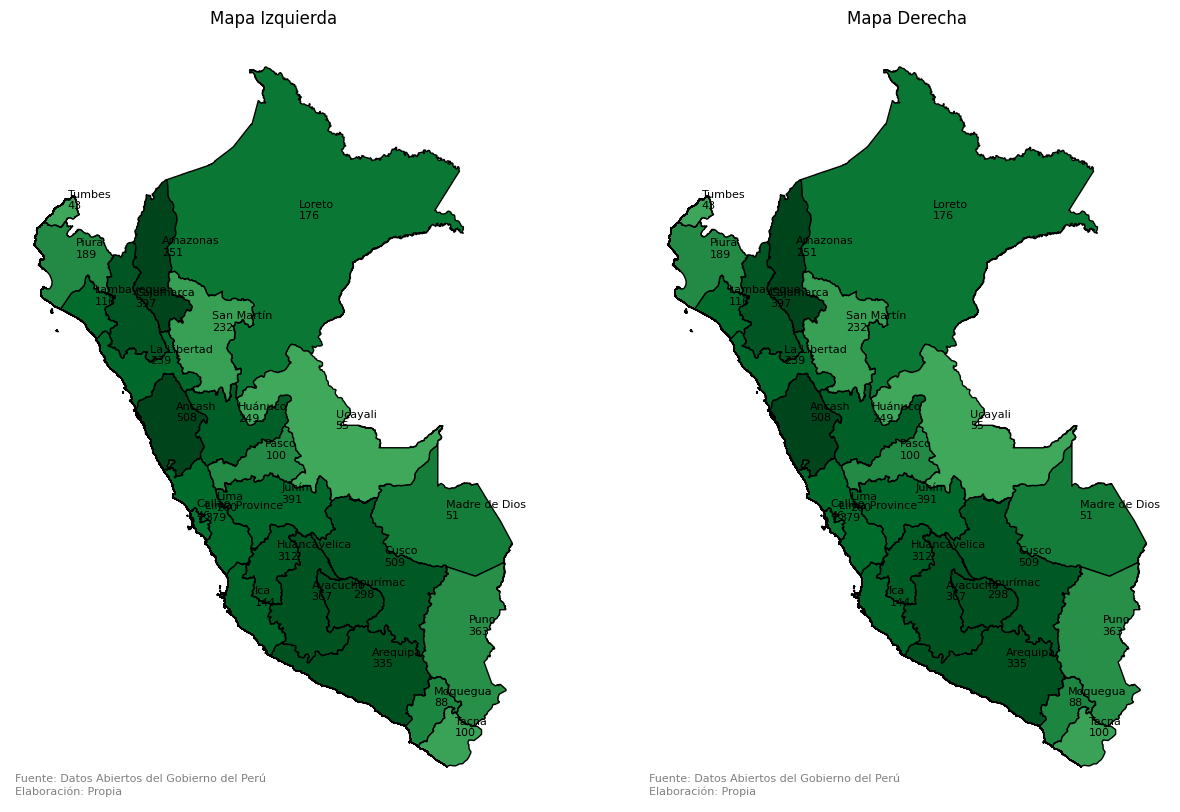

In [85]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el shapefile de los departamentos de Perú
ruta_shapefile_departamentos = "/content/gadm41_PER_1.shp"
mapa_departamentos = gpd.read_file(ruta_shapefile_departamentos)

# Datos de la cantidad de intervenciones por departamento
intervenciones = {
    "Cusco": 509, "Ancash": 508, "Cajamarca": 397, "Junín": 391, "Lima Province": 379,
    "Ayacucho": 367, "Puno": 363, "Arequipa": 335, "Huancavelica": 312, "Apurímac": 298,
    "Lima": 260, "Amazonas": 251, "Huánuco": 249, "La Libertad": 239, "San Martín": 232,
    "Piura": 189, "Loreto": 176, "Ica": 144, "Lambayeque": 116, "Tacna": 100,
    "Pasco": 100, "Moquegua": 88, "Ucayali": 55, "Madre de Dios": 51, "Callao": 46, "Tumbes": 43
}

# Normalizar los valores para la escala de colores
min_val = min(intervenciones.values())
max_val = max(intervenciones.values())

# Asignar colores en función de la cantidad de intervenciones
colores = [plt.cm.Greens(np.log(10 + intervenciones[dept]) / np.log(10 + max_val)) if intervenciones[dept] > 0 else 'white' for dept in intervenciones.keys()]

# Crear una figura y ejes para los mapas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Graficar el mapa de color de los departamentos en el primer subplot
mapa_departamentos.plot(ax=ax1, color=colores, edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones en el primer subplot
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax1.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Agregar fuente y referencia a la elaboración propia en el primer subplot
ax1.text(0.01, 0.01, 'Fuente: Datos Abiertos del Gobierno del Perú\nElaboración: Propia', transform=ax1.transAxes, fontsize=8, color='gray')
ax1.set_title('Mapa Izquierda')

# Graficar el mapa de color de los departamentos en el segundo subplot
mapa_departamentos.plot(ax=ax2, color=colores, edgecolor='k')

# Agregar etiquetas con el nombre de cada departamento y cantidad de intervenciones en el segundo subplot
for _, row in mapa_departamentos.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row['NAME_1']
    num_intervenciones = intervenciones[label]
    ax2.annotate(f"{label}\n{num_intervenciones}", xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Agregar fuente y referencia a la elaboración propia en el segundo subplot
ax2.text(0.01, 0.01, 'Fuente: Datos Abiertos del Gobierno del Perú\nElaboración: Propia', transform=ax2.transAxes, fontsize=8, color='gray')
ax2.set_title('Mapa Derecha')

# Configuración adicional de los mapas
for ax in (ax1, ax2):
    ax.axis('off')  # Desactivar los ejes

plt.show()


In [71]:
# Crear la tabla de contingencia
tabla_contingencia1 = pd.crosstab(df['DEPARTAMENTO'], df['INCUMPLIMIENTO'])

# Mostrar la tabla de contingencia
print(tabla_contingencia1)

INCUMPLIMIENTO      NO   SI
DEPARTAMENTO               
AMAZONAS             0  251
ANCASH               0  508
APURIMAC             0  298
AREQUIPA             0  335
AYACUCHO             0  367
CAJAMARCA            0  397
CUSCO                0  509
HUANCAVELICA         0  312
HUANUCO              0  249
ICA                  0  144
JUNIN                0  391
LA LIBERTAD          0  239
LAMBAYEQUE           0  116
LIMA METROPOLITANA   1  259
LIMA PROVINCIAS      0  379
LORETO               0  176
MADRE DE DIOS        0   51
MOQUEGUA             0   88
P. C. DEL CALLAO     1   45
PASCO                0  100
PIURA                0  189
PUNO                 0  363
SAN MARTIN           0  232
TACNA                0  100
TUMBES               0   43
UCAYALI              0   55


In [72]:
df["SERVICIO"].value_counts()

REGISTRO DEL FORMATO 12-B: SEGUIMIENTO A LA EJECUCIÓN DE INVERSIONES                                                                                                                                                                                                                                                                                                        10
EJECUCIÓN DE LA OBRA: "CREACIÓN DE LOS SERVICIOS DEL CENTRO INTEGRAL DE ATENCIÓN AL ADULTO MAYOR SECTOR SAN GABRIEL ALTO EN EL DISTRITO DE VILLA MARÍA DEL TRIUNFO, PROVINCIA DE LIMA - LIMA"                                                                                                                                                                                2
ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA INSTALACIÓN DE SERVICIOS EDUCATIVOS EN 05 INSTITUCIONES EDUCATIVAS DEL NIVEL INICIAL EN EL ÁMBITO DE LOS DISTRITOS DE CHALCOS Y CHILCAYOCC DE LA PROVINCIA D                                                                  

In [73]:
df["SERVICIO"].sum()

'IMPLEMENTACIÓN DE LA ESTRATEGIA \x93APRENDO EN CASA\x94 EN EL MARCO DE LA EMERGENCIA SANITARIA PARA LA PREVENCIÓN Y CONTROL DEL COVID-19DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGRAMA NACIONAL DE ALIMENTACIÓN ESCOLAR ¿ QALI WARMA POR PARTE DE LA MUNICIPALIDAD DISTRITAL DE SANTIAGO PARA LA POBLACIÓN VULNERABLE, EN EL MARCO DEL DECRE¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGRAMA NACIONAL DE ALIMENTACIÓN ESCOLAR ¿ QALI WARMA POR PARTE DE LA MUNICIPALIDAD PROVINCIAL DE AMBO PARA LA POBLACIÓN VULNERABLE, EN EL MARCO DEL DECRETODISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROGRAMA NACIONAL DE ALIMENTACIÓN ESCOLAR ¿ QALI WARMA POR PARTE DE LA MUNICIPALIDAD DISTRITAL DE USICAYOS PARA LA POBLACIÓN VULNERABLE, EN EL MARCO DEL DECREAPROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN MIGUELAPROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LINCEAPROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CI

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6198 entries, 0 to 6197
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CODIGO          6198 non-null   object
 1   SERVICIO        6198 non-null   object
 2   INTERVENCION    6198 non-null   object
 3   COD_ENTIDAD     6198 non-null   int64 
 4   ENTIDAD         6198 non-null   object
 5   REGION          6198 non-null   object
 6   PROVINCIA       6198 non-null   object
 7   DISTRITO        6198 non-null   object
 8   INCUMPLIMIENTO  6198 non-null   object
 9   NUM_INFORME     6198 non-null   object
 10  r_SERVICIO      6198 non-null   object
 11  r_ENTIDAD       6198 non-null   object
 12  r_entidad       16 non-null     object
dtypes: int64(1), object(12)
memory usage: 629.6+ KB


In [ ]:
df.describe()

CÓDIGO ENTIDAD
count     6198.000000
mean      2173.688125
std       1437.961266
min          2.000000
25%       1331.000000
50%       1887.000000
75%       2483.000000
max       9997.000000

In [74]:
df.describe(include='all')

CÓDIGO ORDEN DE SERVICIO  \
count                      6198   
unique                     6198   
top            02-L531-2022-001   
freq                          1   
mean                        NaN   
std                         NaN   
min                         NaN   
25%                         NaN   
50%                         NaN   
75%                         NaN   
max                         NaN   

                                DENOMINACIÓN DEL SERVICIO  \
count                                                6198   
unique                                               6185   
top     REGISTRO DEL FORMATO 12-B: SEGUIMIENTO A LA EJ...   
freq                                                   10   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       TIPO DE INTERVENCIÓN  CÓDIGO ENTIDAD  \
count                  6198     6198.000000   
unique                   10             NaN   
top                    RAEE             NaN   
freq                   1980             NaN   
mean                    NaN     2173.688125   
std                     NaN     1437.961266   
min                     NaN        2.000000   
25%                     NaN     1331.000000   
50%                     NaN     1887.000000   
75%                     NaN     2483.000000   
max                     NaN     9997.000000   

                                      ENTIDAD REGIÓN PROVINCIA DISTRITO  \
count                                    6198   6198      6198     6198   
unique                                   2107     26       196     1729   
top     MUNICIPALIDAD DISTRITAL DE SANTA ROSA  CUSCO      LIMA     LIMA   
freq                                       29    509       260       47   
mean                                      NaN    NaN       NaN      NaN   
std                                       NaN    NaN       NaN      NaN   
min                                       NaN    NaN       NaN      NaN   
25%                                       NaN    NaN       NaN      NaN   
50%                                       NaN    NaN       NaN      NaN   
75%                                       NaN    NaN       NaN      NaN   
max                                       NaN    NaN       NaN      NaN   

       ¿TIENE SITUACIONES DE INCUMPLIMIENTO? NÚMERO DE INFORME DE CONTROL  
count                                   6198                         6198  
unique                                     3                         6197  
top                                       Si                    CANCELADO  
freq                                    6190                            2  
mean                                     NaN                          NaN  
std                                      NaN                          NaN  
min                                      NaN                          NaN  
25%                                      NaN                          NaN  
50%                                      NaN                          NaN  
75%                                      NaN                          NaN  
max                                      NaN                          NaN

In [75]:
df.columns

Index(['CÓDIGO ORDEN DE SERVICIO', 'DENOMINACIÓN DEL SERVICIO',
       'TIPO DE INTERVENCIÓN', 'CÓDIGO ENTIDAD', 'ENTIDAD', 'REGIÓN',
       'PROVINCIA', 'DISTRITO', '¿TIENE SITUACIONES DE INCUMPLIMIENTO?',
       'NÚMERO DE INFORME DE CONTROL'],
      dtype='object')

In [ ]:
df['NÚMERO DE INFORME DE CONTROL']

0        002-2022-CG/PC-SOO
1        017-2022-CG/PC-SOO
2        020-2022-CG/PC-SOO
3        033-2022-CG/PC-SOO
4        161-2022-CG/PC-SOO
               ...         
6193    2688-2022-CG/PC-SOO
6194    2689-2022-CG/PC-SOO
6195    2690-2022-CG/PC-SOO
6196    2691-2022-CG/PC-SOO
6197    2692-2022-CG/PC-SOO
Name: NÚMERO DE INFORME DE CONTROL, Length: 6198, dtype: object

In [ ]:
df

CÓDIGO ORDEN DE SERVICIO  \
0            02-L531-2022-001   
1            02-L531-2022-002   
2            02-L531-2022-003   
3            02-L531-2022-004   
4            02-L531-2022-010   
...                       ...   
6193         02-L531-2022-995   
6194         02-L531-2022-996   
6195         02-L531-2022-997   
6196         02-L531-2022-998   
6197         02-L531-2022-999   

                              DENOMINACIÓN DEL SERVICIO TIPO DE INTERVENCIÓN  \
0     IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...      APRENDO EN CASA   
1     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...            QALIWARMA   
2     ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...            QALIWARMA   
3     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...            QALIWARMA   
4     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...              CODISEC   
...                                                 ...                  ...   
6193  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6194  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6195  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6196  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6197  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   

      CÓDIGO ENTIDAD                                  ENTIDAD  \
0                190                  MINISTERIO DE EDUCACION   
1               1889      MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2                398         MUNICIPALIDAD PROVINCIAL DE AMBO   
3               2508      MUNICIPALIDAD DISTRITAL DE USICAYOS   
4               2167    MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   
...              ...                                      ...   
6193            1847       MUNICIPALIDAD DISTRITAL DE CHUQUIS   
6194             399  MUNICIPALIDAD PROVINCIAL DE DOS DE MAYO   
6195            1853        MUNICIPALIDAD DISTRITAL DE MARIAS   
6196            1842      MUNICIPALIDAD DISTRITAL DE QUIVILLA   
6197            1850         MUNICIPALIDAD DISTRITAL DE RIPAN   

                  REGIÓN    PROVINCIA    DISTRITO  \
0     LIMA METROPOLITANA         LIMA   SAN BORJA   
1                    ICA          ICA    SANTIAGO   
2                HUANUCO         AMBO        AMBO   
3                   PUNO     CARABAYA    USICAYOS   
4     LIMA METROPOLITANA         LIMA  SAN MIGUEL   
...                  ...          ...         ...   
6193             HUANUCO  DOS DE MAYO     CHUQUIS   
6194             HUANUCO  DOS DE MAYO    LA UNION   
6195             HUANUCO  DOS DE MAYO      MARIAS   
6196             HUANUCO  DOS DE MAYO    QUIVILLA   
6197             HUANUCO  DOS DE MAYO       RIPAN   

     ¿TIENE SITUACIONES DE INCUMPLIMIENTO? NÚMERO DE INFORME DE CONTROL  
0                                       SI           002-2022-CG/PC-SOO  
1                                       SI           017-2022-CG/PC-SOO  
2                                       Si           020-2022-CG/PC-SOO  
3                                       Si           033-2022-CG/PC-SOO  
4                                       Si           161-2022-CG/PC-SOO  
...                                    ...                          ...  
6193                                    Si          2688-2022-CG/PC-SOO  
6194                                    Si          2689-2022-CG/PC-SOO  
6195                                    Si          2690-2022-CG/PC-SOO  
6196                                    Si          2691-2022-CG/PC-SOO  
6197                                    Si          2692-2022-CG/PC-SOO  

[6198 rows x 10 columns]

In [ ]:
df.loc[6000]

CÓDIGO ORDEN DE SERVICIO                                                  02-L531-2022-802
DENOMINACIÓN DEL SERVICIO                IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...
TIPO DE INTERVENCIÓN                                                        MESA DE PARTES
CÓDIGO ENTIDAD                                                                        1608
ENTIDAD                                                 MUNICIPALIDAD DISTRITAL DE CALQUIS
REGIÓN                                                                           CAJAMARCA
PROVINCIA                                                                       SAN MIGUEL
DISTRITO                                                                           CALQUIS
¿TIENE SITUACIONES DE INCUMPLIMIENTO?                                                   Si
NÚMERO DE INFORME DE CONTROL                                           2495-2022-CG/PC-SOO
Name: 6000, dtype: object

In [ ]:
type(df.loc[6000])

pandas.core.series.Series

In [11]:
df.at[500,'DENOMINACIÓN DEL SERVICIO']

'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE BALSAS'

In [16]:
type(df.at[500,'DENOMINACIÓN DEL SERVICIO'])

str

In [ ]:
df.head()

CÓDIGO ORDEN DE SERVICIO                          DENOMINACIÓN DEL SERVICIO  \
0         02-L531-2022-001  IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...   
1         02-L531-2022-002  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...   
2         02-L531-2022-003  ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...   
3         02-L531-2022-004  DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...   
4         02-L531-2022-010  APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...   

  TIPO DE INTERVENCIÓN  CÓDIGO ENTIDAD                                ENTIDAD  \
0      APRENDO EN CASA             190                MINISTERIO DE EDUCACION   
1            QALIWARMA            1889    MUNICIPALIDAD DISTRITAL DE SANTIAGO   
2            QALIWARMA             398       MUNICIPALIDAD PROVINCIAL DE AMBO   
3            QALIWARMA            2508    MUNICIPALIDAD DISTRITAL DE USICAYOS   
4              CODISEC            2167  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL   

               REGIÓN PROVINCIA    DISTRITO  \
0  LIMA METROPOLITANA      LIMA   SAN BORJA   
1                 ICA       ICA    SANTIAGO   
2             HUANUCO      AMBO        AMBO   
3                PUNO  CARABAYA    USICAYOS   
4  LIMA METROPOLITANA      LIMA  SAN MIGUEL   

  ¿TIENE SITUACIONES DE INCUMPLIMIENTO? NÚMERO DE INFORME DE CONTROL  
0                                    SI           002-2022-CG/PC-SOO  
1                                    SI           017-2022-CG/PC-SOO  
2                                    Si           020-2022-CG/PC-SOO  
3                                    Si           033-2022-CG/PC-SOO  
4                                    Si           161-2022-CG/PC-SOO

In [ ]:
df.tail()

CÓDIGO ORDEN DE SERVICIO  \
6193         02-L531-2022-995   
6194         02-L531-2022-996   
6195         02-L531-2022-997   
6196         02-L531-2022-998   
6197         02-L531-2022-999   

                              DENOMINACIÓN DEL SERVICIO TIPO DE INTERVENCIÓN  \
6193  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6194  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6195  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6196  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6197  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   

      CÓDIGO ENTIDAD                                  ENTIDAD   REGIÓN  \
6193            1847       MUNICIPALIDAD DISTRITAL DE CHUQUIS  HUANUCO   
6194             399  MUNICIPALIDAD PROVINCIAL DE DOS DE MAYO  HUANUCO   
6195            1853        MUNICIPALIDAD DISTRITAL DE MARIAS  HUANUCO   
6196            1842      MUNICIPALIDAD DISTRITAL DE QUIVILLA  HUANUCO   
6197            1850         MUNICIPALIDAD DISTRITAL DE RIPAN  HUANUCO   

        PROVINCIA  DISTRITO ¿TIENE SITUACIONES DE INCUMPLIMIENTO?  \
6193  DOS DE MAYO   CHUQUIS                                    Si   
6194  DOS DE MAYO  LA UNION                                    Si   
6195  DOS DE MAYO    MARIAS                                    Si   
6196  DOS DE MAYO  QUIVILLA                                    Si   
6197  DOS DE MAYO     RIPAN                                    Si   

     NÚMERO DE INFORME DE CONTROL  
6193          2688-2022-CG/PC-SOO  
6194          2689-2022-CG/PC-SOO  
6195          2690-2022-CG/PC-SOO  
6196          2691-2022-CG/PC-SOO  
6197          2692-2022-CG/PC-SOO

In [ ]:
df.loc[5050:5060]

CÓDIGO ORDEN DE SERVICIO  \
5050        02-L531-2022-5520   
5051        02-L531-2022-5521   
5052        02-L531-2022-5522   
5053        02-L531-2022-5523   
5054        02-L531-2022-5524   
5055        02-L531-2022-5525   
5056        02-L531-2022-5526   
5057        02-L531-2022-5527   
5058        02-L531-2022-5528   
5059        02-L531-2022-5529   
5060         02-L531-2022-553   

                              DENOMINACIÓN DEL SERVICIO  \
5050  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
5051  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5052  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5053  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5054  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5055  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5056  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5057  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5058  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5059  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
5060  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   

       TIPO DE INTERVENCIÓN  CÓDIGO ENTIDAD  \
5050  Camaras de Vigilancia            2603   
5051  Camaras de Vigilancia            2604   
5052  Camaras de Vigilancia            2606   
5053  Camaras de Vigilancia            2607   
5054  Camaras de Vigilancia            2608   
5055  Camaras de Vigilancia            2609   
5056  Camaras de Vigilancia            2610   
5057  Camaras de Vigilancia            2611   
5058  Camaras de Vigilancia            2612   
5059  Camaras de Vigilancia            2613   
5060         MESA DE PARTES            1329   

                                                ENTIDAD      REGIÓN  \
5050                MUNICIPALIDAD DISTRITAL DE YORONGOS  SAN MARTIN   
5051               MUNICIPALIDAD DISTRITAL DE YURACYACU  SAN MARTIN   
5052              MUNICIPALIDAD DISTRITAL DE BAJO BIAVO  SAN MARTIN   
5053               MUNICIPALIDAD DISTRITAL DE CACATACHI  SAN MARTIN   
5054               MUNICIPALIDAD DISTRITAL DE CASPISAPA  SAN MARTIN   
5055                 MUNICIPALIDAD DISTRITAL DE CHAZUTA  SAN MARTIN   
5056               MUNICIPALIDAD DISTRITAL DE CHIPURANA  SAN MARTIN   
5057             MUNICIPALIDAD DISTRITAL DE JUAN GUERRA  SAN MARTIN   
5058                 MUNICIPALIDAD DISTRITAL DE MORALES  SAN MARTIN   
5059               MUNICIPALIDAD DISTRITAL DE PAPAPLAYA  SAN MARTIN   
5060  MUNICIPALIDAD DISTRITAL DE MARIANO NICOLAS VAL...    AREQUIPA   

       PROVINCIA                   DISTRITO  \
5050       RIOJA                   YORONGOS   
5051       RIOJA                  YURACYACU   
5052  BELLAVISTA                 BAJO BIAVO   
5053  SAN MARTIN                  CACATACHI   
5054      PICOTA                  CASPIZAPA   
5055  SAN MARTIN                    CHAZUTA   
5056  SAN MARTIN                  CHIPURANA   
5057  SAN MARTIN                JUAN GUERRA   
5058  SAN MARTIN                    MORALES   
5059  SAN MARTIN                  PAPAPLAYA   
5060      CAMANA  MARIANO NICOLAS VALCARCEL   

     ¿TIENE SITUACIONES DE INCUMPLIMIENTO? NÚMERO DE INFORME DE CONTROL  
5050                                    Si         23896-2022-CG/PC-SOO  
5051                                    Si         23897-2022-CG/PC-SOO  
5052                                    Si         23898-2022-CG/PC-SOO  
5053                                    Si         23899-2022-CG/PC-SOO  
5054                                    Si         23900-2022-CG/PC-SOO  
5055                                    Si         23901-2022-CG/PC-SOO  
5056                                    Si         23902-2022-CG/PC-SOO  
5057                                    Si         23903-2022-CG/PC-SOO  
5058                                    Si         23904-2022-CG/PC-SOO  
5059                                    Si         23905-2022-CG/PC-SOO  
5060                                    Si          2246-2022-CG/PC-SOO

In [76]:
df.sample(15)

CÓDIGO ORDEN DE SERVICIO  \
3745        02-L531-2022-4334   
5761        02-L531-2022-6167   
861         02-L531-2022-1699   
2338        02-L531-2022-3055   
4440        02-L531-2022-4966   
6069         02-L531-2022-871   
2195        02-L531-2022-2925   
3605        02-L531-2022-4207   
5171        02-L531-2022-5630   
6126         02-L531-2022-928   
4649        02-L531-2022-5156   
2119        02-L531-2022-2856   
2392        02-L531-2022-3104   
3562        02-L531-2022-4168   
6181         02-L531-2022-983   

                              DENOMINACIÓN DEL SERVICIO  \
3745  PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACIO...   
5761  ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE C...   
861   IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
2338  PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACIO...   
4440  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
6069  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
2195  PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACIO...   
3605  PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACIO...   
5171  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
6126  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   
4649  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
2119  PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACIO...   
2392  PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CRE...   
3562  PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACIO...   
6181  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...   

       TIPO DE INTERVENCIÓN  CÓDIGO ENTIDAD  \
3745                   RAEE             690   
5761               INFOBRAS            1592   
861          MESA DE PARTES             466   
2338                   RAEE            5187   
4440  Camaras de Vigilancia             338   
6069         MESA DE PARTES            6347   
2195                   RAEE            2549   
3605                   RAEE            1107   
5171               INFOBRAS            1720   
6126         MESA DE PARTES            1793   
4649  Camaras de Vigilancia            1258   
2119                   RAEE            2469   
2392  Camaras de Vigilancia            1345   
3562                   RAEE             337   
6181         MESA DE PARTES            6303   

                                                ENTIDAD        REGIÓN  \
3745  MUNICIPALIDAD DISTRITAL DE SAN MIGUEL DE CHACC...      APURIMAC   
5761              MUNICIPALIDAD DISTRITAL DE SANTA ROSA     CAJAMARCA   
861                MUNICIPALIDAD PROVINCIAL DE HUALLAGA    SAN MARTIN   
2338    SERVICIO DE ADMINISTRACION TRIBUTARIA DE PIURA          PIURA   
4440                  MUNICIPALIDAD PROVINCIAL DE HUARI        ANCASH   
6069               MUNICIPALIDAD DISTRITAL DE MEGANTONI         CUSCO   
2195                MUNICIPALIDAD DISTRITAL DE CUYOCUYO          PUNO   
3605                  MUNICIPALIDAD DISTRITAL DE MANGAS        ANCASH   
5171            MUNICIPALIDAD DISTRITAL DE HUAYLLABAMBA         CUSCO   
6126                    MUNICIPALIDAD DISTRITAL DE ANCO  HUANCAVELICA   
4649               MUNICIPALIDAD DISTRITAL DE POMACOCHA      APURIMAC   
2119               MUNICIPALIDAD DISTRITAL DE CAPACHICA          PUNO   
2392                MUNICIPALIDAD DISTRITAL DE QUICACHA      AREQUIPA   
3562                 MUNICIPALIDAD PROVINCIAL DE HUARAZ        ANCASH   
6181                  MUNICIPALIDAD DISTRITAL DE ROBLE   HUANCAVELICA   

          PROVINCIA                  DISTRITO  \
3745    ANDAHUAYLAS  SAN MIGUEL DE CHACCRAMPA   
5761           JAEN                SANTA ROSA   
861        HUALLAGA                   SAPOSOA   
2338          PIURA                     PIURA   
4440          HUARI                     HUARI   
6069  LA CONVENCION                 MEGANTONI   
2195         SANDIA                  CUYOCUYO   
3605      BOLOGNESI                    MANGAS   
5171       URUBAMBA              HUAYLLABAMBA   
6126      CHURCAMPA                      ANCO   
4649    ANDAHUAYLAS                 POMACOCHA   
2119           PUNO  

In [12]:
df.isnull()

CÓDIGO ORDEN DE SERVICIO  DENOMINACIÓN DEL SERVICIO  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   
...                        ...                        ...   
6193                     False                      False   
6194                     False                      False   
6195                     False                      False   
6196                     False                      False   
6197                     False                      False   

      TIPO DE INTERVENCIÓN  CÓDIGO ENTIDAD  ENTIDAD  REGIÓN  PROVINCIA  \
0                    False           False    False   False      False   
1                    False           False    False   False      False   
2                    False           False    False   False      False   
3                    False           False    False   False      False   
4                    False           False    False   False      False   
...                    ...             ...      ...     ...        ...   
6193                 False           False    False   False      False   
6194                 False           False    False   False      False   
6195                 False           False    False   False      False   
6196                 False           False    False   False      False   
6197                 False           False    False   False      False   

      DISTRITO  ¿TIENE SITUACIONES DE INCUMPLIMIENTO?  \
0        False                                  False   
1        False                                  False   
2        False                                  False   
3        False                                  False   
4        False                                  False   
...        ...                                    ...   
6193     False                                  False   
6194     False                                  False   
6195     False                                  False   
6196     False                                  False   
6197     False                                  False   

      NÚMERO DE INFORME DE CONTROL  
0                            False  
1                            False  
2                            False  
3                            False  
4                            False  
...                            ...  
6193                         False  
6194                         False  
6195                         False  
6196                         False  
6197                         False  

[6198 rows x 10 columns]

In [14]:
df.isnull().sum()

CÓDIGO ORDEN DE SERVICIO                 0
DENOMINACIÓN DEL SERVICIO                0
TIPO DE INTERVENCIÓN                     0
CÓDIGO ENTIDAD                           0
ENTIDAD                                  0
REGIÓN                                   0
PROVINCIA                                0
DISTRITO                                 0
¿TIENE SITUACIONES DE INCUMPLIMIENTO?    0
NÚMERO DE INFORME DE CONTROL             0
dtype: int64

# Analizando el dataframe

In [24]:
total_informe = df["NÚMERO DE INFORME DE CONTROL"].sum()
total_informe

'002-2022-CG/PC-SOO017-2022-CG/PC-SOO020-2022-CG/PC-SOO033-2022-CG/PC-SOO161-2022-CG/PC-SOO177-2022-CG/PC-SOO178-2022-CG/PC-SOO180-2022-CG/PC-SOO228-2022-CG/PC-SOO229-2022-CG/PC-SOO220-2022-CG/PC-SOO230-2022-CG/PC-SOO231-2022-CG/PC-SOO232-2022-CG/PC-SOO233-2022-CG/PC-SOO234-2022-CG/PC-SOO235-2022-CG/PC-SOO236-2022-CG/PC-SOO237-2022-CG/PC-SOO238-2022-CG/PC-SOO239-2022-CG/PC-SOO240-2022-CG/PC-SOO241-2022-CG/PC-SOO273-2022-CG/PC-SOO293-2022-CG/PC-SOO274-2022-CG/PC-SOO294-2022-CG/PC-SOO275-2022-CG/PC-SOO276-2022-CG/PC-SOO295-2022-CG/PC-SOO296-2022-CG/PC-SOO297-2022-CG/PC-SOO298-2022-CG/PC-SOO299-2022-CG/PC-SOO300-2022-CG/PC-SOO301-2022-CG/PC-SOO328-2022-CG/PC-SOO255-2022-CG/PC-SOO256-2022-CG/PC-SOO257-2022-CG/PC-SOO258-2022-CG/PC-SOO280-2022-CG/PC-SOO281-2022-CG/PC-SOO259-2022-CG/PC-SOO260-2022-CG/PC-SOO282-2022-CG/PC-SOO283-2022-CG/PC-SOO284-2022-CG/PC-SOO285-2022-CG/PC-SOO286-2022-CG/PC-SOO287-2022-CG/PC-SOO288-2022-CG/PC-SOO289-2022-CG/PC-SOO290-2022-CG/PC-SOO326-2022-CG/PC-SOO327-2022-

In [30]:
entidad = df["CÓDIGO ENTIDAD"].sum()
entidad

13472519

In [33]:
cumple = df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"].values
cumple

['SI', 'SI', 'Si', 'Si', 'Si', ..., 'Si', 'Si', 'Si', 'Si', 'Si']
Length: 6198
Categories (3, object): ['NO', 'SI', 'Si']

In [34]:
#  Iterar sobre la Serie:
cumple = []
for valor in df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"]:
    cumple.append(valor)

In [36]:
# Acceder a un valor específico de la Serie (por posición o índice):
primer_valor = df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"][0]  # Primer valor
cuarto_valor = df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"].iloc[3]  # Cuarto valor por índice


In [78]:
cdf= df[['CÓDIGO ORDEN DE SERVICIO','DENOMINACIÓN DEL SERVICIO','TIPO DE INTERVENCIÓN','CÓDIGO ENTIDAD', 'REGIÓN','PROVINCIA','DISTRITO','¿TIENE SITUACIONES DE INCUMPLIMIENTO?']]
cdf

CÓDIGO ORDEN DE SERVICIO  \
0            02-L531-2022-001   
1            02-L531-2022-002   
2            02-L531-2022-003   
3            02-L531-2022-004   
4            02-L531-2022-010   
...                       ...   
6193         02-L531-2022-995   
6194         02-L531-2022-996   
6195         02-L531-2022-997   
6196         02-L531-2022-998   
6197         02-L531-2022-999   

                              DENOMINACIÓN DEL SERVICIO TIPO DE INTERVENCIÓN  \
0     IMPLEMENTACIÓN DE LA ESTRATEGIA APRENDO EN CA...      APRENDO EN CASA   
1     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGR...            QALIWARMA   
2     ¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROG...            QALIWARMA   
3     DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DEL PROG...            QALIWARMA   
4     APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SE...              CODISEC   
...                                                 ...                  ...   
6193  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6194  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6195  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6196  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   
6197  IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE ...       MESA DE PARTES   

      CÓDIGO ENTIDAD              REGIÓN    PROVINCIA    DISTRITO  \
0                190  LIMA METROPOLITANA         LIMA   SAN BORJA   
1               1889                 ICA          ICA    SANTIAGO   
2                398             HUANUCO         AMBO        AMBO   
3               2508                PUNO     CARABAYA    USICAYOS   
4               2167  LIMA METROPOLITANA         LIMA  SAN MIGUEL   
...              ...                 ...          ...         ...   
6193            1847             HUANUCO  DOS DE MAYO     CHUQUIS   
6194             399             HUANUCO  DOS DE MAYO    LA UNION   
6195            1853             HUANUCO  DOS DE MAYO      MARIAS   
6196            1842             HUANUCO  DOS DE MAYO    QUIVILLA   
6197            1850             HUANUCO  DOS DE MAYO       RIPAN   

     ¿TIENE SITUACIONES DE INCUMPLIMIENTO?  
0                                       SI  
1                                       SI  
2                                       Si  
3                                       Si  
4                                       Si  
...                                    ...  
6193                                    Si  
6194                                    Si  
6195                                    Si  
6196                                    Si  
6197                                    Si  

[6198 rows x 8 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

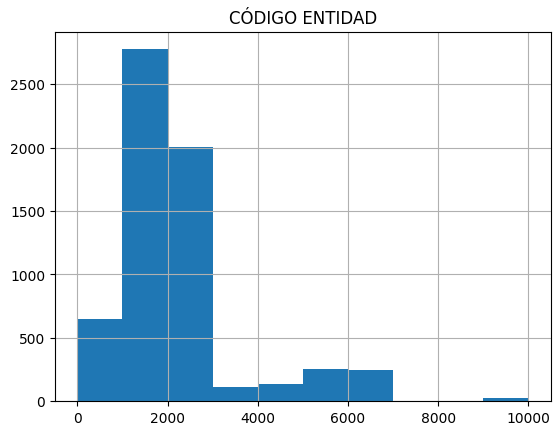

In [80]:
# Podemos realizar graficos como se comportan estos datos
Grafica =  cdf[['CÓDIGO ORDEN DE SERVICIO','DENOMINACIÓN DEL SERVICIO','CÓDIGO ENTIDAD']]
Grafica.hist()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

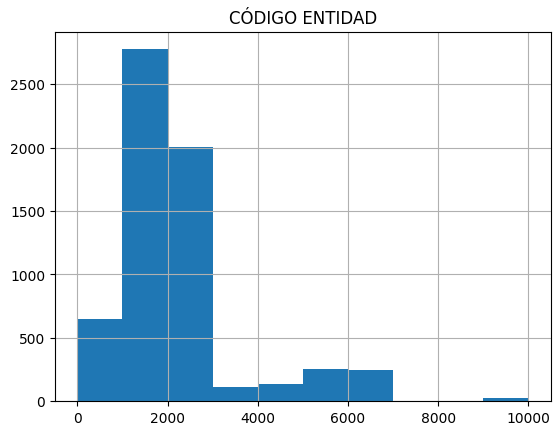

In [81]:
Grafica =  cdf[['CÓDIGO ORDEN DE SERVICIO','DENOMINACIÓN DEL SERVICIO','TIPO DE INTERVENCIÓN','CÓDIGO ENTIDAD', 'REGIÓN','PROVINCIA','DISTRITO','¿TIENE SITUACIONES DE INCUMPLIMIENTO?']]
Grafica.hist()
plt.show

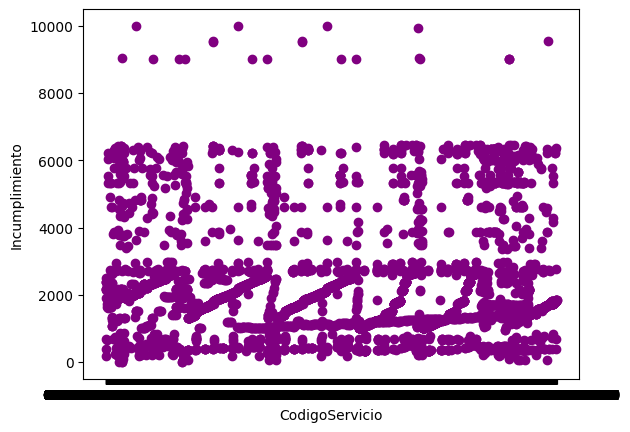

In [88]:
plt.scatter(cdf["CÓDIGO ORDEN DE SERVICIO" ], cdf["CÓDIGO ENTIDAD"], color ='purple')
plt.xlabel('CodigoServicio')
plt.ylabel('Incumplimiento')
plt.show() # para mostrar la gráfica

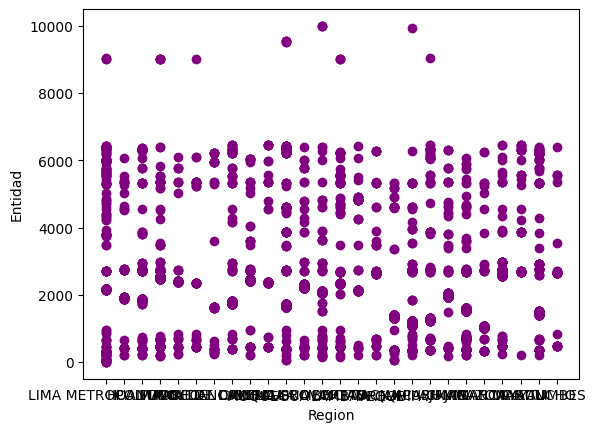

In [85]:
plt.scatter(cdf["REGIÓN"],cdf["CÓDIGO ENTIDAD"], color ='purple')
plt.xlabel('Region')
plt.ylabel('Entidad')
plt.show() # para mostrar la gráfica

ValueError: s must be a scalar, or float array-like with the same size as x and y

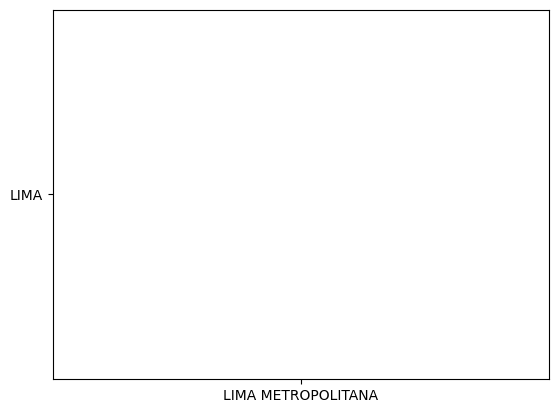

In [91]:
plt.scatter(cdf["REGIÓN"], cdf["PROVINCIA"],cdf['DISTRITO'], cdf["CÓDIGO ENTIDAD"], color ='blue')
plt.xlabel('Region', 'Provincia', 'Distrito')
plt.ylabel('Entidad')
plt.show() # para mostrar la gráfica

In [93]:
plt.scatter(cdf["REGIÓN"], cdf["PROVINCIA"], cdf['DISTRITO'], cdf["CÓDIGO ENTIDAD"], color='blue', s=50)  # Set marker size to 50


TypeError: scatter() got multiple values for argument 's'

In [94]:
# Assuming a column named 'TamanoMarcador' exists with size values
marker_sizes = cdf['TamanoMarcador']

plt.scatter(cdf["REGIÓN"], cdf["PROVINCIA"], cdf['DISTRITO'], cdf["CÓDIGO ENTIDAD"], color='blue', s=marker_sizes)


KeyError: 'TamanoMarcador'

In [95]:
import pandas as pd

pd.plotting.scatter_matrix(cdf[["REGIÓN", "PROVINCIA", "DISTRITO"]], alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.show()


ValueError: Number of columns must be a positive integer, not 0

<Figure size 1000x1000 with 0 Axes>

# 5. Visualización de datos:

In [ ]:
plt.bar(df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"], df["Cantidad"])
plt.xlabel("¿Tiene Situaciones de Incumplimiento?")
plt.ylabel("Cantidad")
plt.show()

plt.pie(df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"], labels=["Sí", "No"])
plt.title("Situaciones de Incumplimiento en las Intervenciones de Monitores Ciudadanos")
plt.show()


KeyError: 'Cantidad'

# 7. Entrenamiento del modelo:

In [100]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [101]:
X = df[["DENOMINACIÓN DEL SERVICIO", "TIPO DE INTERVENCIÓN", "REGIÓN", "PROVINCIA", "DISTRITO"]]
y = df["¿TIENE SITUACIONES DE INCUMPLIMIENTO?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [102]:
#Aquí hay un ejemplo de cómo puedes eliminar las filas que contienen valores no numéricos:
X_train = X_train.dropna(axis=0)


In [103]:
# Y un ejemplo de cómo puedes corregir el formato de los valores numéricos:
X_train["DENOMINACIÓN DEL SERVICIO"] = X_train["DENOMINACIÓN DEL SERVICIO"].str.replace(",", ".")


In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LANGUI'

# 9. Visualización de la frontera de decisión:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

plt.scatter(X_train, y_train, c=y_train)
plt.plot(X_train, model.coef_[0] * X_train + model.intercept_, color="red")
plt.xlabel("¿Tiene Situaciones de Incumplimiento?")
plt.ylabel("Cantidad")


ValueError: could not convert string to float: 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DEL LIBRO DE RECLAMACIONES EN LA MUNICIPALIDAD DISTRITAL DE PUCUSANA'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train[["DENOMINACIÓN DEL SERVICIO", "TIPO DE INTERVENCIÓN"]])
X_test_encoded = encoder.transform(X_test[["DENOMINACIÓN DEL SERVICIO", "TIPO DE INTERVENCIÓN"]])

# Update X_train and X_test with the encoded data
X_train = pd.concat([X_train.drop(["DENOMINACIÓN DEL SERVICIO", "TIPO DE INTERVENCIÓN"], axis=1), pd.DataFrame(X_train_encoded)], axis=1)
X_test = pd.concat([X_test.drop(["DENOMINACIÓN DEL SERVICIO", "TIPO DE INTERVENCIÓN"], axis=1), pd.DataFrame(X_test_encoded)], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found unknown categories ['PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE FERREÑAFE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PILCHACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL  GENERAL SANCHEZ CERRO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE SAN PABLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OCALLI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHUPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACOS VINCHOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DEL SANTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHOCOPE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MEGANTONI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE EL AGUSTINO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROGRAMA NACIONAL PARA LA EMPLEABILIDAD', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHONGOYAPE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE USHUA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE TAHUAMANU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YURUA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE NUEVE DE JULIO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YANAC-CORONGO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE TANTARANCHE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA TRANSITABILIDAD PEATONAL Y VEHICULAR DE LA VIA QUE UNE A LOS PUEBLOS JUAN PABLO II, PATASAGUA ALTO, SAN JOSE, SANTA RITA Y SANTA TERESA CENTRO POBLADO D', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TUCUME', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE EL ALGARROBAL', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHUNGUI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHINGAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TINGO-LUYA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA BARBARA DE CARHUACAYAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ÑAHUIMPUQUIO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ANANEA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AUCARA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAMPA HERMOSA-SATIPO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MOLINOS-JAUJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACO-CONCEPCION', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE AYABACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN SALVADOR DE QUIJE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE EL INGENIO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TONGOD', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUARMACA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA LEONOR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN MARTIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ANGASMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUALMAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUASTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PALCA-TARMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PANGOA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CUTURAPI', '¿DISTRIBUCIÓN Y RECEPCIÓN DE ALIMENTOS DELPROGRAMA NACIONAL DE ALIMENTACIÓN ESCOLAR ¿ QALI WARMA POR PARTE DE LA MUNICIPALIDAD PROVINCIAL DE AMBO PARA LA POBLACIÓN VULNERABLE, EN EL MARCO DEL DECRETO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHOJATA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CORIS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PARIACOTO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COLQUEMARCA', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE LOS SERVICIOS EDUCATIVOS EN LA I.E.I. N 421 DE LA ASOC. PROVIVIENDA VILLA SEÑOR DE TORRECHAYOC DEL DISTRITO Y PROVINCIA DE TAMBOPATA-REGION DE MADRE DE DIOS ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE MAYNAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CALAMARCA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN ANTONIO-PUNO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAYO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE PITIPO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUARIACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA REGIONAL DE SERVICIO PÚBLICO DE ELECTRICIDAD DEL ORIENTE S.A. ELECTRO ORIENTE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE SIHUAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CELENDIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE IPARIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL-MARISCAL NIETO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TRES UNIDOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN BORJA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL GOBIERNO REGIONAL HUANCAVELICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE QUEQUEÑA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ALTO NANAY', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COLQUIOC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COCHAS-YAUYOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN ANTONIO DE ANTAPARCO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL EN LA ASOCIACION SANTA ROSA APV EDGAR GONZALES MEDINA ASOCIACION DE VIVIENDA PACHACUTEC APV ANDRES BELAUN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PUINAHUA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ORCOPAMPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PACCHA-YAULI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COCAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE FLORENCIA DE MORA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TABACONAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE SATIPO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE POCOLLAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CUPISNIQUE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DEL ORO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CACERES DEL PERU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JAVIER DE ALPABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN BERNARDINO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE JUNÍN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE QUINJALCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHONTALI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SUBTANJALLA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COAYLLO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MOLLEPATA-SANTIAGO DE CHUCO', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CREACION DEL SERVICIO DE CAMINO VECINAL RED VIAL VELACUNCA KM 0 000 CHALLUTA KM 5 347 EN LA COMUNIDAD DE CCAHUAYA ALTA Y RED VIAL OQUEBAMBA KM 0 000 CHALLUT', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TRES DE DICIEMBRE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PATAZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SALITRAL-MORROPON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MONTEVIDEO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUARICOLCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ITUATA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CORONGO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACOPAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PIAS', 'ESTADO DE AVANCE DE LA OBRA: CREACIÓN DE SERVICIOS TECNOLÓGICOS EN LA CADENA PRODUCTIVA DEL SECTOR CUERO Y CALZADO ANEXO DE SAN ROQUE DE MALAYO DEL DISTRITO DE SAÑO - PROVINCIA DE HUANCAYO - DEPARTAME', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TOTORA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACUCHA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DE LA CAPACID', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUILLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LLAPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MEGANTONI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL MICAELA BASTIDAS DE APURÍMAC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHACAYAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LA UNION-TARMA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LLACLLIN', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CONAYCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARGOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MACHUPICCHU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL AGRARIA LA MOLINA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE TALARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAMARINDO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE UCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TUNAN MARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COLONIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN FRANCISCO DE SANGAYAICO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUEROCOTO-CHOTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARGOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-GRAU', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YANACANCHA-CHUPACA', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL SOBRE EL RÍO VELILLE - SECTOR PUNCO, COMUNIDAD CAMPESINA ALCCAVICTORIA DEL DISTRITO DE VELILLE - PROVINCIA DE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE SAN ROMÁN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VISTA ALEGRE-NAZCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHOCOS-YAUYOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DEL GOBIERNO REGIONAL ANCASH', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YANQUE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAÑO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AURAHUA', 'EJECUCIÓN DE LA OBRA: "CREACIÓN DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL EN LA CALLE, JIRONES Y PASAJES INTERNAS DEL AA. HH. COLLIQUE V ZONA, ZONAL 12 - DISTRITO DE COMAS - PROVINCIA DE LIMA - REGIÓN LIMA - SEGUNDA ETAPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE CARAVELI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ROCCHACC', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE AUCARA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE-LAMBAYEQUE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAUCARTAMBO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CAÑARIS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CACHACHI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CUTURAPI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MICAELA BASTIDAS', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANISTABILIDAD PEATONAL DEL BARRIO ANDRES AVELINO CACERES DE LA CIUDAD DE PUNO, DISTRITO DE PUNO - PROVINCIA DE PUNO - DEPARTAMENTO DE PUNO ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE HUANCAYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CAJABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCAPON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YANATILE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE SALUD DEL P.S MAVILA DEL C.P MAVILA DEL DISTRITO DE LAS PIEDRAS - PROVINCIA DE TAMBOPATA - DEPARTAMENTO DE MADRE DE DIOS ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OLLARAYA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE UTCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANDABAMBA-ACOBAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ROSASPATA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ALCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PISAC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LLAMA-MARISCAL LUZURIAGA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE TALARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE SEDACHIMBOTE S.A.', 'EJECUCIÓN DE LA OBRA: \x93CREACIÓN DEL PARQUE FLORESTA - EN EL AAHH FLORESTA, ZONA PANAMERICANA SUR DEL DISTRITO DE SAN JUAN DE MIRAFLORES - PROVINCIA DE LIMA - DEPARTAMENTO DE LIMA\x94', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUASO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA CAJA DE PENSIONES MILITAR POLICIAL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARACOTO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE PALLASCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLACAYAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUISHUAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PACHANGARA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SANEAMIENTO BASICO INTEGRAL DEL SECTOR DE KUQUIMOCCO - CUENCA DE CHAUPIMAYO - DISTRITO DE SANTA TERESA, LA CONVENCION, CUSCO ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SORITOR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE POZUZO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAISA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MIRAFLORES-AREQUIPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PAUCARA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PARATIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAUCARBAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE QUERO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHETO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ALTO BIAVO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA EULALIA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE PAUCAR DEL SARA SARA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE UCHUMAYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAYUCACHI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SANTA RITA DE SIGUAS', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DE LOS SERVICIOS DE AGUA POTABLE Y DISPOSICION SANITARIA DE EXCRETAS EN LOS SECTORES DE PAUCARPATA, MISQUIUNO, PUMA PUNCO Y SINAY SERMONA DEL DIS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE OROPESA-ANTABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHONGOS BAJO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUECHUALLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MORALES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TARAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE RIOJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE JARPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA EMPRESA REGIONAL DE SERVICIO PÚBLICO DE ELECTRICIDAD - ELECTROPUNO S.A.A.', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE BELLAVISTA-CALLAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE BELLAVISTA-SULLANA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CAHUACHO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-LA MAR', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SURCUBAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE UCHIZA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CALLANMARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PUNTA NEGRA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAYRAPATA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PERENE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE HUANCAYRE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE SALINAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TUNAN MARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL DANIEL ALCIDES CARRIÓN - PASCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YAUYOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SALITRAL-MORROPON', 'EJECUCIÓN DE LA OBRA: \x93CONSTRUCCIÓN DE CERCO PERIMÉTRICO; EN EL (LA) IE 5049 EMMA DETTMANN DE GUTIERREZ EN LA LOCALIDAD CALLAO, DISTRITO DE CALLAO, PROVINCIA DE CALLAO\x94', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA GERENCIA REGIONAL DE SALUD LORETO', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE LA TROCHA CARROZABLE DE INTERCONEXION: TRAMO 01 (SECTOR ACHANCCAYRA COMUNIDAD MICAELA BASTIDAS - ANEXO DE SAN JUAN DE LA COMUNIDAD DE CRUZPATA), TRAMO 02 (ANEX', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE TROCHA CARROZABLE DEL SECTOR CCOCHAPATA HASTA EL SECTOR QUEBRADA ESTANCUCHAYOQ DE LA COMUNIDAD CAMPESINA DE PILLAO MATAO DEL DISTRITO DE SAN JERONIMO - PROVINC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE BELLAVISTA-JAEN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PUEBLO NUEVO-ICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA SOCIEDAD DE BENEFICENCIA PÚBLICA DE HUACHO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE VICCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CATACHE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE OCUMAL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE INGUILPATA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LA ENCAÑADA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OCOYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE BERNAL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VILQUE CHICO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE LAURICOCHA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN JERÓNIMO - CUSCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TICAPAMPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAMANCACA CHICO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ECHARATI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TICAPAMPA', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE LOCAL DE USOS MULTIPLES PARA LOS SERVICIOS DE LA GERENCIA DE DESARROLLO ECONOMICO EN LA MZ C LOTE 1 - SECTOR INDUSTRIAL LOS PINOS EN EL DISTRITO DE CHIMBOTE -', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MASMA CHICCHE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHADIN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE AMBO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CONCHAMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN ANTONIO-PUNO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE NANCHOC', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CURASCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE FRIAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUICHUAS - TAYACAJA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PACHACUTEC', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SISTEMA DE SANEAMIENTO BASICO INTEGRAL EN LA COMUNIDAD DE APUTINYA, ZONAL DE ECHARATE, DEL DISTRITO DE ECHARATE - PROVINCIA DE LA CONVENCION', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL PARQUE RECREATVIO EN EL ASENTAMIENTO HUMANO TUPAC AMARU II DEL DISTRITO DE SAMUEL PASTOR - PROVINCIA DE CAMANA - DEPARTAMENTO DE AREQUIPA ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PITIPO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLATI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PINRA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE TRANSITABILIDAD DE LA CARRETERA VECINAL MO-557 EMP CARRETERA DEPARTAMENTAL MO - 102 (TRAMO: CALACOA - PUTINA - C.P. SAN CRISTOBAL) CALACOA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OMIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHALCOS', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE LA LOSA DEPORTIVA, EN LA URB. DOLORESPATA, DISTRITO DE SANTIAGO - PROVINCIA DE CUSCO - DEPARTAMENTO DE CUSCO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAGUNAS-ALTO AMAZONAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TILALI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE EL CARMEN-CHURCAMPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-GRAU', 'ESTADO DE AVANCE DE LA OBRA: OBRA N° 03 PONTON LOSA, RIO GRANDE, PALPA, VISCAS, PONTON LOSA, PONTON MARCO (06 PUENTES) ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL AGRARIA DE LA SELVA - TINGO MARÍA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLAY GRANDE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAS AMAZONAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACHAMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COROSHA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MIRACOSTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE RONDOCAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA CORTE SUPERIOR DE JUSTICIA DE HUANUCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE SANTA CRUZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CONGAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHAMBARA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PULLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUINUABAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE LA MAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ARENAL', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE NUEVO OCCORO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JUSTO APU SAHUARAURA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA MARIA DEL MAR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACORIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACAÑA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACULLANI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DEL CALLAO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ANDAHUAYLILLAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LLAUTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CAYLLOMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAC-HUAS', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL SERVICIO DE AGUA DEL SISTEMA DE RIEGO TECNIFICADO EN LA COMUNIDAD DE AHUAYRO DEL DISTRITO DE HUACCANA - PROVINCIA DE CHINCHEROS - DEPARTAMENTO DE APURIMAC ', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL SERVICIO DE SANEAMIENTO BASICO INTEGRAL EN LA COMUNIDAD CAMPESINA DE CARPAPAMPA DEL DISTRITO DE PAUCARTAMBO - PROVINCIA DE PAUCARTAMBO - DEPARTAMENTO DE CUSCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE AMBAR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA ANA DE HUAYCAHUACHO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COLQUEMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CASITAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAUCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE OYOTUN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SALAS-ICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROGRAMA REGIONAL DE IRRIGACIÓN Y DESARROLLO RURAL INTEGRADO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAPALLANGA', '28527049', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YANACANCHA-CHUPACA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL FONDO DE ASEGURAMIENTO EN SALUD DE LA POLICIA NACIONAL DEL PERÚ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CANIS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AMARILIS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PADRE MARQUEZ', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE TARUCANI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE APARICIO POMARES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE APATA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE IZCUCHACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AGALLPAMPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACHOCOLPA-HUANCAVELICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE LAMPA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE SALUD EN EL C.S. LOCUMBA DE LA MICRORED JORGE BASADRE, DISTRITO DE LOCUMBA, PROVINCIA DE JORGE BASADRE - TACNA ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL CONSTITUCIÓN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JOSE SABOGAL', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA CORTE SUPERIOR DE JUSTICIA DE UCAYALI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CALLANMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE IPARIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CCORCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAUCEPAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SABAINO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE QUILLO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE IGUAIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANGALLAYA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTO DOMINGO DE LA CAPILLA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA SALDO DE OBRA: "CONSTRUCCION Y EQUIPAMIENTO DEL HOSPITAL SANTA MARIA NIVEL II-1, PROVINCIA DE CUTERVO, DEPARTAMENTO DE CAJAMARCA" ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PARATIA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COCHAS-OCROS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ILABAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JUAN GUERRA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YONAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LOBITOS', 'MEJORAMIENTO DEL SERVICIO DE PRÁCTICA DEPORTIVA Y RECREATIVA MEDIANTE LA CONSTRUCCIÓN DE CANCHA SINTÉTICA EN LA COMUNIDAD CAMPESINA DE HUATTA DEL DISTRITO DE TARAY - PROVINCIA DE CALCA - DEPARTAMENTO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE PROVISION DE AGUA DE LA IRRIGACION QUISHUARANI EN LA COMUNIDAD DE ANANSAYA DEL DISTRITO DE CHECCA - PROVINCIA DE CANAS - DEPARTAMENTO DE CUSCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SICCHEZ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ASQUIPATA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARISCAL GAMARRA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA CALIDAD AMBIENTAL Y PAISAJÍSTICO MEDIANTE LA PREVENCIÓN DE CONTAMINANTES EN ÁREAS PÚBLICAS DE LOS CENTROS POBLADOS DEL DISTRITO DE ECHARATE - PROVINCIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE URACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PALLASCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTO DOMINGO DE LOS OLLEROS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TISCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DEL GOBIERNO REGIONAL PUNO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARISCAL GAMARRA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE UCHUMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA CRUZ DE COCACHACRA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE NAZCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHINGAS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HABANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DEL LIBRO DE RECLAMACIONES EN LA MUNICIPALIDAD DISTRITAL DE SAN BARTOLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VALERA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TOTORA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-PALLASCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MITO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE RIO SANTIAGO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CAJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MI PERÚ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA DIRECCIÓN REGIONAL DE SALUD CAJAMARCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OLLEROS-CHACHAPOYAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHARCANA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAUCARPATA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE MIRAFLORES', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CARAMPOMA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-MELGAR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PACHITEA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHIRINOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JEQUETEPEQUE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE BUENOS AIRES-PICOTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SARAYACU', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL DEL JR. BOLIVAR DE LA LOCALIDAD DE CHALHUANCA, DISTRITO DE CHALHUANCA, PROVINCIA DE AYMARAES - APURIMAC ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COLPAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACOCRO', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL SERVICIO DE AGUA A NIVEL PARCELARIO CON SISTEMA DE RIEGO EN EL ANEXO DE PACCPAPATA DEL DISTRITO DE COLQUEPATA - PROVINCIA DE PAUCARTAMBO - DEPARTAMENTO DE CUS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TROMPETEROS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE AYAVI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTO TOMAS-LUYA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO-OCROS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE LOURDES', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUASMIN', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL COMPLEJO DEPORTIVO DEL DISTRITO DE CACHACHI - PROVINCIA DE CAJABAMBA - DEPARTAMENTO DE CAJAMARCA ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SHAPAJA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OROPESA-ANTABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ESTIQUE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHORAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE HUARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE APATA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EPS SEDA HUANUCO S.A.', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARCAPOMACOCHA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SISTEMA DE SEGURIDAD PATRIMONIAL E INTEGRIDAD FISICA EN LA CIUDAD UNIVERSITARIA DE LA UNIVERSIDAD NACIONAL DEL ALTIPLANO DISTRITO DE PUNO - PROVINCIA DE P', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YANAMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHACABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHANCAY BAÑOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MASISEA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE CUTERVO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COLTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAÑEC', 'EJECUCIÓN DE LA OBRA: \x93RENOVACIÓN DE VEREDA; EN EL(LA) JR. MARSELLA, JR. LOS NOGALES, JR. LAS ÑEJAS, JR. LOS CACTUS Y JR. LAS PALMERAS DE LA COOPERATIVA DE VIVIENDA DE LOS TRABAJADORES DE LA EMPRESA LADRILLERA MANUEL CORREA LTDA. 37, DISTRITO DE SANTA ANITA, PROVINCIA LIMA, DEPARTAMENTO LIMA\x94', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE IPARIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAMBURCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VIRACO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JULCAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAPAPLAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-RODRIGUEZ DE MENDOZA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CARMEN ALTO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANGARARA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHARCANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CAICAY', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE TRANSITABILIDAD VEHICULAR Y PEATONAL DE LAS CALLES Y PASAJES DE LA LOCALIDAD DE TAYA, DISTRITO DE LLUTA, PROVINCIA DE CAYLLOMA - AREQUIPA ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE YUNGAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DEL ORGANISMO SUPERVISOR DE LA INVERSIÓN EN ENERGÍA Y MINERÍA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SARTIMBAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LARIA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CONCHUCOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CONDORMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHOROS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE QUIACA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACOLLA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL INTERCULTURAL DE LA AMAZONIA ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARCONA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHANCAY-HUARAL', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE OLLACHEA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ALLAUCA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DE CAMINO VEC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MOROCOCHA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACHOMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE UTCUBAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CANAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JACAS CHICO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTILLANA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA DIETA ALIMENTARIA DE LA POBLACION RURAL CON LA PRODUCCION DE HORTALIZAS Y CRIANZA DE ANIMALES MENORES EN LA COMUNIDAD DE CHOCCOYO DEL DISTRITO DE CHALLH', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN BORJA', '"ESTADO DE AVANCE DE LA OBRA: CREACION , AMPLIACION Y MEJORAMIENTO DEL SERVICIO DE ALCANTARILLADO EN LOS CENTROS POBLADOS CHANGUILLO, SAN JAVIER, CHIQUERILLO, SAN JUAN, LA MERCED, LACRA, NUEVA ESPERAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MARIATANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LONGAR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CAÑARIS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LARAOS-YAUYOS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HUACHOCOLPA-HUANCAVELICA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLAY', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO Y AMPLIACION DEL SISTEMA DE AGUA POTABLE Y SANEAMIENTO RURAL, DE LOS CASERIOS DE 3 DE OCTUBRE, CHUPICA, LAGUNAS Y CRISTO REY DISTRITO DE CHUMUC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE NUEVA REQUENA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MATARA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TICACO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE PICHACANI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHORAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARISCAL CACERES-HUANCAVELICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE RAZURI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OLLACHEA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE VALERA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TINICACHI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SARHUA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAPACOCHA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YAVARI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PAMPACHIRI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ANDAMARCA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN SEBASTIÁN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHALCOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN GREGORIO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MADRIGAL', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LACABAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CULLHUAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YANACANCHA-CHUPACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE HUANCAYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE USICAYOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN LUIS-CAÑETE', 'ESTADO DE AVANCE DE LA OBRA: CREACIÓN DEL SISTEMA DE ALCANTARILLADO EN EL ANEXO EL MIRADOR DEL DISTRITO DE URACA - PROVINCIA DE CASTILLA - DEPARTAMENTO DE AREQUIPA ', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO SERVICIO DE PROMOCION EDUCATIVA EN LAS INSTITUCIONES DE EDUCACION BASICA REGULAR (EBR) 9 LOCALIDADES DEL DISTRITO DE LOCUMBA - PROVINCIA DE JORGE BASADRE - DE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHUGAY', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE BOLIVAR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ROCCHACC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COCHAMARCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SOPLIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COSME', 'ESTADO DE AVANCE DE LA OBRA: "MEJORAMIENTO DE LAS CAPACIDADES PRODUCTIVAS DE PECES AMAZONICOS EN LA CC.NN DE KOCHIRI DEL DISTRITO DE MEGANTONI, PROVINCIA DE LA CONVENCION, DEPARTAMENTO DE CUSCO" ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE HUALLAGA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE PUTUMAYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACOSTAMBO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA DE GENERACIÓN ELÉCTRICA DEL SUR S.A.', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ONGON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUIRUVILCA', 'ESTADO DE AVANCE DE LA OBRA: CONSTRUCCION DE CERCO PERIMETRICO Y PATIO DE MANIOBRAS; EN EL(LA) TERMINAL TERRESTRE DE LA LOCALIDAD DE SANTO TOMAS DISTRITO DE SANTO TOMAS, PROVINCIA CHUMBIVILCAS, DEPART', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTIAGO-ICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUIQUIJANA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CAYALTI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SANTA LEONOR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE LOPECANCHA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE AYABACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE FERREÑAFE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YAULI-YAULI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE ASUNCION', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MILPUC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN BUENAVENTURA-CANTA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE MAGDALENA-CAJAMARCA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE MASISEA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TARICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN BAUTISTA-MAYNAS-LORETO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHOCO-CASTILLA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD PEATONAL Y VEHICULAR DE LA AV. BRASIL EN EL A.H. ALTO SELVA ALEGRE ZONA B, DISTRITO DE ALTO SELVA ALEGRE - PROV', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHAVIÑA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LLAMA-CHOTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA MERCED-AIJA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DE LAGUNAS MOCUPE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-PALLASCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE APARICIO POMARES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MOLLEPAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CUYOCUYO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TARICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN-CAJAMARCA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CREACION DEL SERVICIO DE REGULACION HIDRICA EN LA QUEBRADA CHEQCHECCASA DE LA COMUNIDAD DE TRES ESTRELLAS MAHUAYPAMPA DEL DISTRITO DE PAUCARTAMBO - PROVINCI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PARARIN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CURIBAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE USQUIL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA PRIMAVERA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JAQUI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAMPA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA AMPLIACION Y MEJORAMIENTO DEL SANEAMIENTO BASICO INTEGRAL DEL SECTOR DE PIÑALPATA DEL DISTRITO DE MARANURA - PROVINCIA DE LA CONVENCION - DEPARTAMENTO DE CU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHOCHOPE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PACCHA-CHOTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DEL SANTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PALCAZU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COISHCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARCAVELICA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE PARCONA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAMANGUILLA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PITIPO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANTA-ACOBAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SIVIA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE YAUCA DEL ROSARIO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAMPAS GRANDE-HUARAZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA PERUANA DE SERVICIOS EDITORIALES S.A. - EDITORA PERÚ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAPAIRIHUA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN MARTIN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COCHABAMBA-HUACAYBAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PACARAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN MATEO-HUAROCHIRI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LIMBANI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAYLA-LA UNION', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAROCHIRI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHACOCHE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHIARA-HUAMANGA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE NUÑOA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE AMASHCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE HUAMALIES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PULLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SUITUCANCHA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CHINCHAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAÑAYCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE VILQUE CHICO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SHUNTE', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE YAULI-HUANCAVELICA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHIGUIRIP', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE IPARIA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CHUPURO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE AGUA PARA RIEGO TECNIFICADO EN EL SECTOR SAN ANTONIO DE CUTACARCAS TOMA ALTA, SECTOR CHILCA CAMSISH Y DEL SECTOR CENTRAL DE CUSPON, DE LOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHACCHO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PIMPINGOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARABAYLLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TINTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN NICOLAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE LOS MOLINOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SORAYA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DE LOS SERVICIOS DE LA DIRECCION SUB REGIONAL DE SALUD CUTERVO - DISA, DEL DISTRITO DE CUTERVO - PROVINCIA DE CUTERVO - DEPARTAMENTO DE CAJAMARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LALAQUIZ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHUCUITO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PUYUSCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VILAVILA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE PUTINA PUNCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ALFONSO UGARTE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE LA UNION', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CREACION DE LA LINEA DE CONDUCCION DE AGUA POTABLE EN EL SECTOR COJIBAYA DISTRITO DE TICACO - PROVINCIA DE TARATA - DEPARTAMENTO DE TACNA ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN RAMÓN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YAULI-JAUJA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JENARO HERRERA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ALTO TAPICHE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ALBERTO LEVEAU', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MATO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LLUTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANIPACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE REQUE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE NAPO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE EL ALTO-TALARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LONGUITA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TINGO-LUYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARABAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHUPAMARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROYECTO ESPECIAL JAÉN SAN IGNACIO BAGUA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUQUINA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HUANCAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE URPAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE CAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUEHUE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANGARARA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CONDORMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COLCA-VICTOR FAJARDO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHOCHOPE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SISTEMA DE SANEAMIENTO BASICO INTEGRAL EN EL ANEXO DE CURAHUATA DE LA COMUNIDAD CAMPESINA DE HANANSAYA LLIQUE CURAHUATA DISTRITO DE SANTO TOM', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMP REG DE SERV PUB DE ELECT DL NORTE SA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MORCOLLA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN FRANCISCO DE ASIS', 'VISITA A LA OBRA CREACIÓN DE LOS SERVICIOS RECREATIVOS Y DE ESPARCIMIENTO MULTIFUNCIONAL EN EL SECTOR ECHADERO DEL DISTRITO DE HUAYUCACHI - PROVINCIA DE HUANCAYO - DEPARTAMENTO DE JUNIN - ETAPA I MEJORAMIENTO PISCIN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAYAPULLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YUPAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHALLABAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE HUARMEY', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CREACION DEL CAMINO VECINAL ENTRE LOS CENTROS POBLADOS ISCUCHACA - NUEVO PORVENIR, DISTRITO DE MARISCAL BENAVIDES, PROVINCIA DE RODRIGUEZ DE MENDOZA - AMAZO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VIÑAC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE BELLAVISTA DE LA UNION', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PISCOYACU', 'ESTADO DE AVANCE DE LA OBRA: CREACION SERVICIOS DEL CENTRO REGIONAL DE RECURSOS EDUCATIVOS ESPECIALIZADO PARA LA EDUCACION BASICA REGULAR EN LA DIRECCION REGIONAL DE EDUCACION DEL GOBIERNO REGIONAL DE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUACULLANI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTO TOMAS-CUTERVO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JEQUETEPEQUE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAMPARA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CALETA DE CARQUIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CIELO PUNCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ULCUMAYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YACUS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUANCASPATA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CREACION DEL SERVICIO DE PRACTICA DEPORTIVA EN LA COMUNIDAD CCATACAMARA DEL DISTRITO DE URCOS - PROVINCIA DE QUISPICANCHI - DEPARTAMENTO DE CUSCO ', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LOS BAÑOS DEL INCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CONIMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CANTA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE CAPACIDADES DE LOS PRODUC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE OCROS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE LOS MOLINOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE ANTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VILCANCHOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LLOCLLAPAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAMBALPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PAMPAS GRANDE-HUARAZ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MATACOTO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MANZANARES', 'ESTADO DE AVANCE DE LA OBRA: CONSTRUCCION DE LA MARINA TURISTICA PARA EL ACCESO AL CIRCUITO TURISTICO NORTE DE IQUITOS, EN LA LOCALIDAD DE BELLAVISTA NANAY, DISTRITO DE PUNCHANA, PROVINCIA DE MAYNAS -', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CUCHUMBAYA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACCHA', 'ESTADO DE AVANCE DE LA OBRA: CONSTRUCCION DE CANAL; EN EL(LA) TRASVASE PATAPUJO DEL SISTEMA HIDRÁULICA MAYOR UCHUSUMA CAPLINA CLASE B, DISTRITO DE TARATA, PROVINCIA TARATA, DEPARTAMENTO TACNA ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LLACANORA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CUPI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CCORCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CONCEPCIÓN', 'ESTADO DE AVANCE DE LA OBRA: REMODELACION DE AULA DE EDUCACION PRIMARIA; EN EL(LA) IE 5003 - VIRGEN DE LA I. CONCEPCION - CALLAO EN LA LOCALIDAD CALLAO, DISTRITO DE CALLAO, PROVINCIA CALLAO, DEPARTAME', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUICACHA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE AYAVIRI', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DEL COMPLEJO RECREACIONAL BARRIO PIURA DEL DISTRITO DE CAJABAMBA - PROVINCIA DE CAJABAMBA - DEPARTAMENTO DE CAJAMARCA ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JERONIMO-LUYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ANDARAY', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PERENE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COCAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COCHAS-CONCEPCION', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PAJARILLO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUACCHIS', 'ESTADO DE AVANCE DE LA OBRA: AMPLIACION DE INFRAESTRUCTURA Y EQUIPAMIENTO DE LA I.E. N 32227 VIRGEN DE FÁTIMA EN LA LOCALIDAD DE HUALLANCA, DISTRITO DE HUALLANCA - BOLOGNESI - ANCASH ', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO EDUCATIVO EN LA I.E. N° 22489 DEL DISTRITO DE PARACAS - PROVINCIA DE PISCO - DEPARTAMENTO DE ICA ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE HUARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE IMPERIAL', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE PUTINA PUNCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE SERVICIO DE AGUA POTABLE Y ALCANTARILLADO CALCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE KISHUARA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL DE LA AV. ALFONSO UGARTE Y AV.SANTA FORTUNATA DEL CP SAN FRANCISCO Y CP SAN ANTONIO, DEL DISTRITO DE MOQU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PAITA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CAPACMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA CRUZ DE ANDAMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PILCHACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MACHAGUAY', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MOLLEPAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PACAYCASA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LA BANDA DE SHILCAYO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LLAUTA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE PILCOMAYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ALTO INAMBARI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TORAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE AGUA POTABLE Y ALCANTARILLADO YUNGUYO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE CACHORA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PABLO DE PILLAO', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE LA PLAZA MAYOR DEL CENTRO POBLADO DE PUENTE CENTRAL, DISTRITO DE COPORAQUE - ESPINAR - CUSCO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAYNACOTAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ISABEL DE SIGUAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SUCCHA', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE ESCENARIO DEPORTIVO CON GRASS SINTÉTICO EN LA COMUNIDAD CAMPESINA DE PITUCANCHA, DISTRITO DE CAICAY - PROVINCIA DE PAUCARTAMBO - DEPARTAMENTO DE CUSCO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUCACACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN BAUTISTA-HUAMANGA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SUMBILCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HEROES ALBARRACIN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COMBAPATA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LA PUNTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PARINARI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HUATA-PUNO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TINCO-CARHUAZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACAPAUSA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JACINTO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHUMPI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE SIGUAS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ISABEL DE SIGUAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OLLARAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ANTA-CARHUAZ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YAVARI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUICHES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHANCAY-SAN MARCOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ALTO INAMBARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARIAS', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL EN LA AV. LUIS VALLEJO SANTONI DEL SECTOR DE WIMPILLAY DEL DISTRITO DE SAN SEBASTIAN - PRO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CHILIQUIN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SALCAHUASI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CORANI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PARARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN SALVADOR', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUABAL', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE OLMOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL CENTRO NACIONAL DE ABASTECIMIENTO DE RECURSOS ESTRATÉGICOS EN SALUD - CENARES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE INCHUPALLA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE LIMPIEZA PUBLICA EN LOS PROCESOS DE SEGREGACION Y VALORIZACION EN LA GESTION DE RESIDUOS SOLIDOS MUNICIPALES EN EL DISTRITO DE SAN SEBASTIAN,', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACHIZA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE IRAY', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CALLAYUC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHAVIN DE HUANTAR-HUARI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACZO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE EL DORADO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMP.MUNICIPAL DE SANEAMIENTO BASICO PUNO S A', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CIELO PUNCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE GRANADA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-MELGAR', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COLQUIOC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SIBAYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MAÑAZO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LA FLORIDA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE UTICYACU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARMOT', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MAZAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE GRAU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ROSASPATA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE TRANSITABILIDAD VEHICULAR Y PEATONAL DE BELLAVISTA ALTA EN LA CIUDAD DE ABANCAY, DISTRITO DE ABANCAY - PROVINCIA DE ABANCAY - DEPARTAMENTO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ATAURA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LONGOTEA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PISCOYACU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TANTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN RAFAEL-BELLAVISTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA DIRECCION REGIONAL DE TRANSPORTES Y COMUNICACIONES DE UCAYALI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL JORGE BASADRE GROHMANN - TACNA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE MACHUPICCHU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PADRE MARQUEZ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHILETE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAUCE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE RONTOY', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAMEGUA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PICHIGUA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PILLPINTO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COTAPARACO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PICHANAQUI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ARMA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TAUCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAROCHIRI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUEPETUHE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VILCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUANCARAMA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LAS AMAZONAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE ISCOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHURUJA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TISCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TOTORA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA E.P.S. SEDAJULIACA S.A.', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHANGUILLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SHATOJA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE OLLANTAYTAMBO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SERVICIO EDUCATIVO DEL NIVEL PRIMARIA Y SECUNDARIA DE LA I.E. N° 52093 JESUS DIVINO MAESTRO DEL CENTRO POBLADO DE LA NOVIA DEL DISTRITO DE TA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTILLANA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE EL MILAGRO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS NIVELES DE PRODUCTIVIDAD FRUTICOLA EN LAS LOCALIDADES DE CARUMAS, CAMBRUNE, SOMOA, SAYLAPA, SOLAJO Y ATASPAYA, EN EL DISTRITO DE CARUMAS, PROVINCIA MAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COCHAS-CONCEPCION', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE ZARUMILLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUINCHES', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CONCHAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ATAQUERO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHICCHE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JULCAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUASICANCHA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE FLORIDA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA ELABORACIÓN DE EXPEDIENTE TÉCNICO Y EJECUCIÓN DE OBRA: INTERVENCIÓN EN RECONSTRUCCIÓN MEDIANTE INVERSIONES, IRI - EN LA IE MARÍA CESPEDES SIGNOL DEL C.P. LA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN ANTON-AZANGARO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DEL SEDALIB S.A.', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAC-HUAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA CRUZ DE FLORES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN RAMÓN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANTIOQUIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PALCA-HUANCAVELICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ICHUPAMPA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS EDUCATIVOS DE LA I.E.I N° 1237 EN LA LOCALIDAD LOS ANGELES DEL DISTRITO DE LA COIPA - PROVINCIA DE SAN IGNACIO - DEPARTAMENTO DE CAJAMARCA ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TICRAPO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ANDAHUAYLILLAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CANCHAQUE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE TUCUMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YAMBRASBAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PITUMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUANUHUANU', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE QUILCAS-HUANCAYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE EL ESLABON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE BOLIVAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ANDOAS', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA TRANSITABILIDAD VEHICULAR Y PEATONAL EN LA AV. SAN FELIPE DEL DISTRITO DE SICUANI - PROVINCIA DE CANCHIS - DEPARTAMENTO DE CUSCO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VILLA RICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YONAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COPORAQUE-CAYLLOMA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SERVICIO DE EDUCACIÓN SECUNDARIA DE LA I.E SAN SEBASTIÁN DE LLANGUAT DEL DISTRITO DE CELENDIN - PROVINCIA DE CELENDIN - DEPARTAMENTO DE CAJAM', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHILCAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE ISCOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHECRAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUANCANO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS TURISTICOS EN LA CATARATA DE ILLAPANI DEL DISTRITO DE ECHARATE - PROVINCIA DE LA CONVENCION - DEPARTAMENTO DE CUSCO ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CAÑETE', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DEL SERVICIO RECREACIONAL BAÑOS TERMALES DE YAURISQUE DISTRITO DE YAURISQUE - PROVINCIA DE PARURO - DEPARTAMENTO DE CUSCO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA JOYA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA DIRECCIÓN REGIONAL DE SALUD ICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ASUNCION-CHACHAPOYAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LAYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LLALLI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CUCHUMBAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE INAHUAYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE SERVICIO DE AGUA POTABLE Y ALCANTARILLADO DE SALAS S.R.L', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE SERVICIOS DE AGUA POTABLE Y ALCANTARILLADO YAULI - LA OROYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PEBAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CORONGO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ALONSO DE ALVARADO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE OXAPAMPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YAUYUCAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAMANCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE TUMBES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CABANACONDE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YANAMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OLLANTAYTAMBO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN GABAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUALGAYOC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE EL CARMEN-CHINCHA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL-MARISCAL NIETO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE UBINAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MADEAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YAUYA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CUENCA-HUANCAVELICA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUERTAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MIRAFLORES-AREQUIPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA DE ALTO YANAJANCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACACHI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SALCABAMBA', 'ESTADO DE AVANCE DE LA OBRA: RECUPERACION DE LA HUACA TAKAYNAMO DEL COMPLEJO ARQUEOLOGICO CHAN CHAN DISTRITO DE LA ESPERANZA, PROVINCIA DE TRUJILLO, LA LIBERTAD ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAYLLA-CUSCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHUMPI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHONTALI', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DEL SERVICIO INTEGRADO DEL LOCAL DE USOS MULTIPLES EN EL CENTRO POBLADO DE QUILLAZU (PROGRESO) DEL DISTRITO DE OXAPAMPA - PROVINCIA DE OXAPAMPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE GORGOR', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE PACHITEA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PAIMAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PACHAS', 'ESTADO DE AVANCE DE LA OBRA: REFORESTACION DE AREA VERDE; EN EL(LA) VÍAS PRINCIPALES Y VÍAS LOCALES DEL CENTRO HISTÓRICO DE LIMA, DISTRITO DE LIMA, PROVINCIA LIMA, DEPARTAMENTO LIMA ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SONCHE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUINCHES', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ANDAMARCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAPICHE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL INSTITUTO NACIONAL DE SALUD MENTAL HONORIO DELGADO-HIDEYO NOGUCHI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LARAMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HAQUIRA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TAMBURCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE ANTONIO RAIMONDI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN RAMÓN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HONORIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE ATALAYA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE GREGORIO PITA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SACSAMARCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE TUCUMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COLCABAMBA-AYMARAES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VILLA EL SALVADOR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CHOTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAMAY', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA DE OCOPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE CAO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MOLINO-PACHITEA', '"ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS EN APOYO A LA CADENA PRODUCTIVA DE LA FIBRA DE ALPACA, EN LAS PROVINCIAS DE AREQUIPA, CASTILLA, CONDESUYOS Y LA UNION, REGION AREQUIPA" ', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO VIAL URBANO EN LA AVENIDA SIDERAL DEL CENTRO POBLADO DE SALCEDO, DISTRITO DE PUNO - PROVINCIA DE PUNO - DEPARTAMENTO DE PUNO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PARAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CIRCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ARAMANGO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DE SERVICIO DE EDUCACIÓN INICIAL DE LA I.E.I N° 38392 DE PICHARI BAJA DEL DISTRITO DE PICHARI - PROVINCIA DE LA CONVENCION - DEPARTAMENTO DE CUSC', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE OYON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAMBILLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHIARA-HUAMANGA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHICAMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE LUCANAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PERUPETRO S.A.', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DEL LIBRO DE RECLAMACIONES EN LA MUNICIPALIDAD DISTRITAL DE VENTANILLA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LUCRE-QUISPICANCHI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COLASAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARAMPOMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUALLANCA-HUAYLAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JAYANCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE UMARI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANTAUTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JACOBO HUNTER', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JESUS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE AMOTAPE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CORONEL GREGORIO ALBARRACIN LANCHIPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MARGOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL HERMILIO VALDIZÁN - HUÁNUCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHINCHAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TAPICHE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUNTA NEGRA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ATAVILLOS ALTO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACORA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE CHACÑA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA ESPERANZA-SANTA CRUZ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AMOTAPE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAMANGUILLA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACIÓN DE LOS SERVICIOS DE AGUA PARA RIEGO EN LAS COMUNIDADES DE ACCHA BAJA, YANAHUAYLLA, PARCO, MITMAC, LOS INCAS, LLICLLEC EN EL DISTRITO Y, PROVINCIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA EULALIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CANAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE CASTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SINGA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE LA VIRGEN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE GORGOR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL DE TRUJILLO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAMPAROMAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TINGO DE SAPOSOA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUANCAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAMANTANGA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COROSHA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE DOS DE MAYO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DE LOS SERVICIOS DE SALUD DEL ESTABLECIMIENTO DE SALUD CALACOA, DISTRITO DE SAN CRISTOBAL - PROVINCIA DE MARISCAL NIETO - DEPARTAMENTO DE MOQUEGU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARIANO NICOLAS VALCARCEL', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SITACOCHA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PACCARITAMBO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CONAYCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LIMATAMBO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE CHOCORVOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PROGRESO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAÑAYCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CORDOVA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MAGDALENA DEL MAR', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAMANCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE KUNTURKANKI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLAHUARA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL SAN LUIS GONZAGA DE ICA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CAMANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANUHUANU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE MOHO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MAQUIA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLABAMBA-URUBAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE FERNANDO LORES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTO TOMAS-LUYA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PAUCAR DEL SARA SARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE POMACANCHA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PALCAMAYO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE PILLAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUANCA-HUANCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LUCMA-MARISCAL LUZURIAGA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE HUARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHECACUPE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE FORMACION PROFESIONAL EN LA ESCUELA PROFESIONAL DE ARTE DE LA UNIVERSIDAD NACIONAL DEL ALTIPLANO - DEPARTAMENTO DE PUNO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OCUCAJE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHECRAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PISUQUIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANAPIA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHISQUILLA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROGRAMA NACIONAL DE TELECOMUNICACIONES - PRONATEL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE HUAMANGA', 'ESTADO DE AVANCE DE LA OBRA: CREACION Y MEJORAMIENTO DE LOS SERVICIOS ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACRAQUIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARAYBAMBA', '\x93CREACIÓN DEL SERVICIO DEPORTIVO DEL COMPLEJO LOS CEDROS UBICADO EN EL A.H. LOS CEDROS DE LA ZONA NORTE DEL DISTRITO DE VENTANILLA - PROVINCIA DE CALLAO - DEPARTAMENTO DE CALLAO\x94', 'ESTADO DE AVANCE DE LA OBRA: REHABILITACION DEL COLECTOR PRINCIPAL DE ALCANTARILLADO DE LA CALLE BOLIVAR, DISTRITO DE TUMBES, PROVINCIA DE TUMBES, DEPARTAMENTO DE TUMBES ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE NINABAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE APONGO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ALTO PICHIGUA', 'EJECUCIÓN DE LA OBRA: RENOVACIÓN DE PISTA Y VEREDA; EN EL(LAS) VÍAS DELIMITADAS POR LOS CUADRANTES JR. VILLA MERCEDES, JR. 18 DE ENERO, JR. JUAN PAZOS Y PJ. ÁNGEL MORALES EN LA URBANIZACIÓN VILLA MERCEDES DISTRITO DE SANTIAGO DE SURCO, PROVINCIA LIMA, DEPARTAMENTO LIMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACCHIS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ICHUÑA', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE LA PLAZA PRINCIPAL DEL CENTRO POBLADO HUARAHUARANI DEL DISTRITO DE ILAVE - PROVINCIA DE EL COLLAO - DEPARTAMENTO DE PUNO ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE DEAN VALDIVIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUILCA-CAMANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHACCHO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MACARI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LUCMA-GRAN CHIMU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHACA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TINCO-CARHUAZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OCUMAL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VILCABAMBA-DANIEL ALCIDES CARRION', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OCAÑA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PEDRO VILCA APAZA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUICHUAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE JULCAN', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SERVICIO DE RECREACION Y DEPORTE DEL COMPLEJO DEPORTIVO LA PAMPILLA EN EL CENTRO POBLADO LA PAMPILLA DEL DISTRITO DE PUNTA DE BOMBON - PROVIN', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE ACORIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LOS AQUIJES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA CAJA MUNICIPAL DE AHORRO Y CREDITO DE PAITA S.A.', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUILMANA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACOSTAMBO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUACAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL DE LA AMAZONIA PERUANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCARANI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHINCHAYPUJIO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE QUINUABAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANDABAMBA-SANTA CRUZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL-PICOTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACOBAMBA-SIHUAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TUPAC AMARU', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CAPELO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE OYON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SUSAPAYA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LA MERCED-AIJA', '"ESTADO DE AVANCE DE LA OBRA: EJECUCION DE SALDO DE OBRA PARA EL MEJORAMIENTO DE LA CARRETERA VISCACHANI,CALLALLI SIBAYO CAYLLOMA,PROVINCIA DE CAYLLOMA,REGION AREQUIPA II ETAPA,TRAMO 01: KM 0,000 ,KM', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE VIRUNDO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ILLIMO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JULCAMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA ANITA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACOCHACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SUCRE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUANCARAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUCARA-JAEN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA PRESTADORA DE SERVICIOS DE SANEAMIENTO AGUAS DE LIMA NORTE S.A.-EPS AGUAS DE LIMA ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LABERINTO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL JOSÉ MARÍA ARGUEDAS ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CODO DEL POZUZO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CASPISAPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MASIN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PAMPAMARCA-CANAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL INSTITUTO NACIONAL DE ESTADISTICA E INFORMATICA - INEI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE BARRANQUITA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN ANTONIO-SAN MARTIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHONGOYAPE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ATICO', 'ESTADO DE AVANCE DE LA OBRA: SALDO DE OBRA: MEJORAMIENTO DE LOS SERVICIOS ADMINISTRATIVOS DE LA UNIVERSIDAD NACIONAL DE BARRANCA EN LA URBANIZACIÓN LA FLORIDA, DISTRITO DE BARRANCA, PROVINCIA DE BARRA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OCOBAMBA-CHINCHEROS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CATAC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACHOCOLPA-TAYACAJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MATAPALO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE POMAHUACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE HUANCAVELICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MANGAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MASIN', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA INSTALACIÓN DE LA SUBESTACIÓN ELÉCTRICA SAN LUIS 33/10 KV, DISTRITO DE ALTO SELVA ALEGRE, PROVINCIA REGIÓN DE AREQUIPA ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE MARISCAL LUZURIAGA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE INCLAN', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE TORATA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAYLAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ATAURA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAYANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACOBAMBA-TARMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MOLLEBAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE IMAZA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CONSTRUCCION DE LA TROCHA CARROZABLE ENTRE EL ANEXO DE TIZABAMBA -C.C. PANTIPATA HACIA EL ANEXO AMANTUY - C.C PARCCOTICA , DISTRITO DE CHINCHAYPUJIO-ANTA -C', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TUPAC AMARU', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUIMBAYOC', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YANAS-DOS DE MAYO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL HOSPITAL DE EMERGENCIAS PEDIÁTRICAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ARAPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CAHUAPANAS-DATEM MARAÑON', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ALTO BIAVO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACO-CONCEPCION', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CARHUANCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TAPUC', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CUJILLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SHAPAJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DEL RIMAC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CALLAHUANCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUNTA DE BOMBON', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE AYMARAES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE SAN ANTONIO DE PUTINA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL-MARISCAL NIETO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTA LUCIA-LAMPA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA PRESTACION DE SERVICIOS DE LA PLAZA BOLOGNESI DE LA CIUDAD DE PUERTO MALDONADO, PROVINCIA DE TAMBOPATA - MADRE DE DIOS ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OCOYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TOMAY KICHWA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE TAMBILLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACOPIA - ACOMAYO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LLOCHEGUA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE GORGOR', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACIÓN DE LOS SERVICIOS EDUCATIVOS DE LA ESCUELA ACADÉMICO PROFESIONAL DE INGENIERÍA CIVIL DE LA FACULTAD DE INGENIERÍA DE LA UNIVERSIDAD NACIONAL DE C', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA TRANSITABILIDAD VEHICULAR Y PEATONAL EN EL PUENTE RAMIRO PRIALE, CRUCE AUTOPISTA RAMIRO PRIALE CON EL RIO HUAYCOLORO DEL DISTRITO DE LURIGANCHO - PROVIN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MIRGAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL SANTIAGO ANTÚNEZ DE MAYOLO - ANCASH', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE UNICACHI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHUPAMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAMPAS-PALLASCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MONSEFU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA UNION-TARMA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE BALSAPUERTO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANTONIO RAYMONDI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN DAMIAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROGRAMA NACIONAL DE ASISTENCIA SOLIDARIA PENSIÓN 65', 'ESTADO DE AVANCE DE LA OBRA: REHABILITACION DE PUENTE SAN JUAN DE LA VIRGEN Y ACCESOS (REHABILITACION DE PUENTES PAQUETE 10 - PIURA 3 - TUMBES) ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SORAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE POCSI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MACHAGUAY', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHOJATA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROGRAMA NACIONAL DE CENTROS JUVENILES-  PRONACEJ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACORA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TINTAY-AYMARAES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANAGORAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PINTO RECODO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE SIGUAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL SERVICIOS INDUSTRIALES DE LA MARINA IQUITOS S.R.LTDA. SIMA IQUITOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA DIRECCIÓN REGIONAL DE SALUD PASCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TINTAY PUNCU-TAYACAJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN-CASTROVIRREYNA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HERMILIO VALDIZÁN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA CENTRAL DE COMPRAS PÚBLICAS - PERÚ COMPRAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL FUERO MILITAR POLICIAL - EX CONSEJO SUPREMO DE JUSTICIA MILITAR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MAMARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TABACONAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUILCAPUNCU', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE VILLA KINTIARINA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE POCSI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YANAQUIHUA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE CAJAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCA-HUANCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CACHIMAYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CANDARAVE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE POMAHUACA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN EL PROGRAMA SUBSECTORIAL DE IRRIGACIONES-PSI', "IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA ESCUELA NACIONAL DE MARINA MERCANTE 'ALMIRANTE MIGUEL GRAU'", 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN SALVADOR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CONDEBAMBA - CAJABAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAIMAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE YAROWILCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COLCABAMBA-HUARAZ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHAPARRA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PAUCARPATA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUILCAPUNCU', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE BUENOS AIRES-PICOTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TUPE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE UCHIZA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACOS VINCHOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PROVIDENCIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TILALI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DEL GOBIERNO REGIONAL DEL CALLAO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANCO-HUALLO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHAVIÑA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE CAPACIDADES PRODUCTIVAS PARA LA SEGURIDAD ALIMENTARIA MEDIANTE LA DIVERSIFICACION AGRICOLA Y PECUARIA DE CORTO Y MEDIANO PLAZO EN EL AMBITO DEL DISTRITO DE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JUAN ESPINOZA MEDRANO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE PAICO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL-PICOTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TIQUILLACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VEINTISIETE DE NOVIEMBRE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SERVICIO DE ENERGIA ELECTRICA MEDIANTE SISTEMA CONVENCIONAL EN LAS CC.NN. DE TIMPIA, ALTO TIMPIA Y SEGAKIATO DEL DISTRITO DE MEGANTONI - PROV', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE TICLLAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHUQUIBAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUACAÑA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MARIANO NICOLAS VALCARCEL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE AGUA POTABLE Y ALCANTARILLADO DE CHANCAY', 'EJECUCION DE LA OBRA: MEJORAMIENTO REHABILITACION DE LA PISTA DEL JIRON VARELA DE LA CUADRA 01 A LA 19 BREÑA, DISTRITO DE BREÑA - LIMA - LIMA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD PEATONAL Y PROTECCION DE RIESGO DE TALUDES DE LA VIA ENTRE LAS MANZANAS A, B Y H DEL PPJJ. VIVA EL PERU 1RA ETAPA DEL DISTRITO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAMBRAMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE INKAWASI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARISCAL CACERES-HUANCAVELICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACCHA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE DANIEL HERNANDEZ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MOCHE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE PILAS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN PABLO DE PILLAO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ZURITE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHAVIN DE PARIARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PUTUMAYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CAUJUL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA UNIVERSIDAD NACIONAL DE HUANCAVELICA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ELIAS SOPLIN VARGAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUANOQUITE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ARAMANGO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA CRUZ-PALPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHUNGUI', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL EN LOS PASAJES SOCIEDAD DE TIRO, EULOGIO ALVAREZ, ALEJANDRO MEZA Y OSWALDO BUSTAMANTE DE LA APV SOCIEDAD', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CACATACHI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OMACHA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE AMARILIS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE QUECHUALLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COLQUIOC', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CIUDAD NUEVA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COTARUSE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TATE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JOSE GALVEZ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PILLUANA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAROCONDO-ANTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE VILCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE BOLOGNESI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TENIENTE MANUEL CLAVERO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE HUACAYBAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VICHAYAL', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUASICANCHA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PHARA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE UPAHUACHO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MATAHUASI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE ABANCAY', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CHUQUIBAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL CIRO ALEGRIA - UNCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CORRALES', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y AMPLIACION DEL SERVICIO EDUCATIVO DE LA I.E.B.R. N° 52183 ROMPEOLAS, DISTRITO Y PROVINCIA DE TAMBOPATA, DEPARTAMENTO DE MADRE DE DIOS CENTRO POBLADO DE ROMP', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN FRANCISCO DE RAVACAYCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE FITZCARRALD', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAYNACOTAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARISCAL CASTILLA-CONCEPCION', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ANANEA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAQUIRCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE COLTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CABANA-LUCANAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LA ENCAÑADA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN MIGUEL DE ACOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE BAJO BIAVO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE EL CARMEN DE LA FRONTERA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE DANIEL ALOMIAS ROBLES', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JEBEROS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MIGUEL CHECA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ALTO BIAVO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA TERESA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CARHUANCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SEXI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DEL LIBRO DE RECLAMACIONES EN LA MUNICIPALIDAD DISTRITAL DE MI PERÚ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACOBAMBILLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE PACASMAYO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CANOAS DE PUNTA SAL', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA UNIVERSIDAD NACIONAL AUTÓNOMA DE ALTO AMAZONAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE JEPELACIO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SHUPLUY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA CONCESIONARIA DE ELECTRICIDAD DE UCAYALI S.A.  ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACLLON', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YAMBRASBAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN-SIHUAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA-EL COLLAO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ACHOMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTO DOMINGO DE ANDA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YAULI-YAULI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CAYARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PANCAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAMPARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TORO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CATACHE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA LUCIA-LAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LAS PIEDRAS', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DEL SERVICIO DEPORTIVO DE PRACTICA RECREATIVA EN LOS DISTRITOS DE CASTILLA Y VEINTISEIS DE OCTUBRE DE LA PROVINCIA DE PIURA DEPARTAMENTO DE PIU', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE PROMOCIÓN Y COMPETITIVIDAD DE PRODUCTOS AGROPECUARIOS POTENCIALES DE LAS 5 LOCALIDADES DEL DISTRITO DE ECHARATE,PROVINCIA DE LA CONVENCION', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CUSCA-CORONGO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUACCANA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CAPASO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACHOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COLAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PONTO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA DE QUIVES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PARAS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE NAPO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MANCOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN BARTOLOME', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LA TINGUIÑA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHACCHO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHICCHE', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE CAMPO DEPORTIVO Y RECREATIVO EN LA COMUNIDAD DEL ANANSAYA DEL DISTRITO DE CHECCA - PROVINCIA DE CANAS - DEPARTAMENTO DE CUSCO ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MARIA PARADO DE BELLIDO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE RIOJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CORONEL CASTAÑEDA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TOMEPAMPA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PARACAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE VARGAS GUERRA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COLONIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CASA GRANDE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA LIBERTAD DE PALLAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LARAOS-HUAROCHIRI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MARISCAL CACERES-CAMANA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CAMPOVERDE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTO TOMAS DE PATA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CANCHIS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CORCULLA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE BELEN-SUCRE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACHAC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PASTAZA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PIAS', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO SERVICIO DE ESPACIOS DEPORTIVOS, ACADEMICOS Y CULTURALES EN EL DISTRITO DE KIMBIRI - PROVINCIA DE LA CONVENCION - DEPARTAMENTO DE CUSCO.', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO CAMINO VECINAL DESDE EL SECTOR JORGE CHAVEZ B, SECTOR LAMBRAMANE AL KM 3.892 DEL SECTOR CHUCHUSQUEA BAJA DISTRITO DE TORATA - PROVINCIA DE MARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA RITA DE SIGUAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN ISIDRO DE MAINO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUACAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TICLLOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHANCAY BAÑOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE IHUARI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CANCHAQUE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YANAMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE POLOBAYA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA EMPRESA DE GENERACIÓN ELÉCTRICA MACHU PICCHU S.A.- EGEMSA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA SOCIEDAD ELÉCTRICA DEL SUR OESTE S.A. (SEAL)', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE AGUA PARA RIEGO EN LOS SECTORES DE URURILLO, CHINCHIBAMBA Y UVAPAMPA DE LA COMUNIDAD DE PORVENIR LA CABAÑA, DISTRITO DE EL PORVENIR - PROVINCI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VICCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE HUARAZ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTA LUCIA-LUCANAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE NINABAMBA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE AMBAR', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA CAJA MUNICIPAL DE AHORRO Y CREDITO DE PIURA S.A.C', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE CHOCORVOS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE SALINAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE REQUE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MACA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE SERVICIO DE AGUA POTABLE Y ALCANTARILLADO DE HUARAL S.A', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE VARGAS GUERRA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARAPO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE YUCAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ROSA DE SACCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CCAPI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE OCUCAJE', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO Y AMPLIACION SERVICIO DE AGUAPOTABLE Y UNIDADES BASICAS DE SANEAMIENTO EN LA COMUNIDAD PATAPALLPA ALTA DEL DISTRITO DE OCONGATE - PROVINCIA DE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CARAVELI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JOSE CRESPO Y CASTILLO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUACLLAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUALLANCA-BOLOGNESI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE KOSÑIPATA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YAMBRASBAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE SAN ANTONIO DE PUTINA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SILLAPATA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUACHUPAMPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ANA DE TUSI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE SAN MIGUEL', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE UMARI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE SANTIAGO DE CHUCO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LLOQUE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MANUEL ANTONIO MESONES MURO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YAUCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SOROCHUCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LA MORADA', 'ESTADO DE AVANCE DE LA OBRA: REPARACION DE VIAS VECINALES; EN EL(LA) TRAMO CCOLLPAPATA - CCACHUMI DE LA COMUNIDAD DE COMUNIDAD CCACHUPATA DISTRITO DE PAUCARTAMBO, PROVINCIA PAUCARTAMBO, DEPARTAMENTO C', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COCHARCAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACOCHA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE PUEBLO NUEVO-ICA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MUQUI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PARANDAY', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SACANCHE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PABLO-CANCHIS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CATILLUC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE RIO GRANDE-CONDESUYOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN MATEO-HUAROCHIRI', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE AGUA DEL SISTEMA DE RIEGO NEGRO PUQUIO EN LAS COMUNIDADES DE SAN RAFAEL, LA MERCED LOYANTA Y SAPSI DEL DISTRITO DE SOCOS - PROVINCIA DE HUAMAN', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL EN LAS CALLES DEL A.H. SAN SEBASTIÁN, DISTRITO VEINTISÉIS DE OCTUBRE PIURA PIURA. ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHAMBARA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CORRALES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN ANTONIO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE YANACANCHA-PASCO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUACAÑA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE OCUVIRI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD PROVINCIAL DE CORONGO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YONAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TAURIPAMPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAYAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE GREGORIO PITA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA CAJA MUNICIPAL DE CRÉDITO POPULAR DE LIMA - CMCP LIMA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MARISCAL BENAVIDES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LAGUNAS-AYABACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE JULCAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA ANA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE NINACACA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE CANGALLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN LUIS DE SHUARO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DEL CALLAO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCARAMA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CHUMUCH', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE FLORIDA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TICLACAYAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COLTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE TAMARINDO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SHUNQUI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARHUANCA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE HUAYUCACHI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE YAUYOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PICHOS - TAYACAJA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA HOSPITAL MUNICIPAL LOS OLIVOS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MOTUPE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ACOLLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LUYA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MATAPALO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CONDEBAMBA - CAJABAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE SANDIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OCUVIRI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE EL COLLAO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MAJES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TALAVERA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHINGAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA MUNICIPAL DE AGUA POTABLE Y ALCANTARILLADO DE PASCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LALAQUIZ', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE PICHIRHUA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JAMALCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PAIJAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE ONDORES', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE INDEPENDENCIA-HUARAZ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACOBAMBA-SIHUAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE TRES UNIDOS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MIRACOSTA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TIBILLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN MATEO DE OTAO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LA FLORIDA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PICHARI', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE IBERIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DEL MINISTERIO DE ENERGÍA Y MINAS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE YANTALO', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CONSTRUCCION EMBALSES ALUMBRACOCHA Y YANACOCHA PARA RIEGO PRESURIZADO ZONA ALTO ANDINA DISTRITO DE HUASAHUASI ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTA MARIA DE CHICMO', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD PEATONAL Y VEHICULAR EN EL ASENTAMIENTO HUMANO SAN MARTIN ETAPA III (SECTOR 01) DISTRITO VEINTISEIS DE OCTUBRE PIURA PIURA. ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN BARTOLOME', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CELENDIN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CACERES DEL PERU', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SOCOTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAMALI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE RIO GRANDE-PALPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ANCHONGA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LEONCIO PRADO-HUAURA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE NUEVO PROGRESO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE RINCONADA LLICUAR', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA EMPRESA MUNICIPAL DE SERVICIO DE AGUA POTABLE Y ALCANTARILLADO DE HUARAL S.A', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUCARA-HUANCAYO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SALLIQUE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE TUNA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE IRAY', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE RIPAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE AYO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MALVAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE MIRGAS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MACHAGUAY', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA CAJA MUNICIPAL DE AHORRO Y CREDITO DE ICA SA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN ISIDRO-HUAYTARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SHATOJA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LINCE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUANCA', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO EDUCATIVO DEL N', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE QUIVILLA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LARIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SUBTANJALLA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE USHUA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MARINA DE GUERRA DEL PERÚ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SUMBILCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUASO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SARA SARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE BUENOS AIRES-MORROPON', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AMBAR', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL DEL JR SANTO DOMINGO (DESDE LA CUADRA 01 A LA CUADRA 05), JR RAMIRO DEL CARPIO, JR JUAN VELASCO, JR VICTO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAMANCACA CHICO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE EL PORVENIR - CHINCHEROS', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE FLORENCIA DE MORA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN CRISTOBAL DE RAJAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ZEPITA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PILLCO MARCA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE LURIGANCHO', 'ESTADO DE AVANCE DE LA OBRA: "CREACION DEL SERVICIO DE EXTENSION CULTURAL Y EDUCACION CON ENFOQUE INTERCULTURAL EN LA UNIVERSIDAD NACIONAL INTERCULTURAL DE QUILLABAMBA, DISTRITO DE SANTA ANA - PROVINC', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE FIDEL OLIVAS ESCUDERO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PACCARITAMBO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTO DOMINGO DE ACOBAMBA', 'ESTADO DE AVANCE DE LA OBRA: CREACION DE SERVICIOS DE DESARROLLO DE CAPACIDADES PRODUCTIVAS EN LA CRIANZA DE CUYES EN EL DISTRITO DE VILCABAMBA - PROVINCIA DE LA CONVENCION - DEPARTAMENTO DE CUSCO ', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHIMBAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MATAHUASI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE PALCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CARLOS FERMIN FITZCARRALD', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LEONCIO PRADO-LUCANAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHETILLA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA CREACION DEL SERVICIO DE RIEGO TECNIFICADO POR ASPERSIÓN EN LA COMUNIDAD DE AYAORCCO, DISTRITO DE ANCO - PROVINCIA DE LA MAR - DEPARTAMENTO DE AYACUCHO ', 'ESTADO DE AVANCE DE LA OBRA: CREACION DEL PARQUE RECREACIONAL EN LA LOCALIDAD DE VILLANUEVA DEL RIO DEL DISTRITO DE PICOTA - PROVINCIA DE PICOTA - DEPARTAMENTO DE SAN MARTIN ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CONIMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHINCHAO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE JIVIA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CUENCA-HUANCAVELICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CURASCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OCOÑA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MUÑANI', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LOS SERVICIOS DE SALUD DEL ESTABLECIMIENTO DE SALUD HUARI, DISTRITO Y PROVINCIA DE HUARI DEPARTAMENTO DE ANCASH ', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DE LA CARRETERA SARAMIRIZA-BORJA (15.750 KM) DEPARTAMENTO LORETO ', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LA CAPILLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MASISEA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE TUMAN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CONCEPCIÓN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PICHACANI', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE VILQUE', 'ESTADO DE AVANCE DE LA OBRA: "MEJORAMIENTO DEL SERVICIO DE TRANSITABILIDAD VEHICULAR Y PEATONAL EN EL SECTOR JERUSALEN DEL DISTRITO DE LA ESPERANZA - PROVINCIA DE TRUJILLO - DEPARTAMENTO DE LA LIBERTA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CHANCAY BAÑOS', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE CHALACO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CAPACHICA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE HUANCANÉ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN PABLO-MARISCAL RAMÓN CASTILLA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAQUIRCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE YANATILE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE COPALLIN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE YUNGAY', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COCHORCO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAREDO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE OTOCA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE MOCHUMI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD PROVINCIAL DE ZARUMILLA', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE MAÑAZO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CASHAPAMPA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE ACORIA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA RENOVACION DE EQUIPO DE BOMBEO Y LÍNEA DE IMPULSIÓN; EN CUARENTA Y OCHO SISTEMAS DE RIEGO DISTRITO DE PAPAYAL, PROVINCIA ZARUMILLA, DEPARTAMENTO TUMBES ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PITUMARCA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUACRAPUQUIO', 'ESTADO DE AVANCE DE LA OBRA: RECUPERACION DE LOS SERVICIOS ECOSISTEMICOS DE REGULACION HIDRICA Y CONTROL DE EROSION DE SUELOS EN LAS MICROCUENCAS DEL RIO CHICAMA EN EL AMBITO DE SUS 4 PROVINCIAS DEL D', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE IRIS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAYLLO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SANTIAGO DE LUCANAMARCA', 'ESTADO DE AVANCE DE LA OBRA: OBRA REHABILITACIÓN DE LAS ESTRUCTURAS AGUAS ABAJO DE LA PRESA TABLACHACA ', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE ATUNCOLLA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA MEJORAMIENTO DEL SERVICIO EDUCATIVO DEL NIVEL PRIMARIA DE LA INSTITUCIÓN EDUCATIVA N° 50715 DE LA COMUNIDAD DE LLACHI DEL DISTRITO DE CCATCA - PROVINCIA DE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO Y CREACION DE LA AVENIDA COSTANERA SUR Y SURESTE EN EL TRAMO JIRON LUIS BANCHERO ROSSI - JIRON ESPINAR - PANAMERICANA SUR INTERSECCION VIAL AVENIDA DEL ESTUDI', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHANGUILLO', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE GUZMANGO', 'APROBACIÓN DEL PLAN DE ACCIÓN  DISTRITAL DE SEGURIDAD CIUDADANA EN LA MUNICIPALIDAD DISTRITAL DE LA PERLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SANTO TOMAS-CUTERVO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PACHANGARA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE LA CAPILLA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN JOSE DE LOURDES', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CANAYRE', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE FITZCARRALD', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE EL ALTO-TALARA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE SAN SALVADOR', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PAMPAS CHICO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CARMEN DE LA LEGUA REYNOSO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PILLUANA', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA RENOVACION DE CAMPO DEPORTIVO; EN EL(LA) IE 5129 VENCEDORES DE PACHACUTEC - VENTANILLA EN LA LOCALIDAD VENTANILLA, DISTRITO DE VENTANILLA, PROVINCIA CONSTIT', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE HUAYLLABAMBA-URUBAMBA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUEBLO LIBRE-HUAYLAS', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE YURUA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE EL PORVENIR-SAN MARTIN', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE HUAYLLAY', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SABANDIA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE NAVAN', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE RIO GRANDE-PALPA', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE PUTINZA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE PUSI', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD PROVINCIAL DE CAJABAMBA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE AHUAC', 'EJECUCIÓN DE LA OBRA: "MEJORAMIENTO DEL SERVICIO DEPORTIVO DE FÚTBOL EN EL ESTADIO FLORENTINO MARCO CHUMPITAZ DEL DISTRITO DE SAN BARTOLO-PROVINCIA DE LIMA- DEPARTAMENTO DE LIMA - ETAPA I (CAMPO DEPORTIVO Y PISTA ATLÉTICA)"', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE CARANIA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE MORO', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE EDUARDO VILLANUEVA', 'ESTADO DE AVANCE DE LA OBRA: AMPLIACIÓN DE REDES DE DISTRIBUCIÓN EN EL DEPARTAMENTO DE APURÍMAC ', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO AL SERVICIO DE INTERCONEXION VIAL ENTRE LAS AVENIDAS: JESUS, LOS INCAS, KENEDY Y LAS CALLE LONDRES, 30 DE AGOSTO, MARIA NIEVES Y BUSTAMANTE DE LOS DISTRITOS', 'ESTADO DE AVANCE DE LA EJECUCIÓN DE LA OBRA RECONSTRUCCION DE LOS SERVICIOS DE SALUD EN EL PUESTO DE SALUD (I-2) DE MOTUPILLO, DISTRITO DE PITIPO, PROVINCIA DE FERREÑAFE - DEPARTAMENTO DE LAMBAYEQUE,', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE HUAYRAPATA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE CHIMBAN', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL MANSERICHE', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA MUNICIPALIDAD DISTRITAL DE LAJAS', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE SAN JUAN DE TANTARANCHE', 'ESTADO DE AVANCE DE LA OBRA: MEJORAMIENTO DEL SERVICIO DE EDUCACIÓN DEL NIVEL INICIAL DE LA INSTITUCIÓN EDUCATIVA N° 357 CASERÍO BELLAVISTA BAJA DEL CP. COMBAYO DEL DISTRITO DE ENCAÑADA - PROVINCIA DE', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE CONDEBAMBA - CAJABAMBA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE COPORAQUE-ESPINAR', 'PUBLICACIÓN DE LA RESOLUCIÓN DE BAJA Y RELACION DE BIENES MUEBLES CALIFICADOS COMO RESIDUOS DE APARATOS ELÉCTRICOS Y ELECTRÓNICOS EN EL PORTAL INSTITUCIONAL DE LA EMPRESA REGIONAL DE SERVICIO PÚBLICO DE ELECTRICIDAD DEL CENTRO S.A.-ELECTROCENTRO S.A.', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LA PECA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE RICARDO PALMA', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE SAN LUIS DE SHUARO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE QUIÑOTA', 'IMPLEMENTACIÓN Y FUNCIONAMIENTO DE LA MESA DE PARTES DIGITAL Y NOTIFICACIÓN ELECTRÓNICA EN LA MUNICIPALIDAD DISTRITAL DE LABERINTO', 'PUBLICACIÓN DE LA ORDENANZA QUE APRUEBA LA CREACIÓN DE LA COMISIÓN AMBIENTAL MUNICIPAL EN LA MUNICIPALIDAD DISTRITAL DE RIO NEGRO'] in column 0 during transform